In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('C:/Users/Hp/Downloads/Copper_Set.xlsx - Result 1.csv')

In [3]:
df

id   item_date quantity tons  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139   
1       4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839   
2       E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065   
4       4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262   
...                                      ...         ...           ...   
181668  DE633116-D1DF-4846-982E-55EFC3658A76  20200702.0   102.4824216   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB  20200702.0   208.0864686   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320  20200702.0   4.235593568   
181671  7AFFD323-01D9-4E15-B80D-7D1B03498FC8  20200702.0         -2000   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC  20200702.0   406.6865384   

          customer  country status item type  application  thickness   width  \
0       30156308.0     28.0    Won         W         10.0       2.00  1500.0   
1       30202938.0     25.0    Won         W         41.0       0.80  1210.0   
2       30153963.0     30.0    Won        WI         28.0       0.38   952.0   
3       30349574.0     32.0    Won         S         59.0       2.30  1317.0   
4       30211560.0     28.0    Won         W         10.0       4.00  2000.0   
...            ...      ...    ...       ...          ...        ...     ...   
181668  30200854.0     25.0    Won         W         41.0       0.96  1220.0   
181669  30200854.0     25.0    Won         W         41.0       0.95  1500.0   
181670  30200854.0     25.0    Won         W         41.0       0.71  1250.0   
181671  30200854.0     25.0    Won         W         41.0       0.85  1250.0   
181672  30200854.0     25.0    Won         W         41.0       0.71  1240.0   

                                    material_ref  product_ref  delivery date  \
0                                    DEQ1 S460MC   1670798778     20210701.0   
1       0000000000000000000000000000000000104991   1668701718     20210401.0   
2                                       S0380700       628377     20210101.0   
3                        DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0   
4                                2_S275JR+AR-CL1       640665     20210301.0   
...                                          ...          ...            ...   
181668  0000000000000000000000000000000001000777    164141591     20200701.0   
181669  0000000000000000000000000000000001000227    164141591     20200701.0   
181670  0000000000000000000000000000000001004216    164141591     20200701.0   
181671  0000000000000000000000000000000001001149    164141591     20200701.0   
181672  0000000000000000000000000000000001005439    164141591     20200701.0   

        selling_price  
0              854.00  
1             1047.00  
2              644.33  
3              768.00  
4              577.00  
...               ...  
181668         591.00  
181669         589.00  
181670         619.00  
181671         601.00  
181672         607.00  

[181673 rows x 14 columns]

In [4]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [7]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
df.head()

id   item_date quantity tons    customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139  30156308.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839  30202938.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949  30153963.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065  30349574.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262  30211560.0   

   country status item type  application  thickness   width  \
0     28.0    Won         W         10.0       2.00  1500.0   
1     25.0    Won         W         41.0       0.80  1210.0   
2     30.0    Won        WI         28.0       0.38   952.0   
3     32.0    Won         S         59.0       2.30  1317.0   
4     28.0    Won         W         10.0       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   1670798778     20210701.0   
1  0000000000000000000000000000000000104991   1668701718     20210401.0   
2                                  S0380700       628377     20210101.0   
3                   DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0   
4                           2_S275JR+AR-CL1       640665     20210301.0   

   selling_price  
0         854.00  
1        1047.00  
2         644.33  
3         768.00  
4         577.00

In [9]:
df['material_ref']

0                                      DEQ1 S460MC
1         0000000000000000000000000000000000104991
2                                         S0380700
3                          DX51D+ZM310MAO 2.3X1317
4                                  2_S275JR+AR-CL1
                            ...                   
181668    0000000000000000000000000000000001000777
181669    0000000000000000000000000000000001000227
181670    0000000000000000000000000000000001004216
181671    0000000000000000000000000000000001001149
181672    0000000000000000000000000000000001005439
Name: material_ref, Length: 181673, dtype: object

In [10]:
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [11]:
df['material_ref']

0                     DEQ1 S460MC
1                             NaN
2                        S0380700
3         DX51D+ZM310MAO 2.3X1317
4                 2_S275JR+AR-CL1
                   ...           
181668                        NaN
181669                        NaN
181670                        NaN
181671                        NaN
181672                        NaN
Name: material_ref, Length: 181673, dtype: object

In [12]:

df.isnull().sum()

id                    2
item_date             1
quantity tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         1
selling_price         1
dtype: int64

In [13]:
df.describe().T

count          mean           std          min         25%  \
item_date      181672.0  2.020459e+07  4.551119e+03  19950000.00  20200929.0   
customer       181672.0  3.051221e+07  2.433382e+07     12458.00  30196884.0   
country        181645.0  4.489302e+01  2.440421e+01        25.00        26.0   
application    181649.0  2.561581e+01  1.775417e+01         2.00        10.0   
thickness      181672.0  2.564827e+00  6.572321e+00         0.18         0.7   
width          181673.0  1.295287e+03  2.616318e+02         1.00      1180.0   
product_ref    181673.0  4.739679e+08  7.175101e+08    611728.00    611993.0   
delivery date  181672.0  2.020738e+07  2.411059e+04  20190401.00  20201101.0   
selling_price  181672.0  1.918036e+03  3.317956e+05     -1160.00       669.0   

                      50%           75%           max  
item_date      20201130.0  2.021020e+07  2.021040e+07  
customer       30205242.0  3.028042e+07  2.147484e+09  
country              30.0  7.800000e+01  1.130000e+02  
application          15.0  4.100000e+01  9.900000e+01  
thickness             1.5  3.000000e+00  2.500000e+03  
width              1250.0  1.500000e+03  2.990000e+03  
product_ref      640665.0  1.332077e+09  1.722208e+09  
delivery date  20210101.0  2.021040e+07  3.031010e+07  
selling_price       812.0  9.530000e+02  1.000010e+08

In [14]:
df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")

In [15]:
df.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [16]:
df.describe().T

count          mean           std          min  \
item_date      181672.0  2.020459e+07  4.551119e+03  19950000.00   
quantity tons  181672.0  5.874926e+03  2.349081e+06     -2000.00   
customer       181672.0  3.051221e+07  2.433382e+07     12458.00   
country        181645.0  4.489302e+01  2.440421e+01        25.00   
application    181649.0  2.561581e+01  1.775417e+01         2.00   
thickness      181672.0  2.564827e+00  6.572321e+00         0.18   
width          181673.0  1.295287e+03  2.616318e+02         1.00   
product_ref    181673.0  4.739679e+08  7.175101e+08    611728.00   
delivery date  181672.0  2.020738e+07  2.411059e+04  20190401.00   
selling_price  181672.0  1.918036e+03  3.317956e+05     -1160.00   

                        25%           50%           75%           max  
item_date      2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons  1.097030e+01  3.036464e+01  6.716061e+01  1.000000e+09  
customer       3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country        2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
application    1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness      7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width          1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref    6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date  2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price  6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08

In [17]:
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [18]:
df.isnull().sum()

id                    2
item_date             1
quantity tons         5
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         1
selling_price         8
dtype: int64

In [19]:
df.nunique()

id               181671
item_date           252
quantity tons    181668
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        28
selling_price      9789
dtype: int64

In [20]:
df.describe().T

count          mean           std           min  \
item_date      181672.0  2.020459e+07  4.551119e+03  1.995000e+07   
quantity tons  181668.0  5.875066e+03  2.349107e+06  1.000000e-05   
customer       181672.0  3.051221e+07  2.433382e+07  1.245800e+04   
country        181645.0  4.489302e+01  2.440421e+01  2.500000e+01   
application    181649.0  2.561581e+01  1.775417e+01  2.000000e+00   
thickness      181672.0  2.564827e+00  6.572321e+00  1.800000e-01   
width          181673.0  1.295287e+03  2.616318e+02  1.000000e+00   
product_ref    181673.0  4.739679e+08  7.175101e+08  6.117280e+05   
delivery date  181672.0  2.020738e+07  2.411059e+04  2.019040e+07   
selling_price  181665.0  1.918124e+03  3.318020e+05  1.000000e-01   

                        25%           50%           75%           max  
item_date      2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons  1.097122e+01  3.036501e+01  6.716134e+01  1.000000e+09  
customer       3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country        2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
application    1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness      7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width          1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref    6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date  2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price  6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08

In [21]:
numerical_columns = ['item_date','quantity tons', 'thickness', 'width', 'selling_price']
categorical_columns = ['customer', 'country', 'application', 'material_ref', 'product_ref','delivery date','status','id']

In [22]:
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)


for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [23]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [24]:
df.head()

id   item_date  quantity tons  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0      54.151139   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0     768.024839   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0     386.127949   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0     202.411065   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0     785.526262   

     customer  country status item type  application  thickness   width  \
0  30156308.0     28.0    Won         W         10.0       2.00  1500.0   
1  30202938.0     25.0    Won         W         41.0       0.80  1210.0   
2  30153963.0     30.0    Won        WI         28.0       0.38   952.0   
3  30349574.0     32.0    Won         S         59.0       2.30  1317.0   
4  30211560.0     28.0    Won         W         10.0       4.00  2000.0   

              material_ref  product_ref  delivery date  selling_price  
0              DEQ1 S460MC   1670798778     20210701.0         854.00  
1                  DX51D+Z   1668701718     20210401.0        1047.00  
2                 S0380700       628377     20210101.0         644.33  
3  DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0         768.00  
4          2_S275JR+AR-CL1       640665     20210301.0         577.00

In [25]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [26]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [27]:

df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])
     

In [28]:
df.describe().T
     

count          mean           std           min  \
item_date      181673.0  2.020459e+07  4.551107e+03  1.995000e+07   
quantity tons  181673.0  5.875066e+03  2.349075e+06  1.000000e-05   
customer       181673.0  3.051221e+07  2.433375e+07  1.245800e+04   
country        181673.0  4.489812e+01  2.440579e+01  2.500000e+01   
status         181673.0  1.316684e+00  1.330310e+00  0.000000e+00   
item type      181673.0  4.133036e+00  1.055230e+00  0.000000e+00   
application    181673.0  2.561375e+01  1.775391e+01  2.000000e+00   
thickness      181673.0  2.564827e+00  6.572303e+00  1.800000e-01   
width          181673.0  1.295287e+03  2.616318e+02  1.000000e+00   
product_ref    181673.0  4.739679e+08  7.175101e+08  6.117280e+05   
delivery date  181673.0  2.020738e+07  2.411052e+04  2.019040e+07   
selling_price  181673.0  1.918124e+03  3.317947e+05  1.000000e-01   

                        25%           50%           75%           max  
item_date      2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons  1.097167e+01  3.036556e+01  6.716871e+01  1.000000e+09  
customer       3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country        2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
status         1.000000e+00  1.000000e+00  1.000000e+00  8.000000e+00  
item type      3.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00  
application    1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness      7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width          1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref    6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date  2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price  6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08

In [29]:
df.to_csv("Industrial_Copper_proper.csv",index= False)

In [30]:
df.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status             int64
item type        float64
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

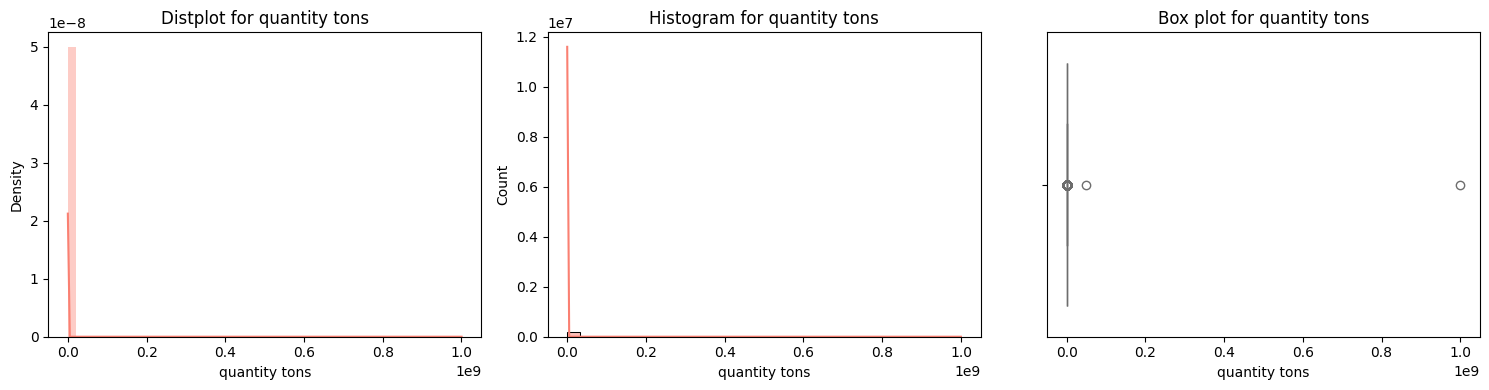

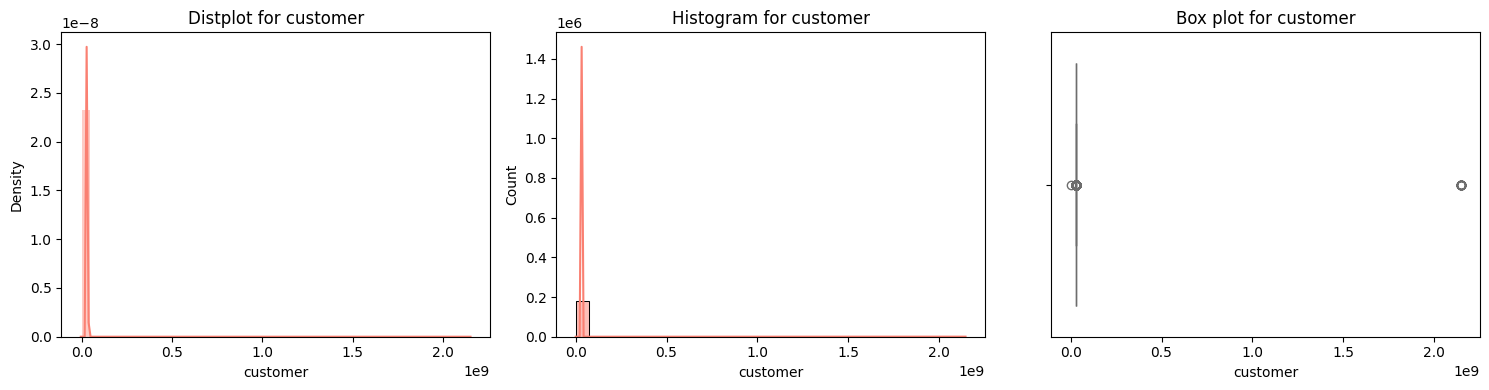

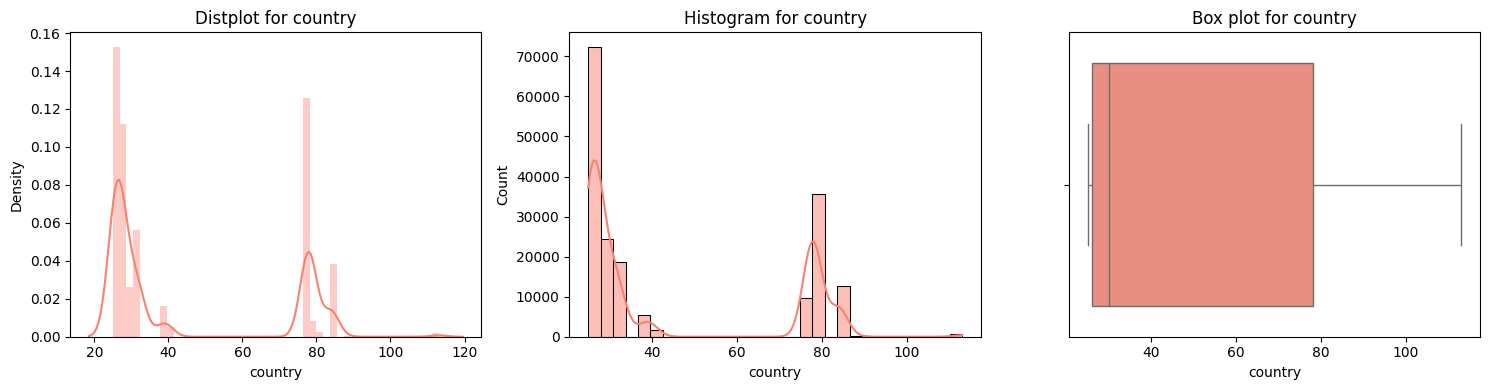

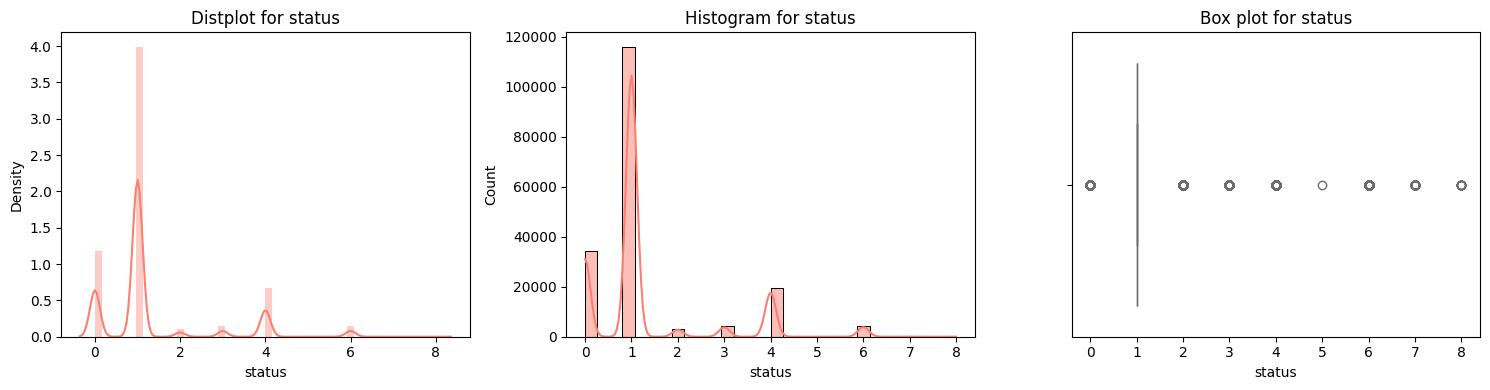

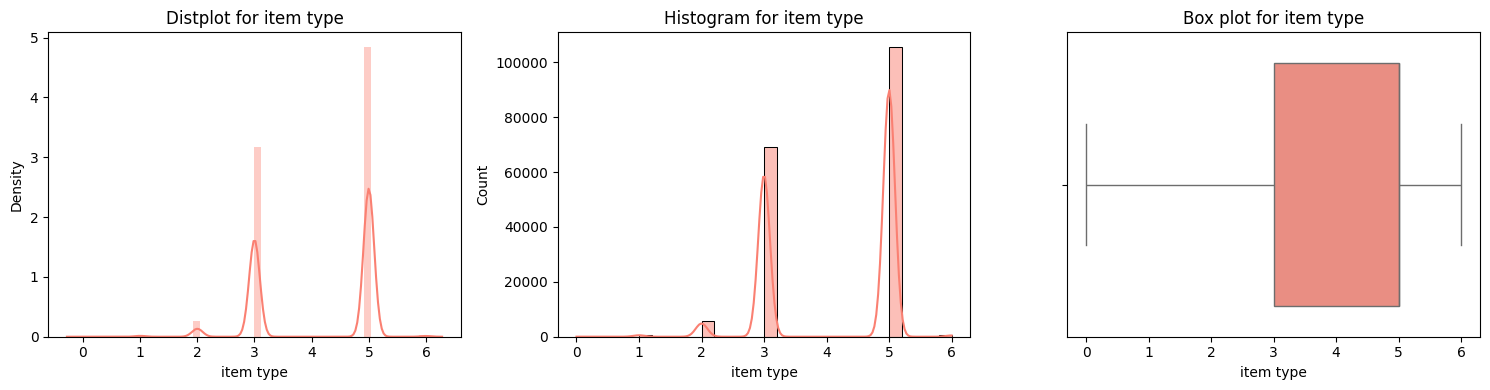

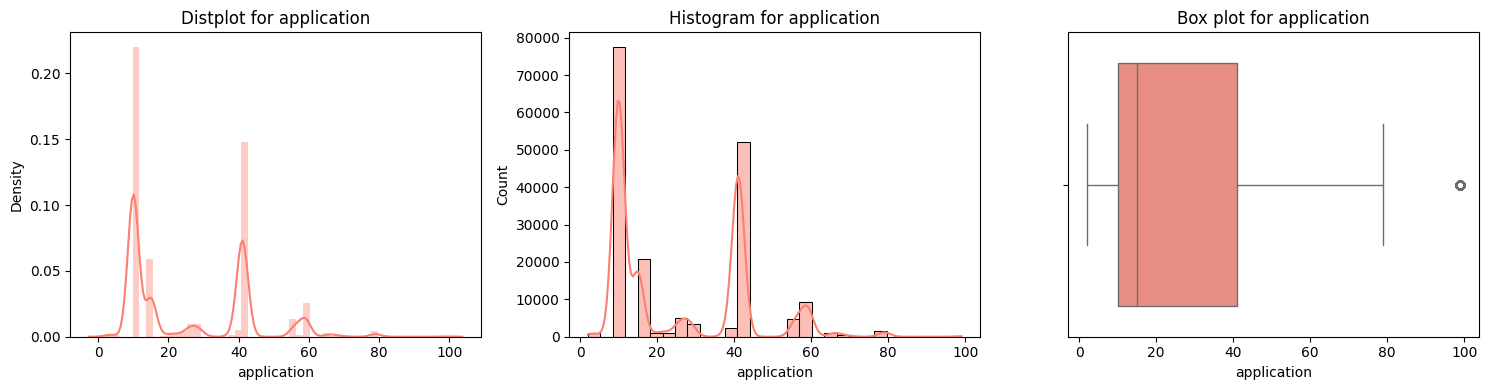

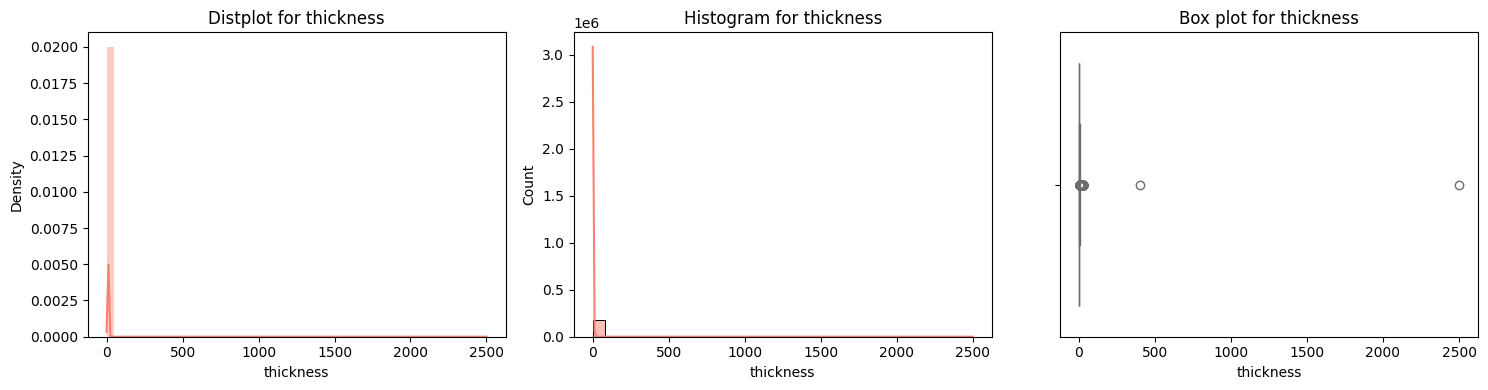

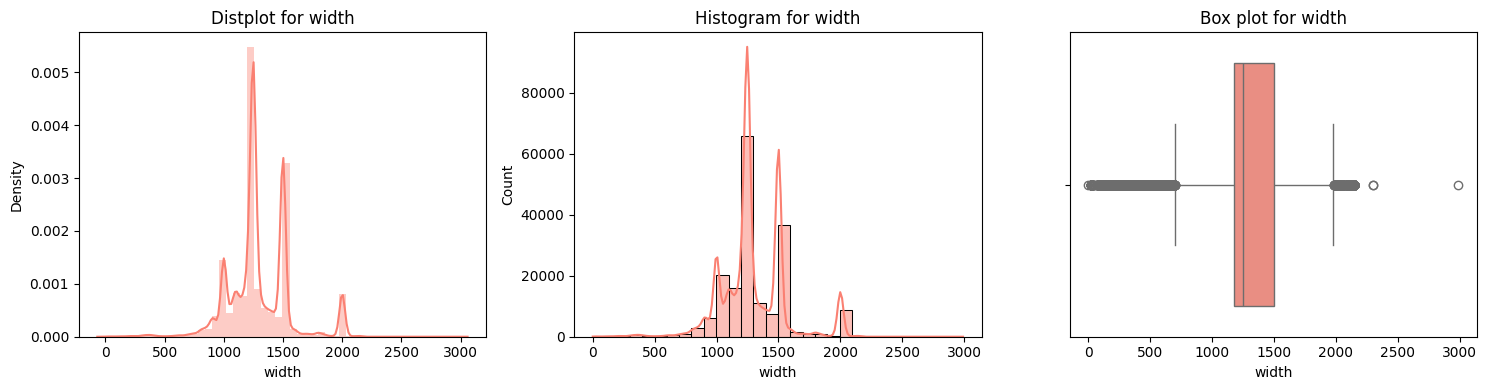

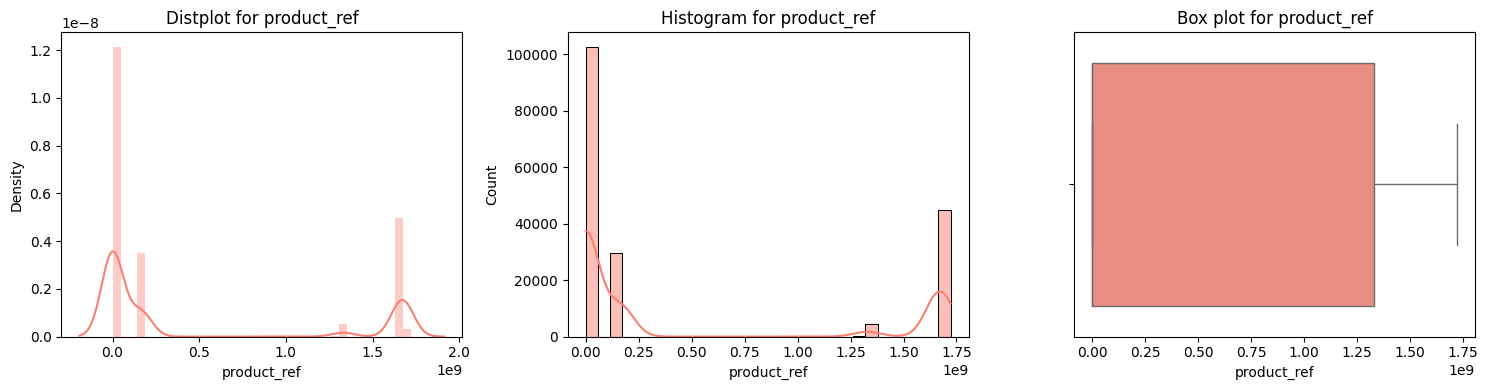

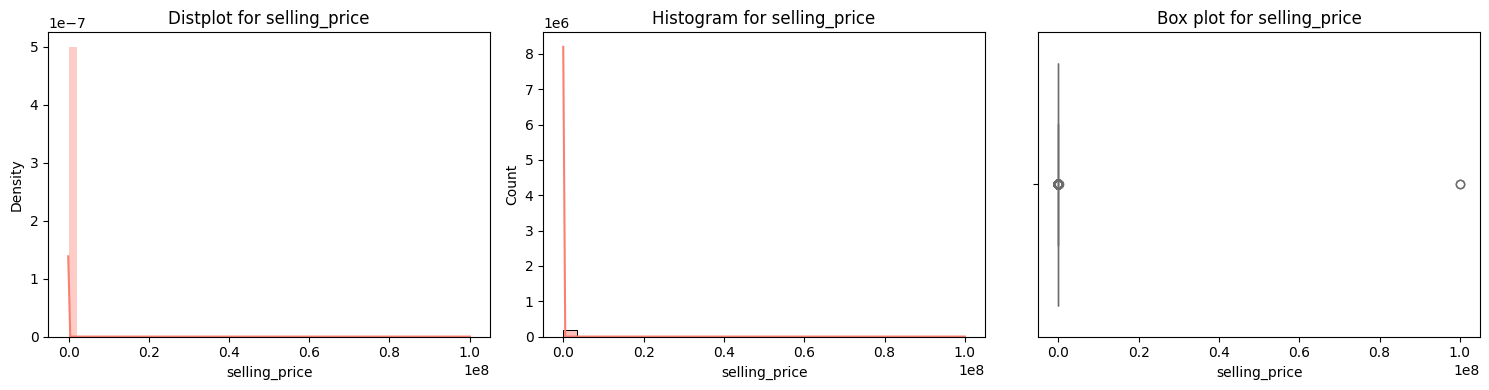

In [31]:
def plot_skewness(df, column):
    plt.figure(figsize=(15, 4))
    
    # Distribution plot
    plt.subplot(1, 3, 1)
    sns.distplot(df[column], kde=True, color="salmon")
    plt.title(f"Distplot for {column}")
    
    # Histogram plot
    plt.subplot(1, 3, 2)
    sns.histplot(df[column], kde=True, bins=30, color="salmon")
    plt.title(f"Histogram for {column}")
    
    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[column], color="salmon")
    plt.title(f"Box plot for {column}")
    
    plt.tight_layout()
    plt.show()

skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']


for i in skewed_columns:
  plot_skewness(df,i)

In [32]:
df1=df.copy()

In [33]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [34]:

df1["quantity_tons_log"]= np.log(df1["quantity tons"])
df1["customer_log"]= np.log(df1["customer"])
df1["thickness_log"]= np.log(df1["thickness"])
df1["selling_price_log"]= np.log(df1["selling_price"])

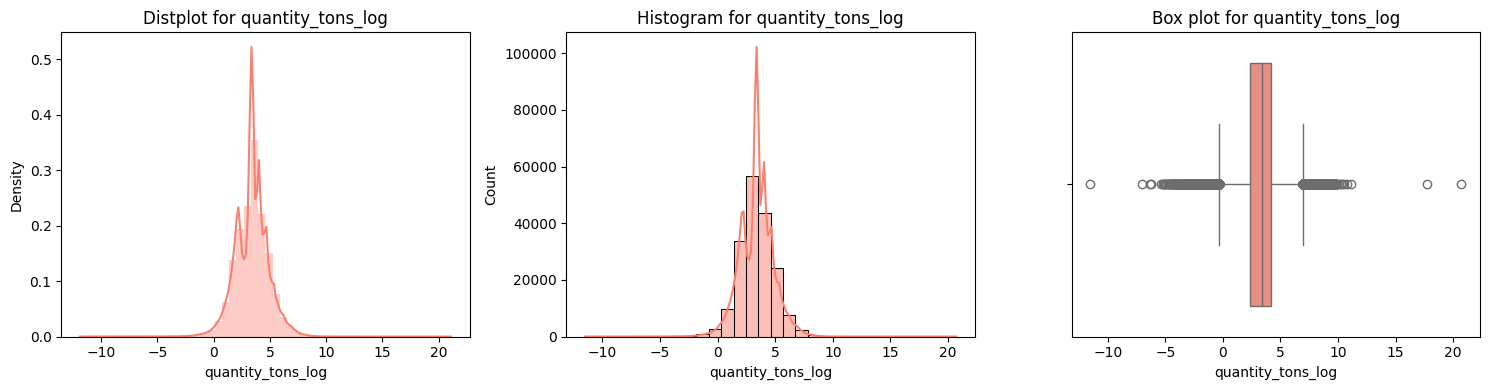

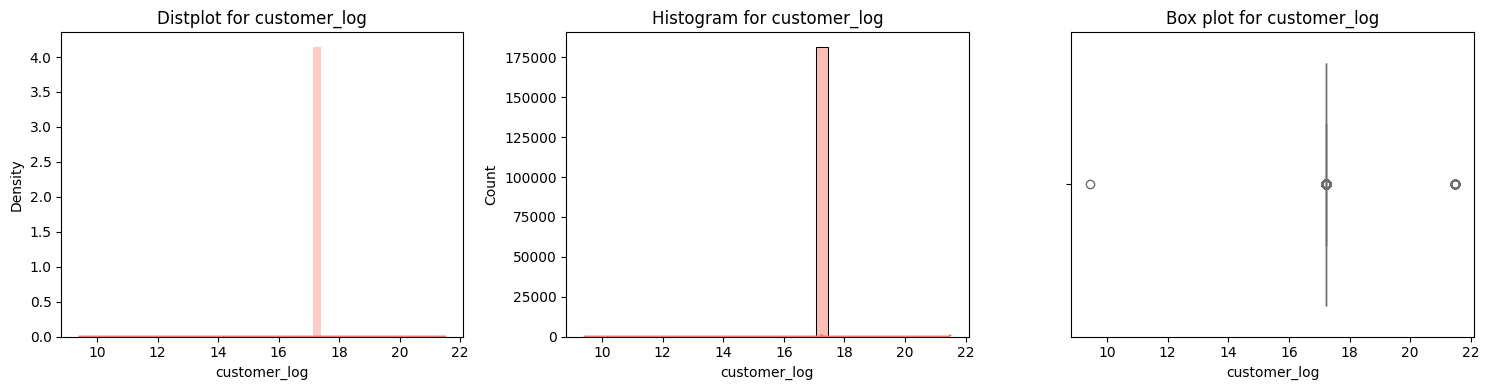

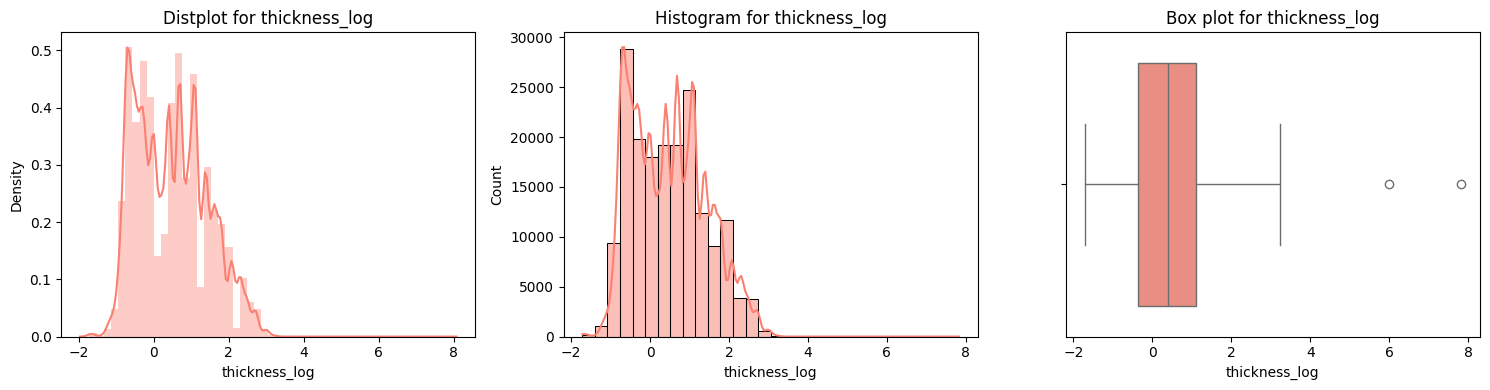

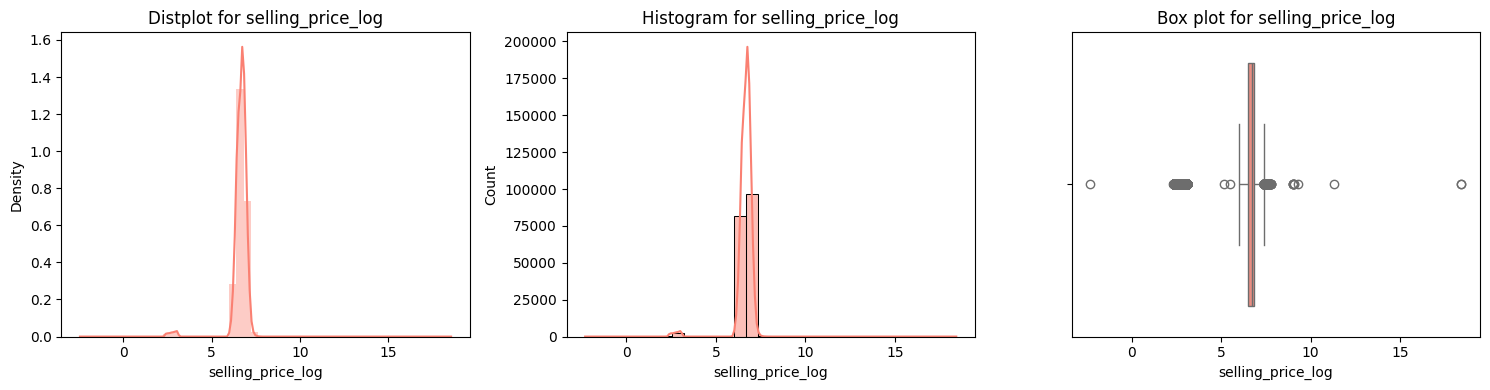

In [35]:
skwed_columns_2=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]
for i in skwed_columns_2:
  plot_skewness(df1,i)

In [36]:
df1.head()

id   item_date  quantity tons  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0      54.151139   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0     768.024839   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0     386.127949   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0     202.411065   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0     785.526262   

     customer  country  status  item type  application  thickness   width  \
0  30156308.0     28.0       1        5.0         10.0       2.00  1500.0   
1  30202938.0     25.0       1        5.0         41.0       0.80  1210.0   
2  30153963.0     30.0       1        6.0         28.0       0.38   952.0   
3  30349574.0     32.0       1        3.0         59.0       2.30  1317.0   
4  30211560.0     28.0       1        5.0         10.0       4.00  2000.0   

              material_ref  product_ref  delivery date  selling_price  \
0              DEQ1 S460MC   1670798778     20210701.0         854.00   
1                  DX51D+Z   1668701718     20210401.0        1047.00   
2                 S0380700       628377     20210101.0         644.33   
3  DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0         768.00   
4          2_S275JR+AR-CL1       640665     20210301.0         577.00   

   quantity_tons_log  customer_log  thickness_log  selling_price_log  
0           3.991779     17.221905       0.693147           6.749931  
1           6.643822     17.223450      -0.223144           6.953684  
2           5.956169     17.221827      -0.967584           6.468211  
3           5.310301     17.228293       0.832909           6.643790  
4           6.666354     17.223735       1.386294           6.357842

In [37]:
def outlier(df,column):
  o1= df[column].quantile(0.25)
  o3= df[column].quantile(0.75)

  iqr= o3-o1

  upper_threshold= o3 + (1.5*iqr)
  lower_threshold= o1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [38]:
df1.describe().T

count          mean           std           min  \
item_date          181673.0  2.020459e+07  4.551107e+03  1.995000e+07   
quantity tons      181673.0  5.875066e+03  2.349075e+06  1.000000e-05   
customer           181673.0  3.051221e+07  2.433375e+07  1.245800e+04   
country            181673.0  4.489812e+01  2.440579e+01  2.500000e+01   
status             181673.0  1.316684e+00  1.330310e+00  0.000000e+00   
item type          181673.0  4.133036e+00  1.055230e+00  0.000000e+00   
application        181673.0  2.561375e+01  1.775391e+01  2.000000e+00   
thickness          181673.0  2.564827e+00  6.572303e+00  1.800000e-01   
width              181673.0  1.295287e+03  2.616318e+02  1.000000e+00   
product_ref        181673.0  4.739679e+08  7.175101e+08  6.117280e+05   
delivery date      181673.0  2.020738e+07  2.411052e+04  2.019040e+07   
selling_price      181673.0  1.918124e+03  3.317947e+05  1.000000e-01   
quantity_tons_log  181673.0  3.392256e+00  1.445115e+00 -1.151293e+01   
customer_log       181673.0  1.722495e+01  5.235091e-02  9.430118e+00   
thickness_log      181673.0  4.803750e-01  9.337708e-01 -1.714798e+00   
selling_price_log  181673.0  6.625928e+00  5.654246e-01 -2.302585e+00   

                            25%           50%           75%           max  
item_date          2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons      1.097167e+01  3.036556e+01  6.716871e+01  1.000000e+09  
customer           3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country            2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
status             1.000000e+00  1.000000e+00  1.000000e+00  8.000000e+00  
item type          3.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00  
application        1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness          7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width              1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref        6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date      2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price      6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08  
quantity_tons_log  2.395316e+00  3.413309e+00  4.207208e+00  2.072327e+01  
customer_log       1.722325e+01  1.722353e+01  1.722601e+01  2.148756e+01  
thickness_log     -3.566749e-01  4.054651e-01  1.098612e+00  7.824046e+00  
selling_price_log  6.505784e+00  6.699500e+00  6.859615e+00  1.842069e+01

In [39]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity_tons_log',
       'customer_log', 'thickness_log', 'selling_price_log'],
      dtype='object')

In [40]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df1,i)

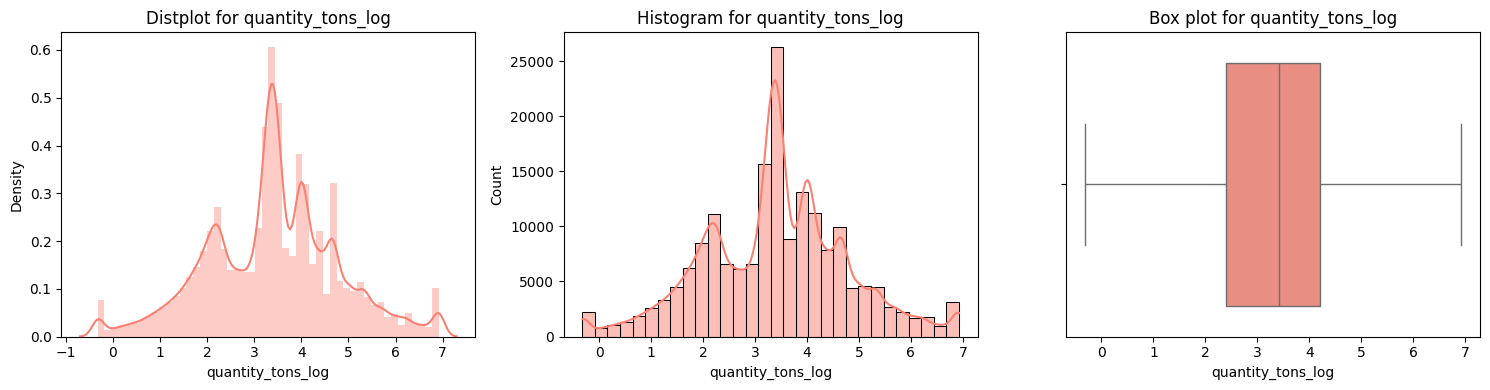

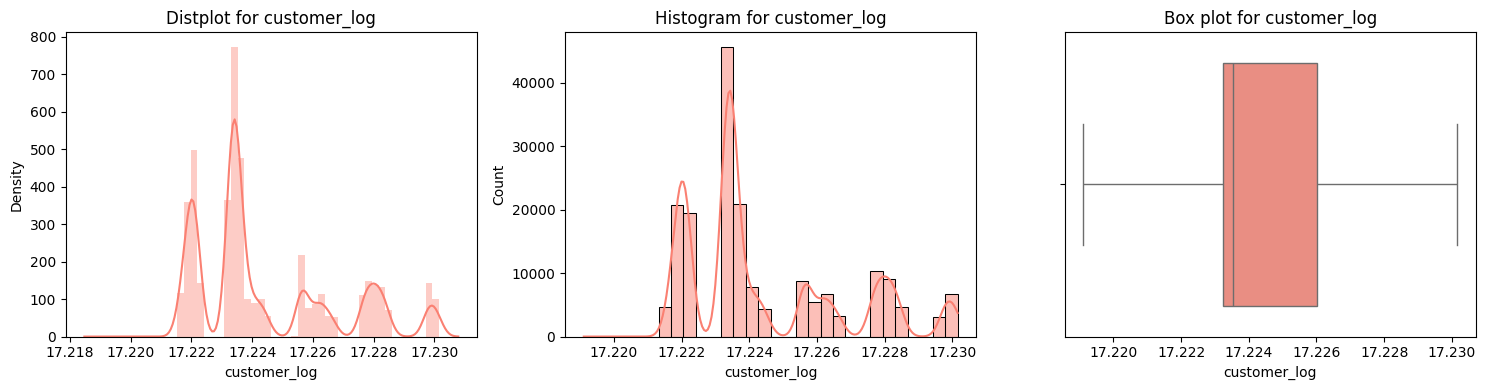

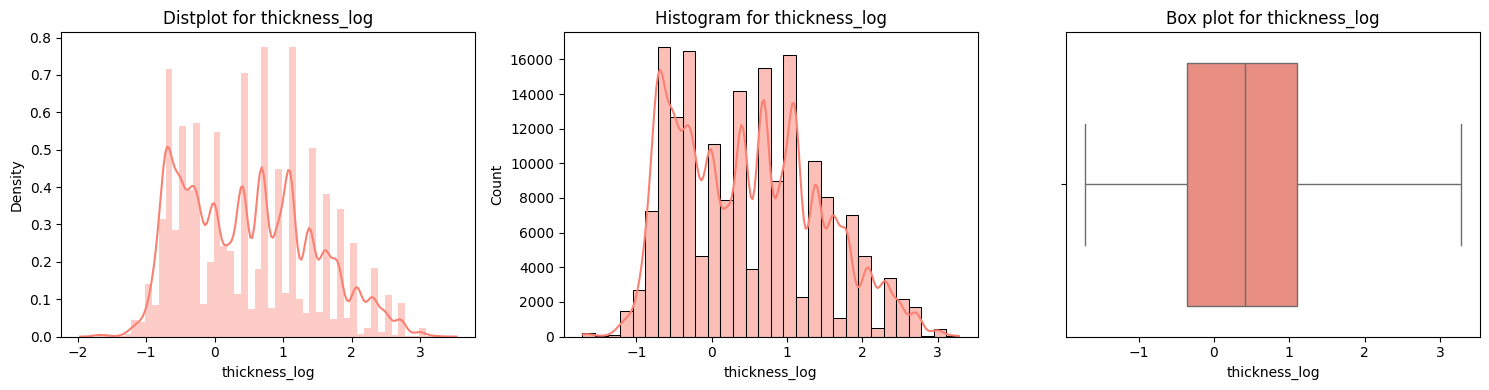

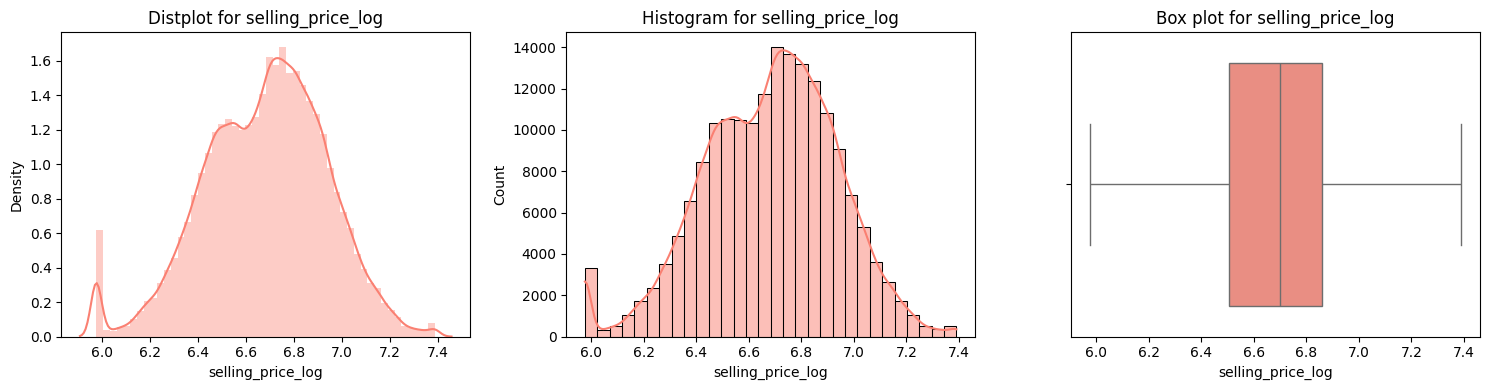

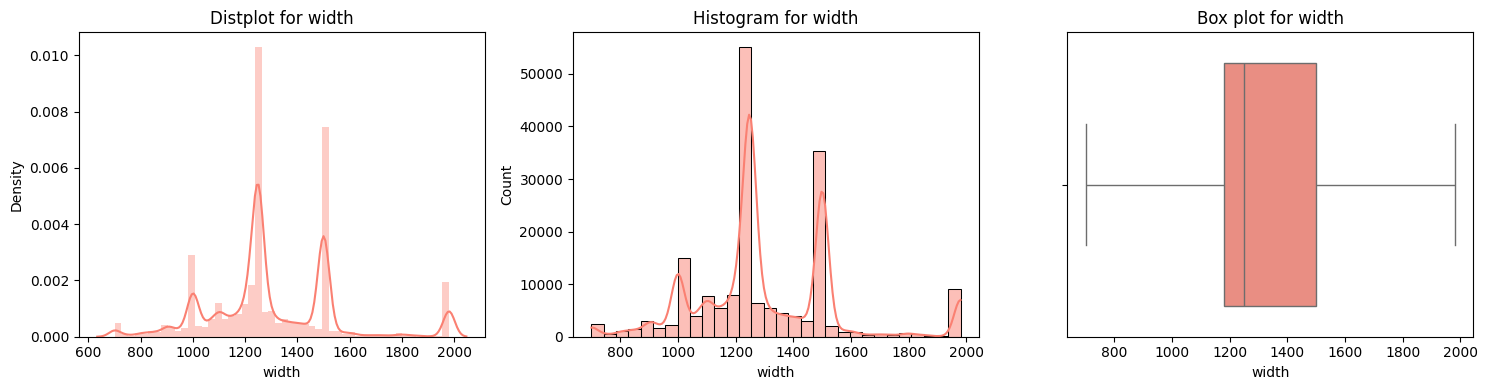

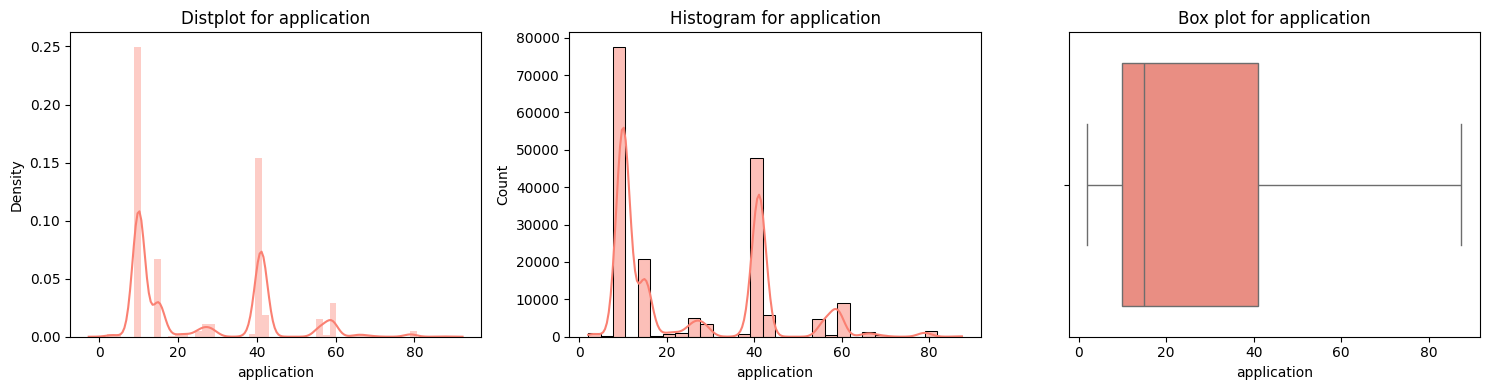

In [41]:
for i in outlier_columns:
  plot_skewness(df1,i)

In [42]:
from scipy.stats import skew

In [43]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
skewness = df[numeric_columns].apply(lambda x: skew(x.dropna()))

In [44]:
high_skew = skewness[skewness > 0.75].index
df[high_skew] = np.log1p(df[high_skew])

In [45]:
df[high_skew]

quantity tons   customer   country    status  thickness  product_ref  \
0            4.010077  17.221905  3.367296  0.693147   1.098612    21.236568   
1            6.645123  17.223450  3.258097  0.693147   0.587787    21.235312   
2            5.958755  17.221827  3.433987  0.693147   0.322083    13.350897   
3            5.315229  17.228293  3.496508  0.693147   1.193922    21.235312   
4            6.667626  17.223735  3.367296  0.693147   1.609438    13.370264   
...               ...        ...       ...       ...        ...          ...   
181668       4.639402  17.223381  3.258097  0.693147   0.672944    18.916240   
181669       5.342748  17.223381  3.258097  0.693147   0.667829    18.916240   
181670       1.655480  17.223381  3.258097  0.693147   0.536493    18.916240   
181671       8.678643  17.223381  3.258097  0.693147   0.615186    18.916240   
181672       6.010499  17.223381  3.258097  0.693147   0.536493    18.916240   

        delivery date  selling_price  
0           16.821723       6.751101  
1           16.821708       6.954639  
2           16.821693       6.469762  
3           16.821693       6.645091  
4           16.821703       6.359574  
...               ...            ...  
181668      16.821228       6.383507  
181669      16.821228       6.380123  
181670      16.821228       6.429719  
181671      16.821228       6.400257  
181672      16.821228       6.410175  

[181673 rows x 8 columns]

In [46]:
df.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status           float64
item type        float64
application      float64
thickness        float64
width            float64
material_ref      object
product_ref      float64
delivery date    float64
selling_price    float64
dtype: object

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [48]:
df1.head()

id   item_date  quantity tons  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0      54.151139   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0     768.024839   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0     386.127949   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0     202.411065   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0     785.526262   

     customer  country  status  item type  application  thickness   width  \
0  30156308.0     28.0       1        5.0         10.0       2.00  1500.0   
1  30202938.0     25.0       1        5.0         41.0       0.80  1210.0   
2  30153963.0     30.0       1        6.0         28.0       0.38   952.0   
3  30349574.0     32.0       1        3.0         59.0       2.30  1317.0   
4  30211560.0     28.0       1        5.0         10.0       4.00  1980.0   

              material_ref  product_ref  delivery date  selling_price  \
0              DEQ1 S460MC   1670798778     20210701.0         854.00   
1                  DX51D+Z   1668701718     20210401.0        1047.00   
2                 S0380700       628377     20210101.0         644.33   
3  DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0         768.00   
4          2_S275JR+AR-CL1       640665     20210301.0         577.00   

   quantity_tons_log  customer_log  thickness_log  selling_price_log  
0           3.991779     17.221905       0.693147           6.749931  
1           6.643822     17.223450      -0.223144           6.953684  
2           5.956169     17.221827      -0.967584           6.468211  
3           5.310301     17.228293       0.832909           6.643790  
4           6.666354     17.223735       1.386294           6.357842

In [49]:
df1.drop(columns=["id","material_ref"],inplace=True)

In [50]:
df1.head()

item_date  quantity tons    customer  country  status  item type  \
0  20210401.0      54.151139  30156308.0     28.0       1        5.0   
1  20210401.0     768.024839  30202938.0     25.0       1        5.0   
2  20210401.0     386.127949  30153963.0     30.0       1        6.0   
3  20210401.0     202.411065  30349574.0     32.0       1        3.0   
4  20210401.0     785.526262  30211560.0     28.0       1        5.0   

   application  thickness   width  product_ref  delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00   
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00   
2         28.0       0.38   952.0       628377     20210101.0         644.33   
3         59.0       2.30  1317.0   1668701718     20210101.0         768.00   
4         10.0       4.00  1980.0       640665     20210301.0         577.00   

   quantity_tons_log  customer_log  thickness_log  selling_price_log  
0           3.991779     17.221905       0.693147           6.749931  
1           6.643822     17.223450      -0.223144           6.953684  
2           5.956169     17.221827      -0.967584           6.468211  
3           5.310301     17.228293       0.832909           6.643790  
4           6.666354     17.223735       1.386294           6.357842

In [51]:
correlation_matrix = df1.corr()

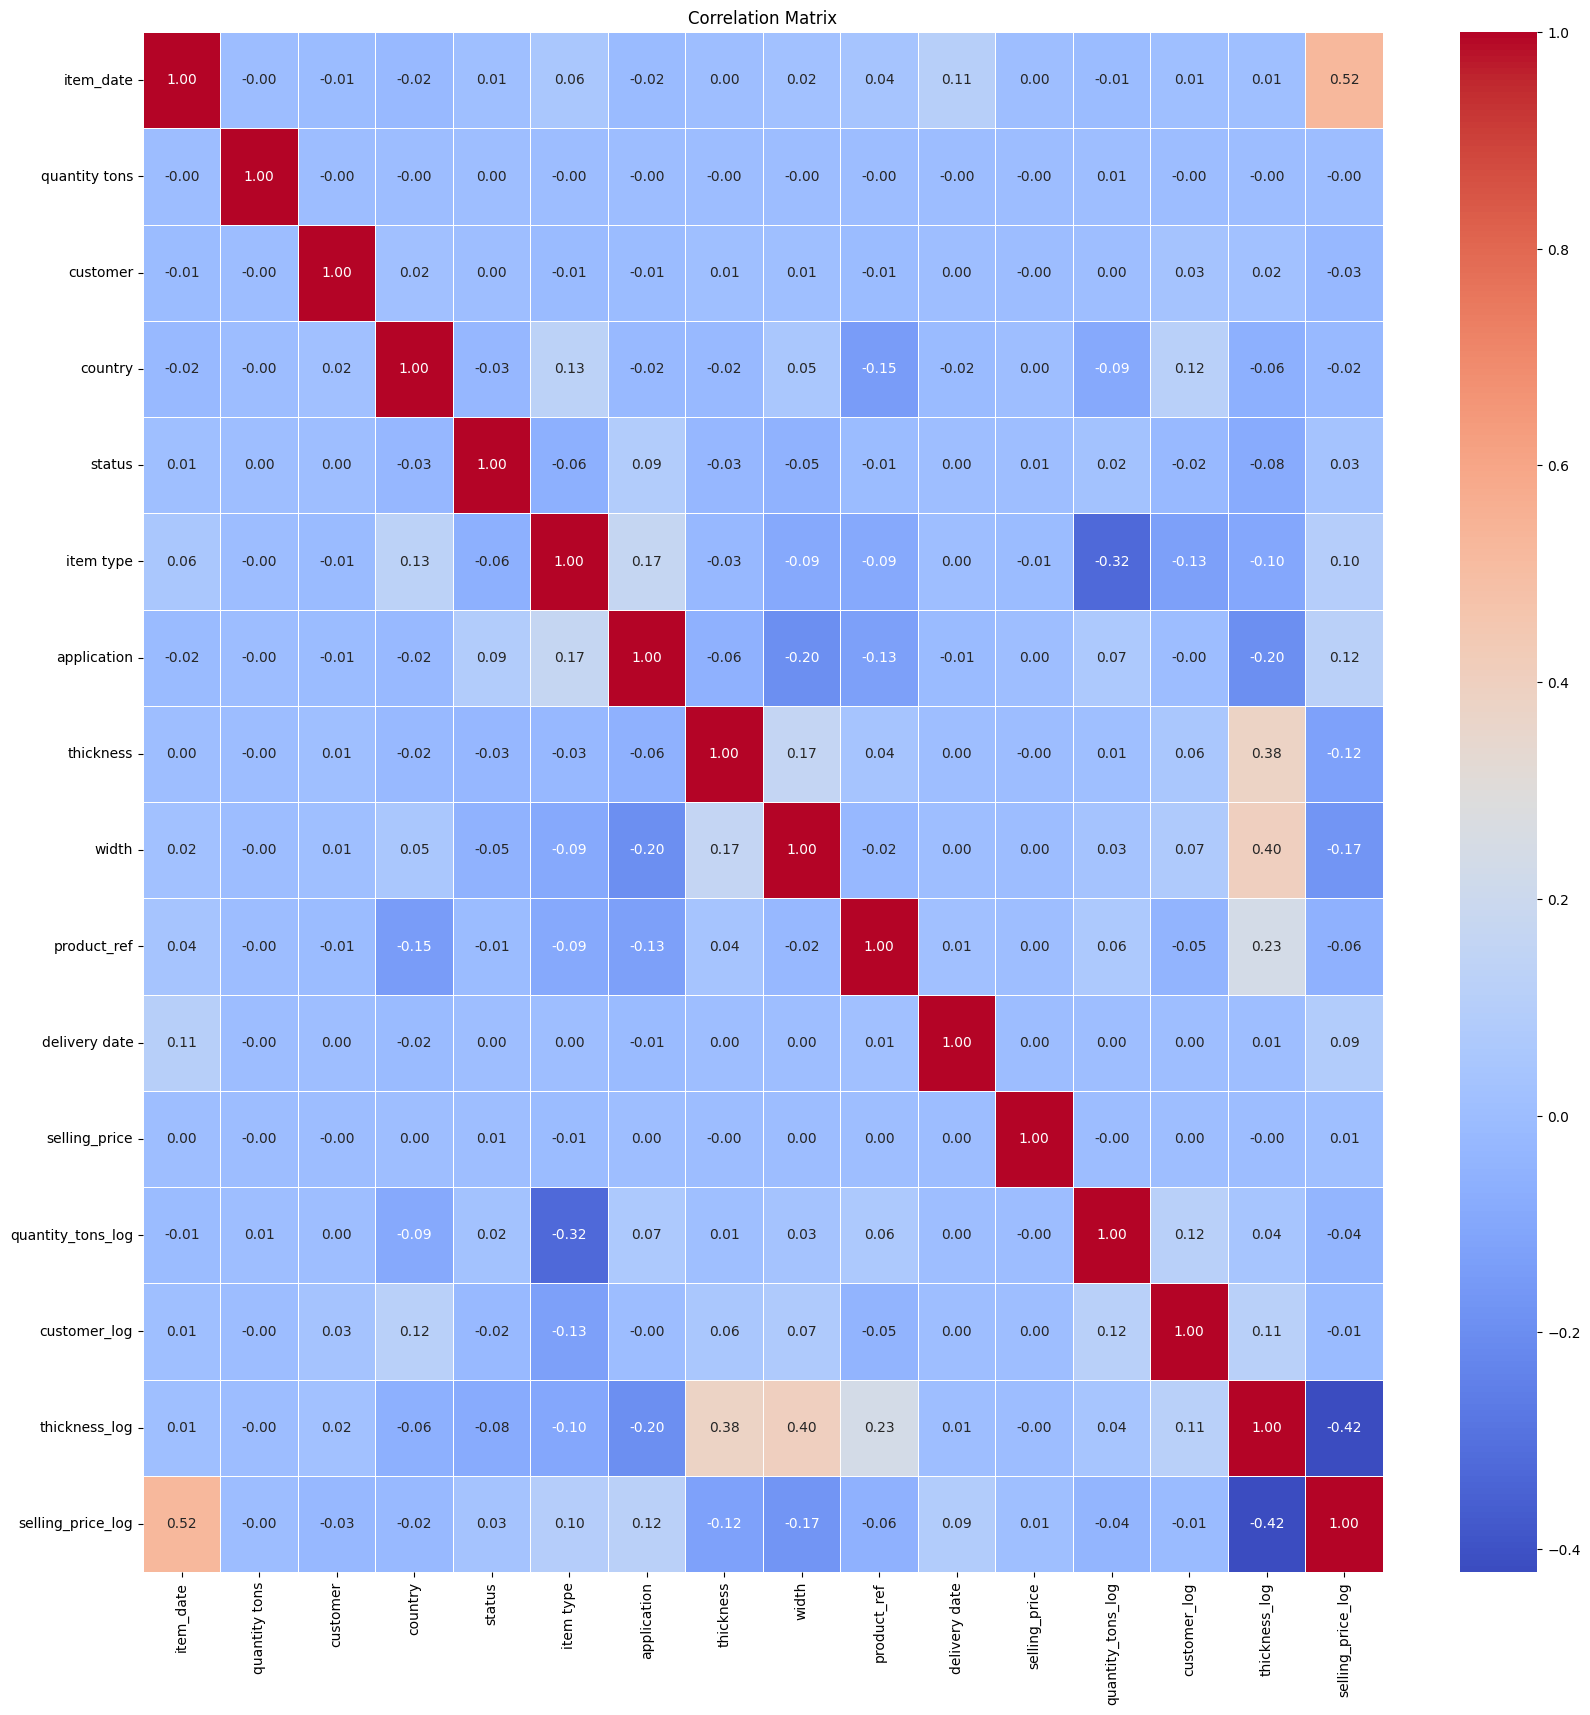

In [52]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [53]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity_tons_log', 'customer_log',
       'thickness_log', 'selling_price_log'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [55]:
x=df1[['quantity tons','item type','country','application','thickness','width', 'product_ref','delivery date']].values
y=df1[['selling_price']].values
     

In [56]:

from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)

models = {
    'ExtraTrees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LinearRegression': LinearRegression()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    results[model_name] = {
        'mean_squared_error': mean_squared_error(Y_test, Y_pred),
        'mean_absolute_error': mean_absolute_error(Y_test, Y_pred),
        'r2_score': r2_score(Y_test, Y_pred),
        'mean_absolute_percentage_error': mean_absolute_percentage_error(Y_test, Y_pred),
        
    }


for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()



Results for ExtraTrees:
mean_squared_error: 366980396764.5446
mean_absolute_error: 3731.9127
r2_score: -1.0001
mean_absolute_percentage_error: 141.5931

Results for XGBoost:
mean_squared_error: 366961395625.3956
mean_absolute_error: 3732.9761
r2_score: -1.0000
mean_absolute_percentage_error: 141.8913

Results for LinearRegression:
mean_squared_error: 183494939322.6132
mean_absolute_error: 4543.3194
r2_score: -0.0001
mean_absolute_percentage_error: 6.9819



In [57]:
df_status= df1[(df1["status"] == 1) | (df1["status"] == 0)]

In [58]:

df_status["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [59]:
x=df_status.drop(columns=['status'], axis=1)
y=df_status['status']

In [60]:
x.shape,y.shape

((150450, 15), (150450,))

In [61]:
def accuracy_checking(x, y, algorithm):

  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)



  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test,
           
           }
  return metrics

In [62]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9545696244599535}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9662013958125623}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9673645729478232}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8263459621136591, 'Accuracy_Test': 0.8243602525756065}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8448737121967431, 'Accuracy_Test': 0.8412761714855433}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9466101694915254, 'Accuracy_Test': 0.9356596876038551}


In [63]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters for ExtraTreesClassifier: {best_params}")
print(f"Best cross-validation accuracy score: {best_score:.4f}")

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([13.25582829, 26.25945482, 53.15561681, 12.16527638, 25.0905108 ,
        50.98124866, 11.99086413, 24.76775398, 49.31775918,  6.16215086,
        12.02581105, 26.08243837,  7.02770686, 12.10731368, 24.18810887,
         6.23100076, 12.41210508, 23.69598198, 11.45432973, 23.73553276,
        51.85323629, 11.79589376, 26.54335289, 56.72393179, 16.1626369 ,
        26.5680747 , 52.75993862, 17.81143723, 29.16026387, 67.9619761 ,
        15.84751554, 33.55663419, 58.82653027, 13.76602077, 26.8864502 ,
        48.59416027]),
 'std_fit_time': array([0.36459475, 0.55265875, 0.57755921, 0.33243131, 0.40622894,
        0.20940025, 0.19973211, 0.20289089, 0.7851831 , 0.13249029,
        0.14406616, 0.51976259, 0.60276812, 0.13942591, 0.47058982,
        0.08628434, 0.35447615, 0.54373012, 0.30533857, 0.50864109,
        0.47670156, 0.2384434 , 0.39354397, 1.85260867, 2.02747931,
        0.97515368, 1.74377456, 1.59684748, 0.52072407, 0.86608643,
        1.28939596, 1.193

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

In [ ]:
gridsearch.cv_results_

{'mean_fit_time': array([  5.80974841,   6.03135848,   6.30222588,   6.42825098,
          6.44693327,   7.08237906,   7.03500624,   7.58379984,
          7.80149884,   8.49056954,   9.02787838,   8.89280639,
          8.87913685,   9.14138594,   9.0431623 ,   9.10945072,
          9.11876864,   8.73313756,  33.44573712,  33.13277178,
         33.42597485,  33.49114332,  33.35001354,  34.23644209,
         34.05886235,  34.54004278,  34.36993623,  19.52993493,
         20.11917429,  20.40643139,  20.22628765,  20.43708711,
         20.54942212,  20.56229806,  20.52064481,  20.26907821,
         20.38410463,  20.55696664,  20.85995426,  20.7759223 ,
         20.54860401,  21.59751058,  21.06615124,  20.258741  ,
         19.43233747,  76.97063007,  77.2644711 ,  83.72802453,
         87.6926652 ,  99.51472793, 149.01365857, 148.24069109,
         93.54329071,  80.65012059,  33.74486675,  35.53620858,
         35.65355272,  36.13720832,  35.90710173,  35.99112062,
         36.22753944,  

In [ ]:
gridsearch.best_score_

0.9620721169823861

In [ ]:
df1.head(3)

item_date  quantity tons    customer  country  status  item type  \
0  20210401.0      54.151139  30156308.0     28.0       1        5.0   
1  20210401.0     768.024839  30202938.0     25.0       1        5.0   
2  20210401.0     386.127949  30153963.0     30.0       1        6.0   

   application  thickness   width  product_ref  delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00   
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00   
2         28.0       0.38   952.0       628377     20210101.0         644.33   

   quantity_tons_log  customer_log  thickness_log  selling_price_log  
0           3.991779     17.221905       0.693147           6.749931  
1           6.643822     17.223450      -0.223144           6.953684  
2           5.956169     17.221827      -0.967584           6.468211

In [ ]:
gridsearch.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
X,Y= SMOTETomek().fit_resample(x,y) 

In [ ]:
x.shape,y.shape

((150450, 15), (150450,))

In [ ]:
X.shape,Y.shape

((230638, 15), (230638,))

In [ ]:
def accuracy_checking(X, Y, algorithm):

  x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)



  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test,
           
           }
  return metrics

In [ ]:
print(accuracy_checking(X,Y,DecisionTreeClassifier))
print(accuracy_checking(X,Y,RandomForestClassifier))
print(accuracy_checking(X,Y,ExtraTreesClassifier))
print(accuracy_checking(X,Y,AdaBoostClassifier))
print(accuracy_checking(X,Y,GradientBoostingClassifier))
print(accuracy_checking(X,Y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9674384321886923}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9811177592785293}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9836325008671523}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7865481545715679, 'Accuracy_Test': 0.7828000346860908}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8345184542843206, 'Accuracy_Test': 0.831902532084634}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9544902715299983, 'Accuracy_Test': 0.9485345126604232}


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

In [ ]:
categorical_columns = ['customer', 'country', 'item type', 'application']

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  
        ('ordinal', OrdinalEncoder(), ['status'])  
    ],
    remainder='passthrough'  
)

df_encoded = encoder.fit_transform(df)


encoded_columns = encoder.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist() + \
                  ['status'] + \
                  df.drop(categorical_columns + ['status'], axis=1).columns.tolist()

df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)



scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_encoded)
scaled_df = pd.DataFrame(scaled_df, columns=encoded_columns)



In [ ]:
scaled_df.head()

customer_9.430198532298864  customer_17.22161643987117  \
0                   -0.002346                   -0.002346   
1                   -0.002346                   -0.002346   
2                   -0.002346                   -0.002346   
3                   -0.002346                   -0.002346   
4                   -0.002346                   -0.002346   

   customer_17.221616572551632  customer_17.22161995589745  \
0                    -0.013682                   -0.074397   
1                    -0.013682                   -0.074397   
2                    -0.013682                   -0.074397   
3                    -0.013682                   -0.074397   
4                    -0.013682                   -0.074397   

   customer_17.221622543154176  customer_17.221622609494002  \
0                    -0.005246                    -0.007419   
1                    -0.005246                    -0.007419   
2                    -0.005246                    -0.007419   
3                    -0.005246                    -0.007419   
4                    -0.005246                    -0.007419   

   customer_17.221624135308833  customer_17.2216319633657  \
0                    -0.016086                  -0.006207   
1                    -0.016086                  -0.006207   
2                    -0.016086                  -0.006207   
3                    -0.016086                  -0.006207   
4                    -0.016086                  -0.006207   

   customer_17.221633655014003  customer_17.221640686933142  ...  \
0                    -0.018772                    -0.035214  ...   
1                    -0.018772                    -0.035214  ...   
2                    -0.018772                    -0.035214  ...   
3                    -0.018772                    -0.035214  ...   
4                    -0.018772                    -0.035214  ...   

   application_79.0  application_99.0    status  item_date  quantity tons  \
0          -0.08882          -0.02836 -0.238054   1.277225       0.402449   
1          -0.08882          -0.02836 -0.238054   1.277225       2.383767   
2          -0.08882          -0.02836 -0.238054   1.277225       1.867680   
3          -0.08882          -0.02836 -0.238054   1.277225       1.383806   
4          -0.08882          -0.02836 -0.238054   1.277225       2.400687   

   thickness     width  product_ref  delivery date  selling_price  
0   0.069321  0.782450     1.362203       0.168851       0.220167  
1  -0.780353 -0.325981     1.361850       0.153643       0.584947  
2  -1.222306 -1.312102    -0.857389       0.138434      -0.284051  
3   0.227853  0.082992     1.361850       0.138434       0.030175  
4   0.918994  2.693539    -0.851938       0.148573      -0.481530  

[5 rows x 1231 columns]

In [ ]:
df_encoded.dtypes

customer_9.430198532298864     float64
customer_17.22161643987117     float64
customer_17.221616572551632    float64
customer_17.22161995589745     float64
customer_17.221622543154176    float64
                                ...   
thickness                      float64
width                          float64
product_ref                    float64
delivery date                  float64
selling_price                  float64
Length: 1231, dtype: object

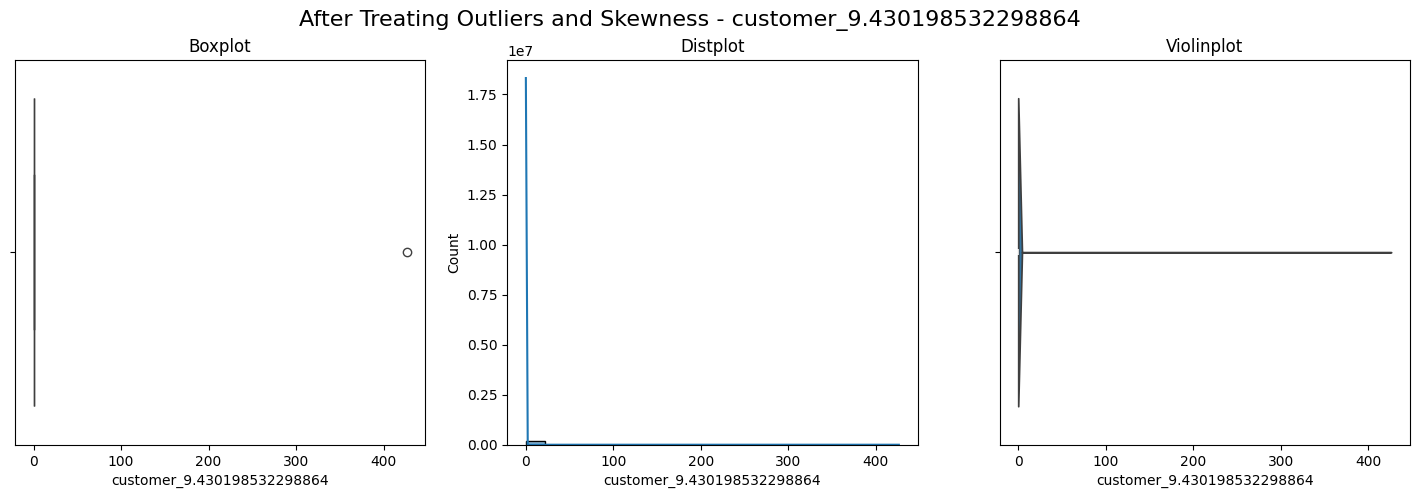

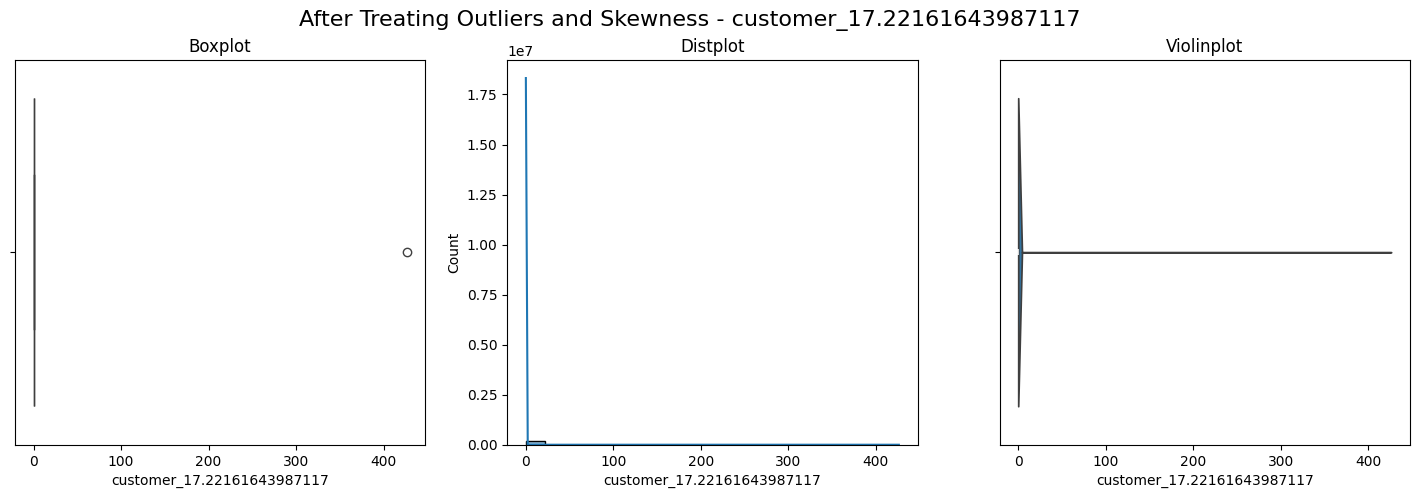

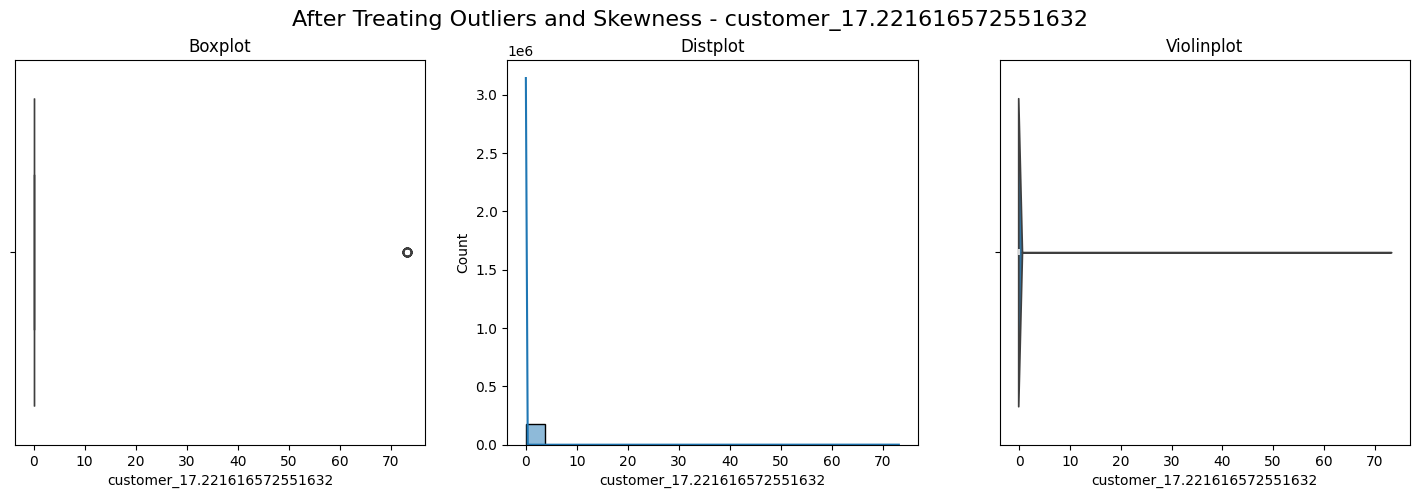

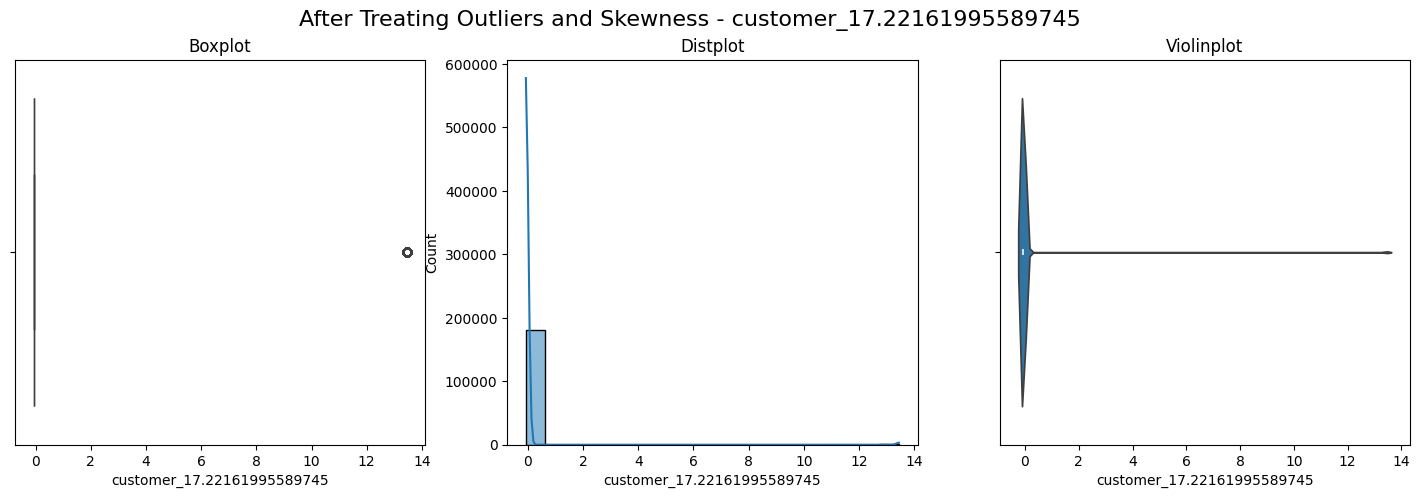

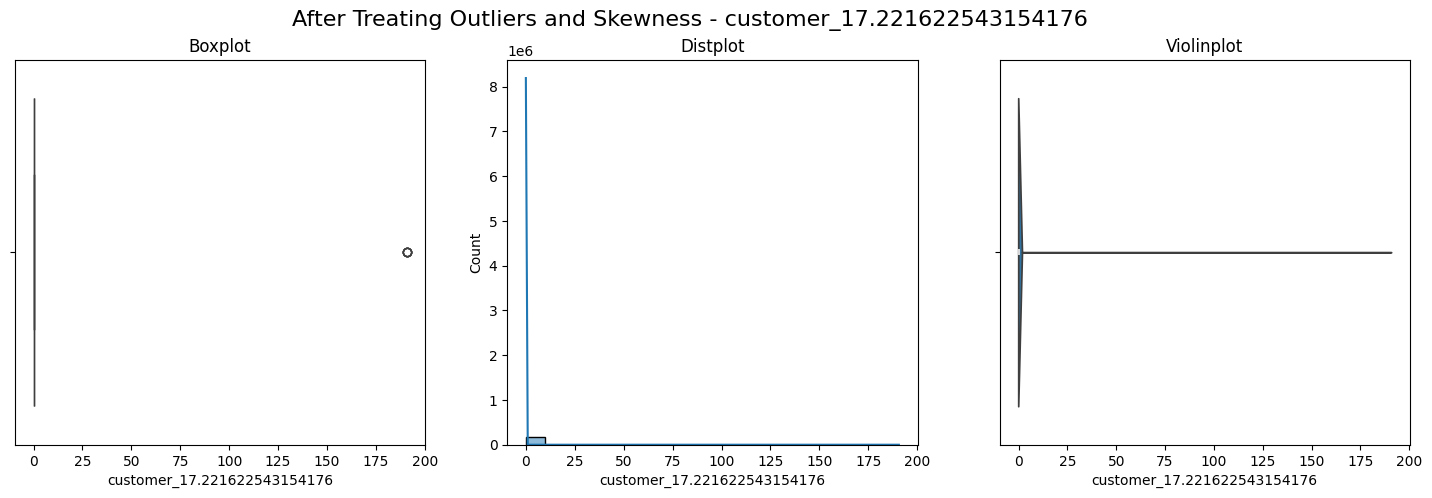

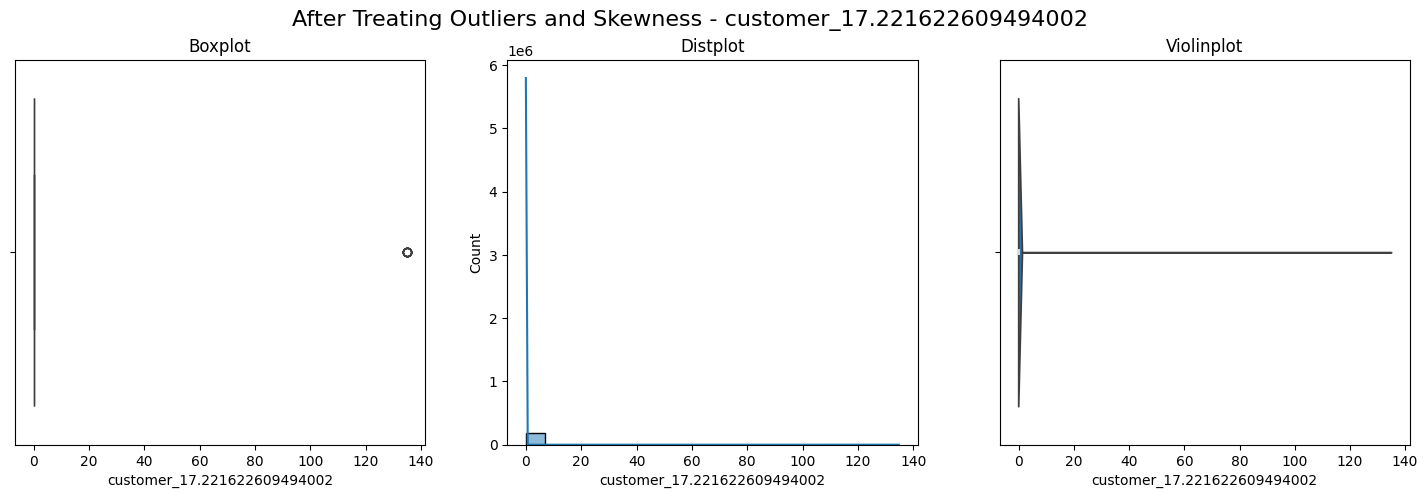

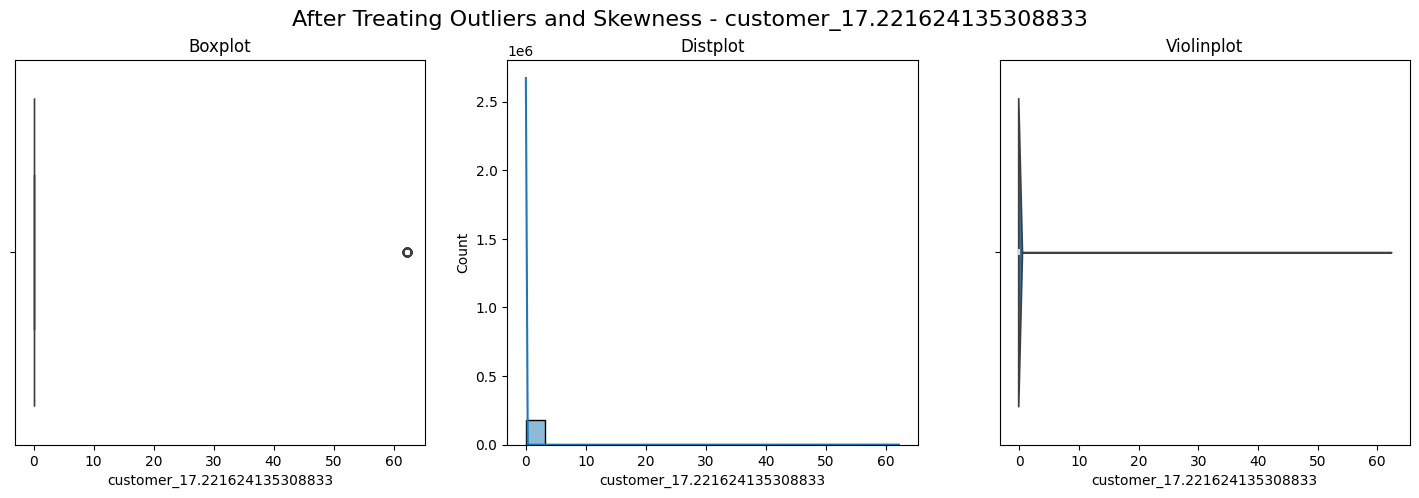

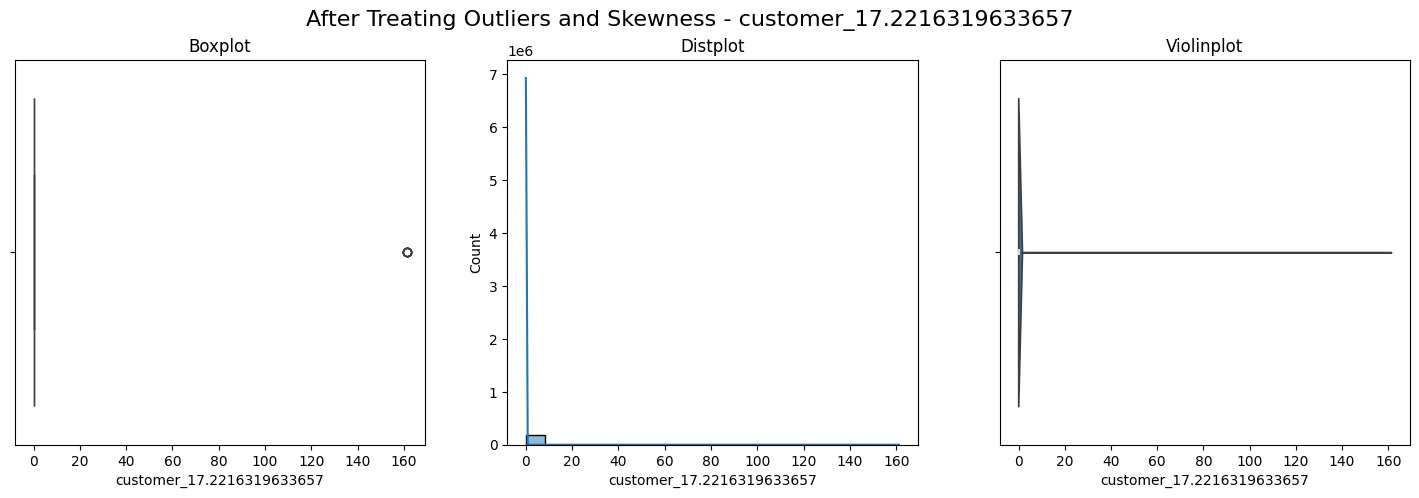

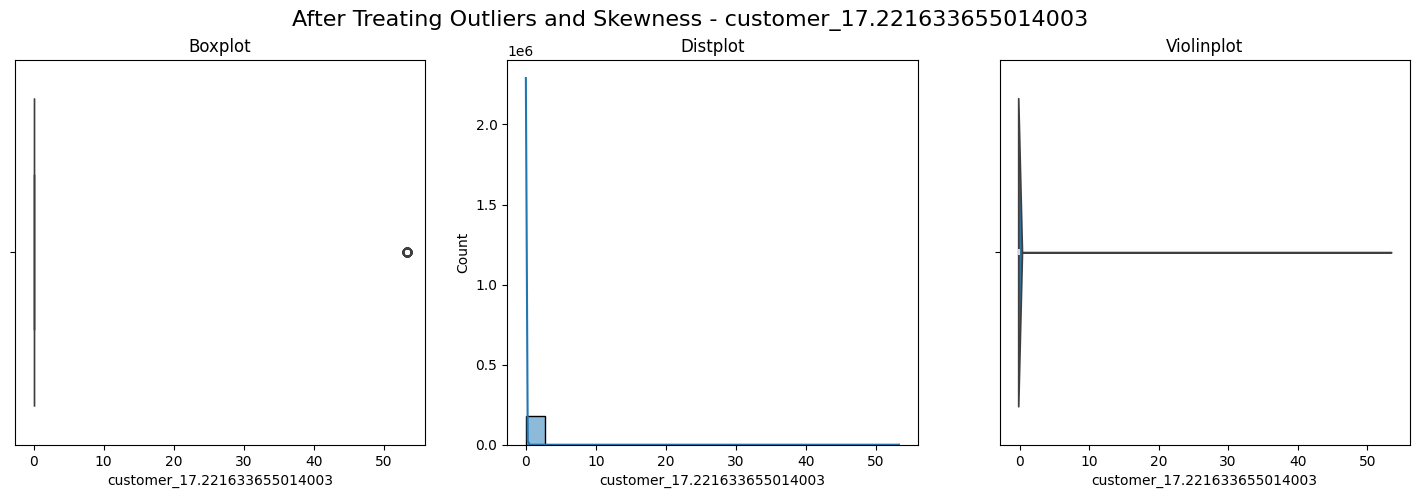

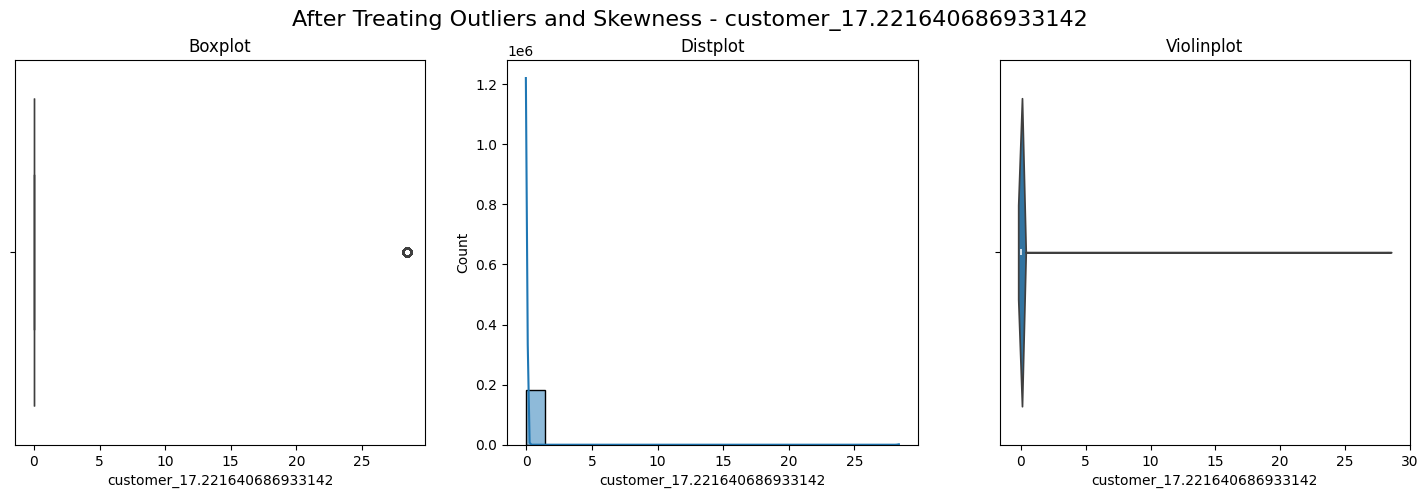

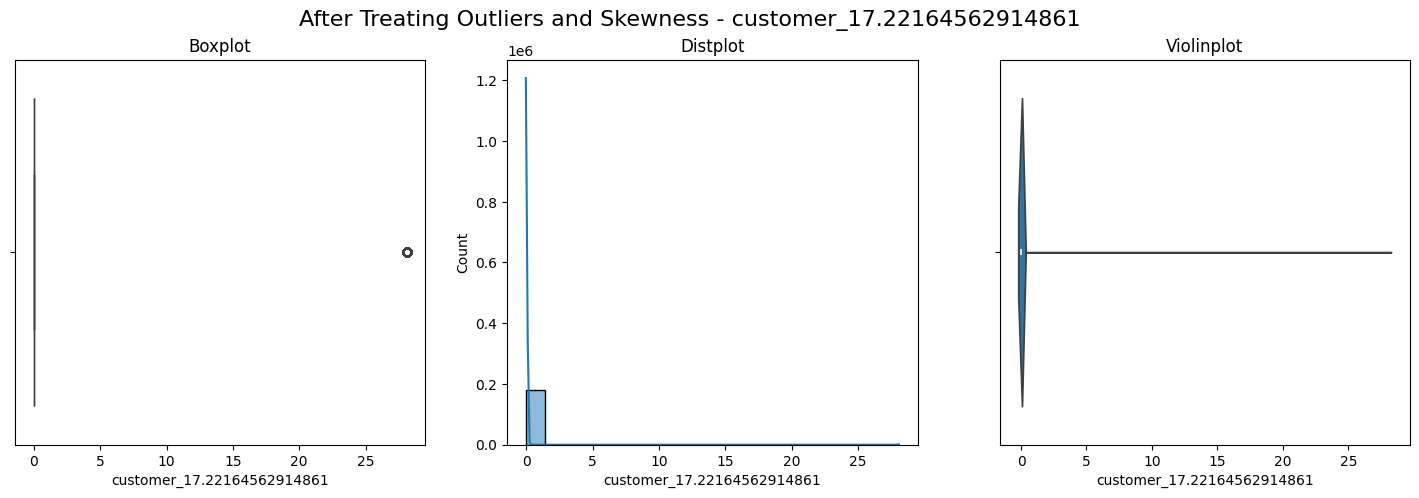

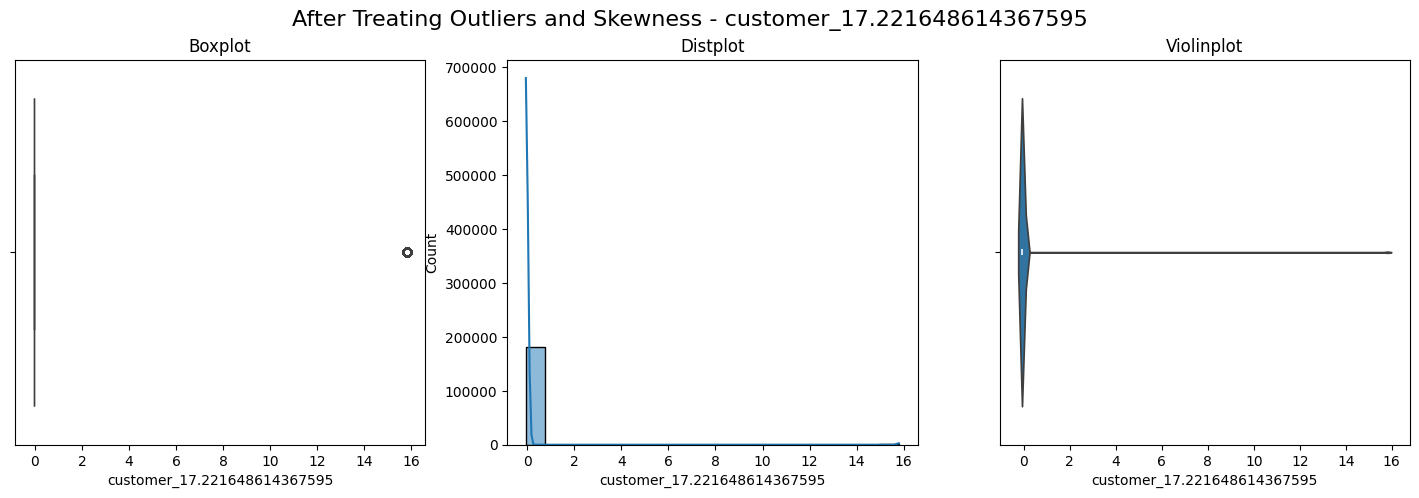

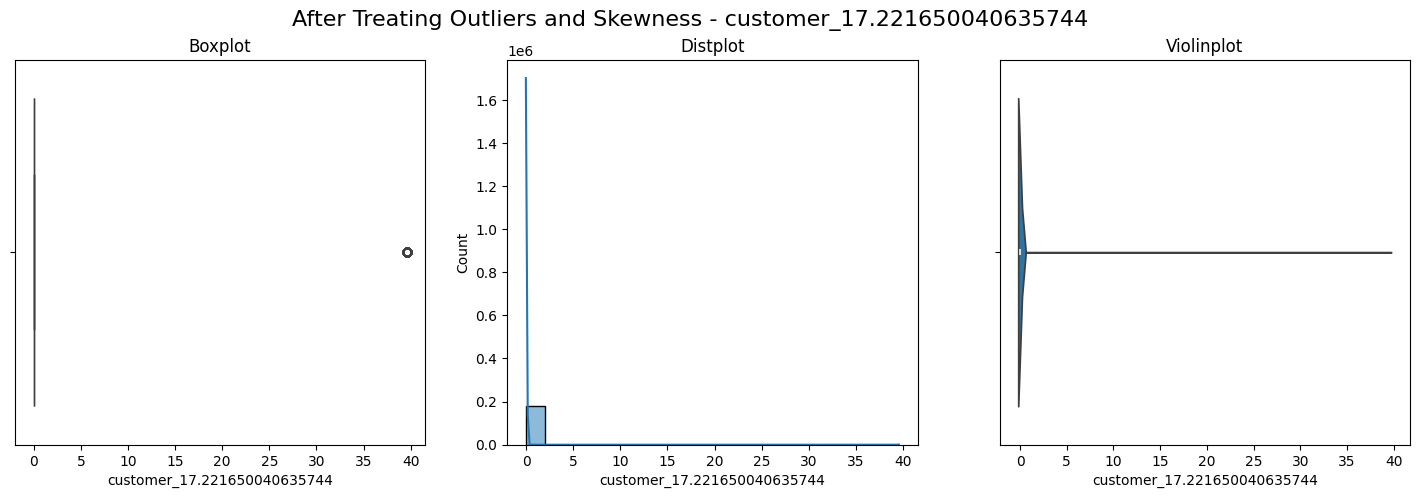

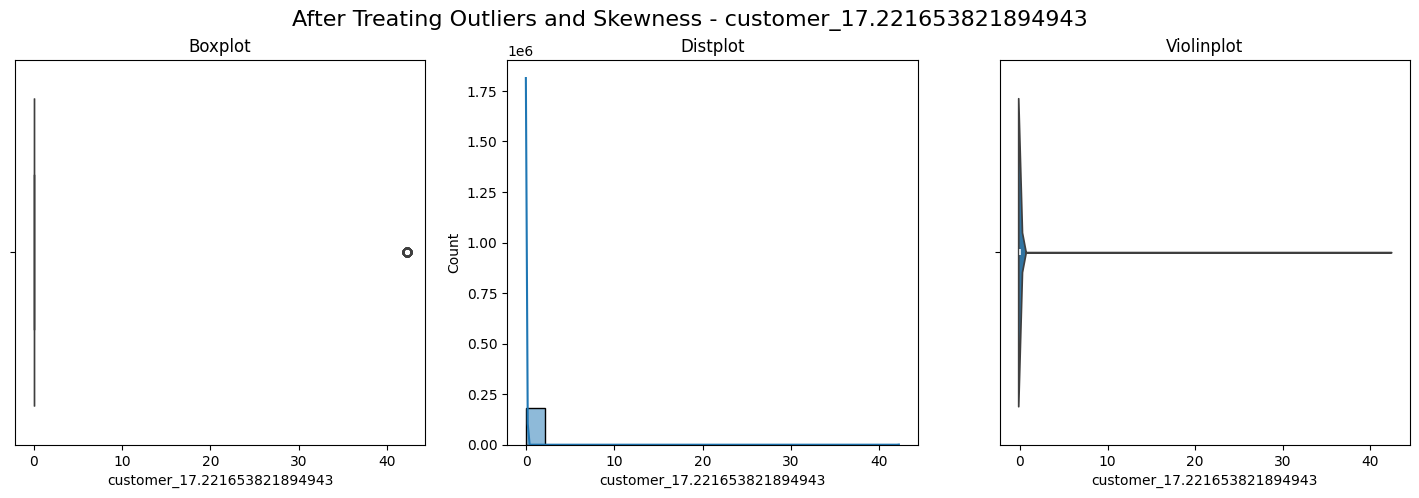

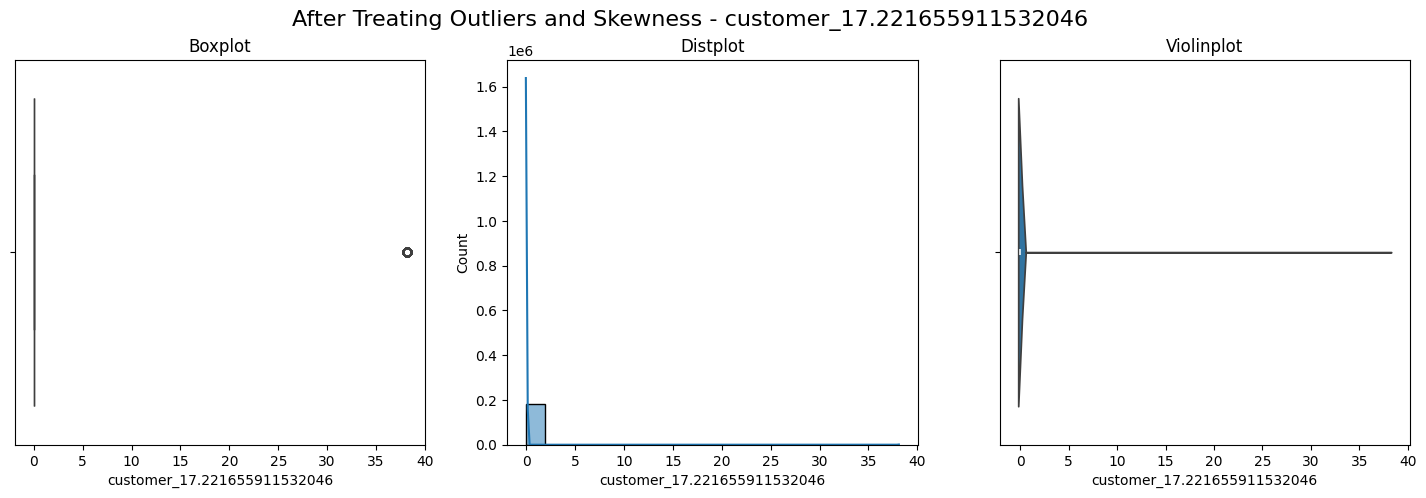

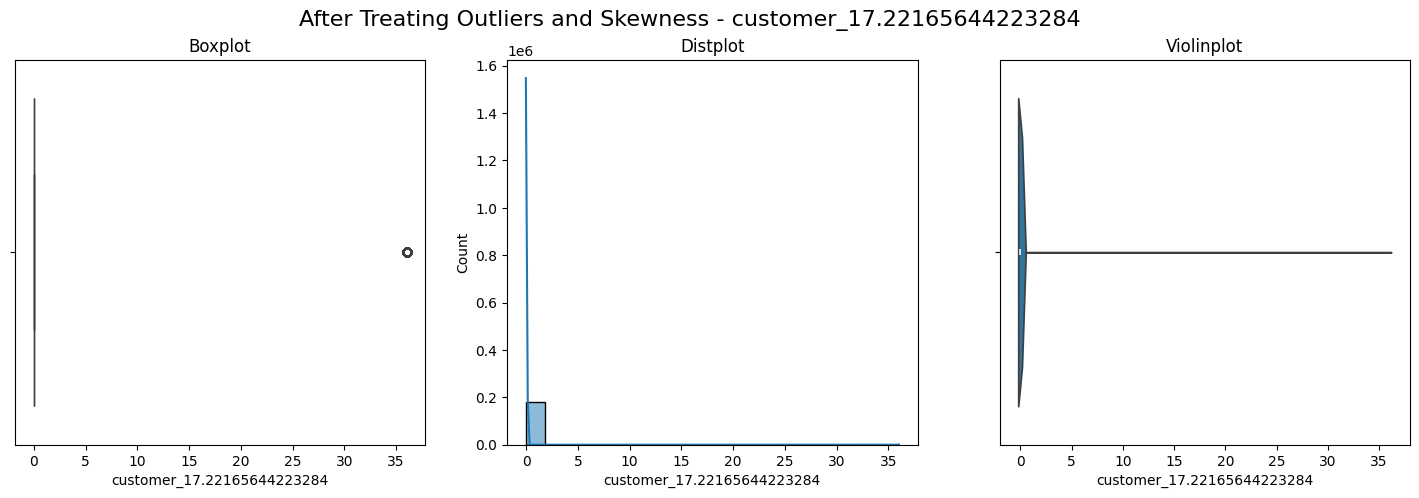

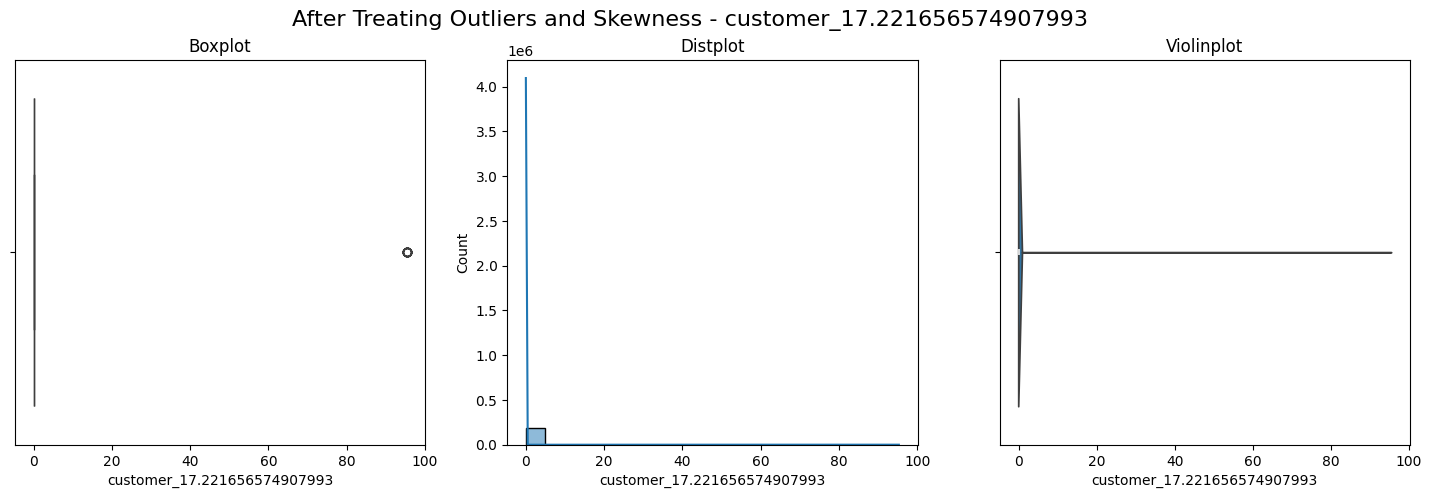

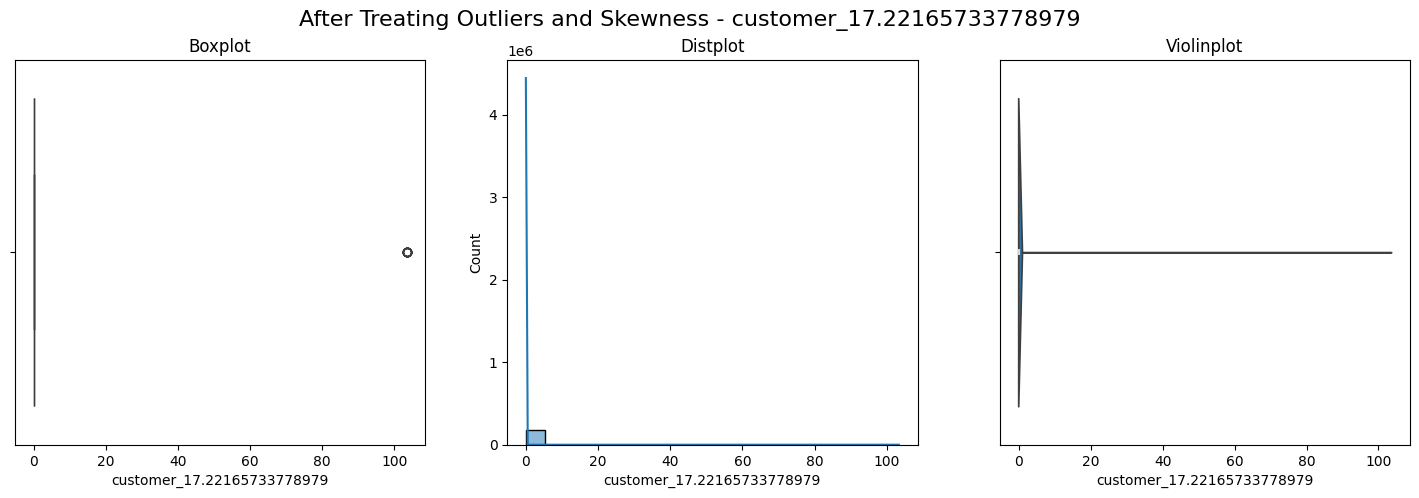

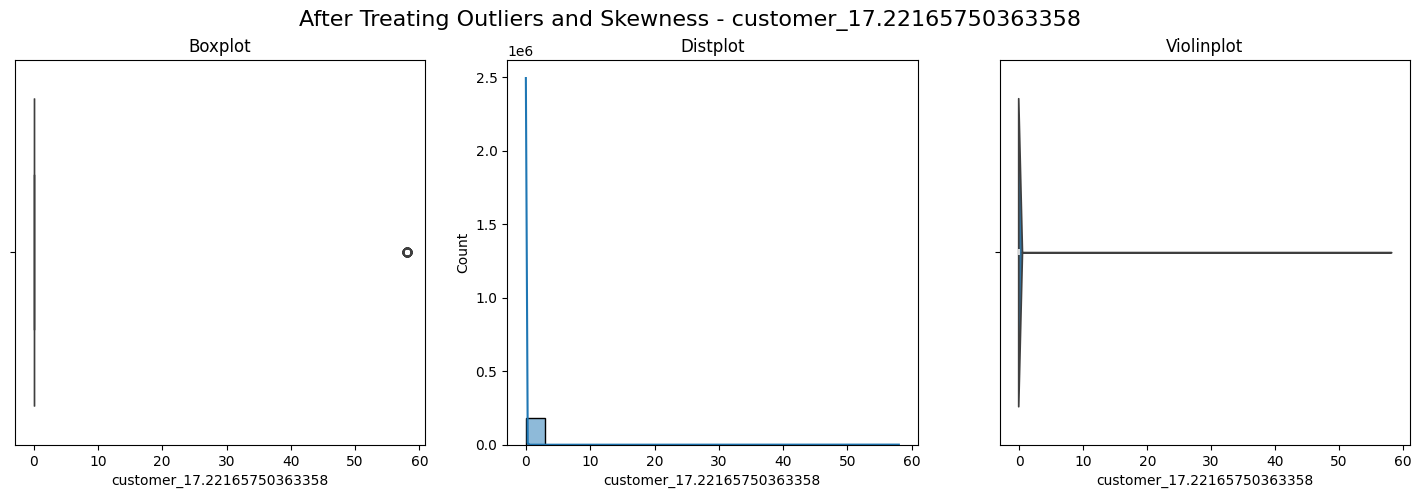

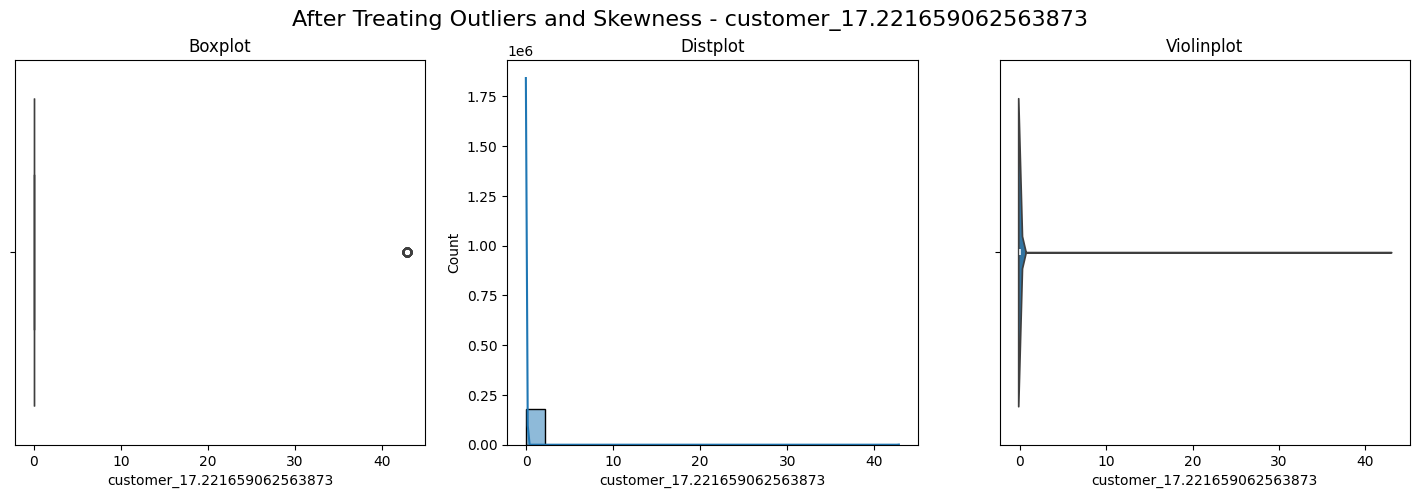

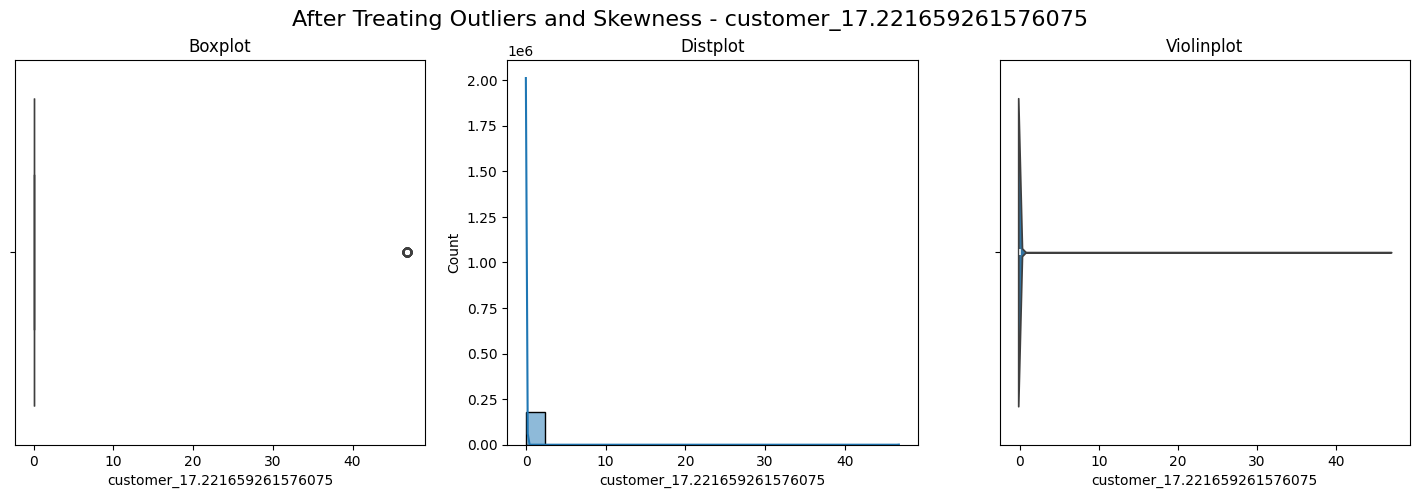

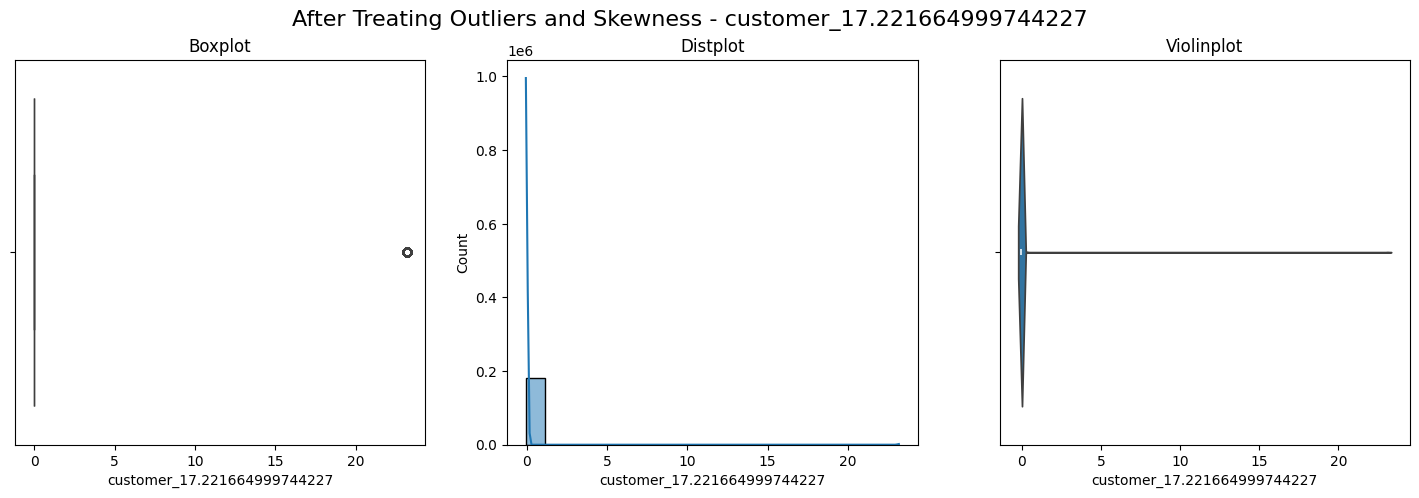

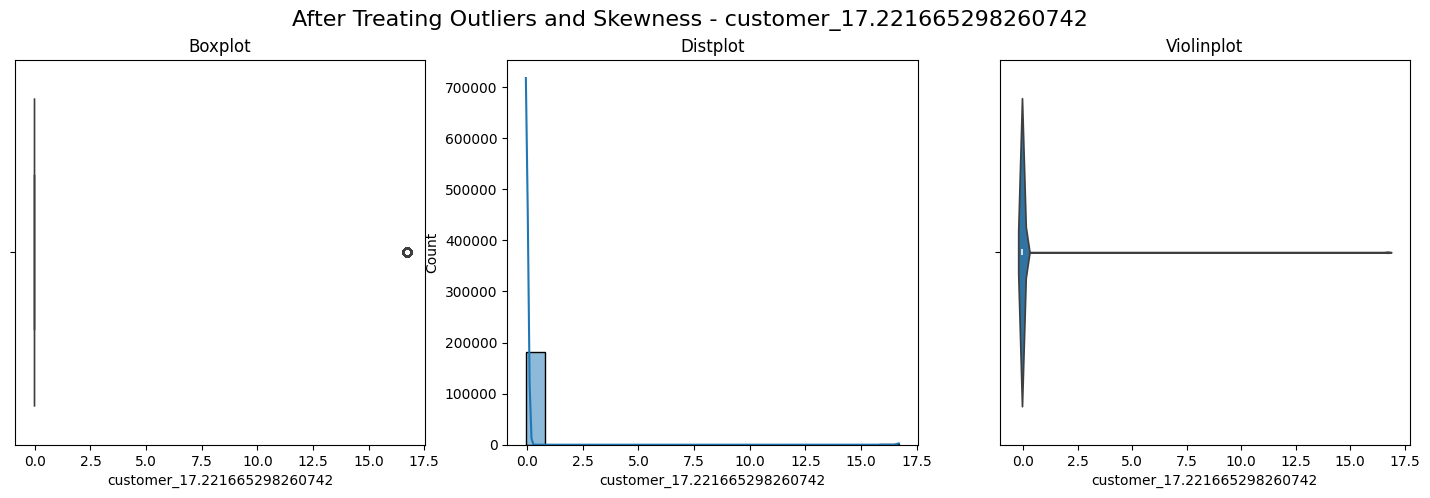

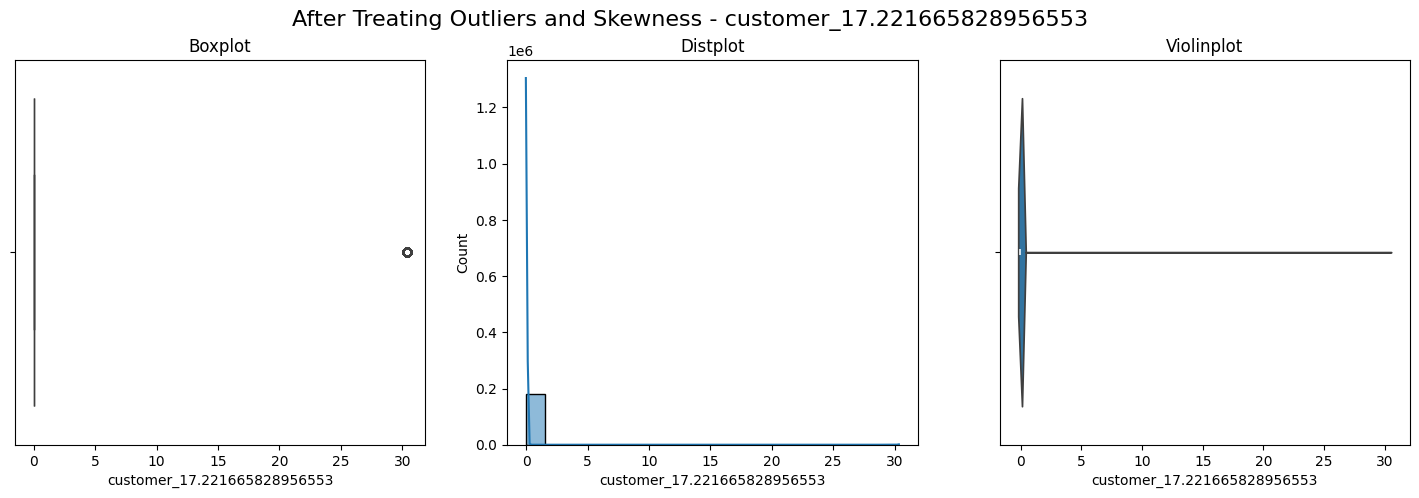

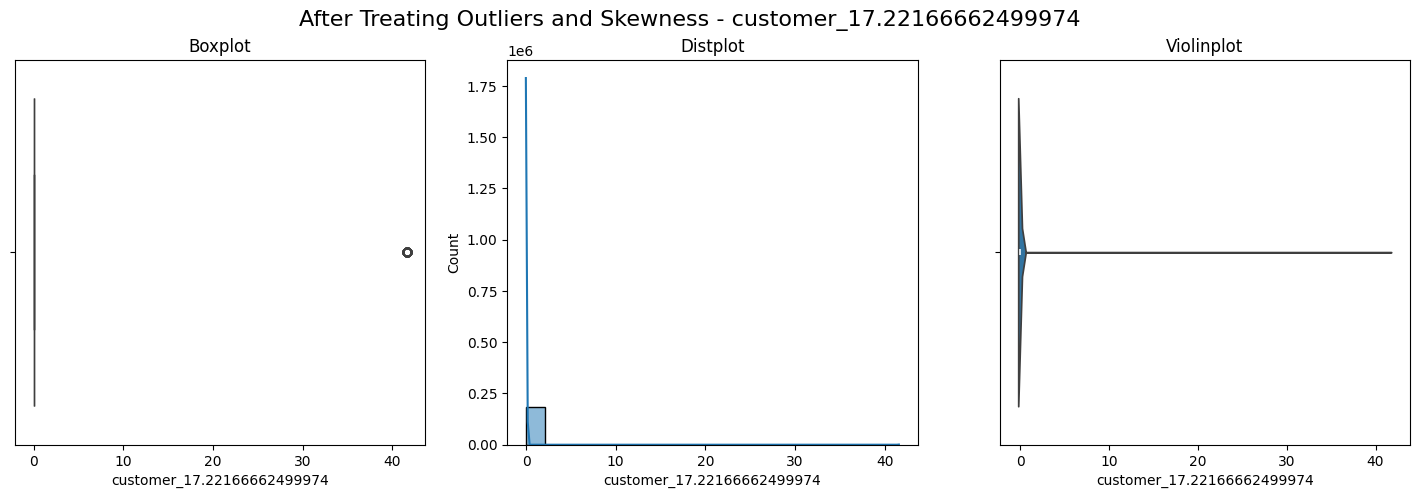

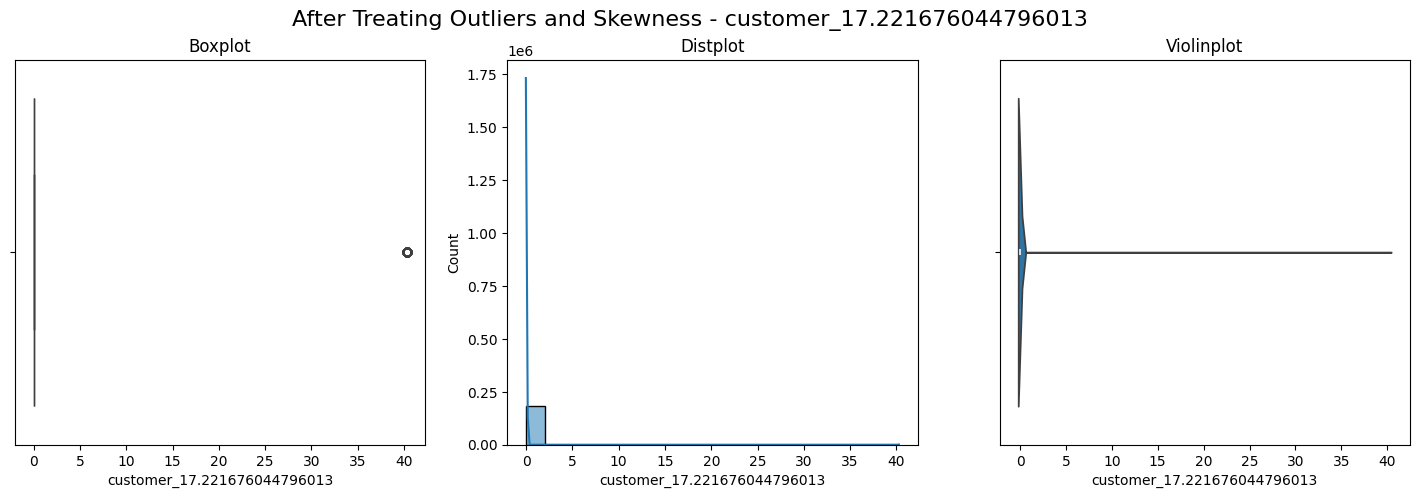

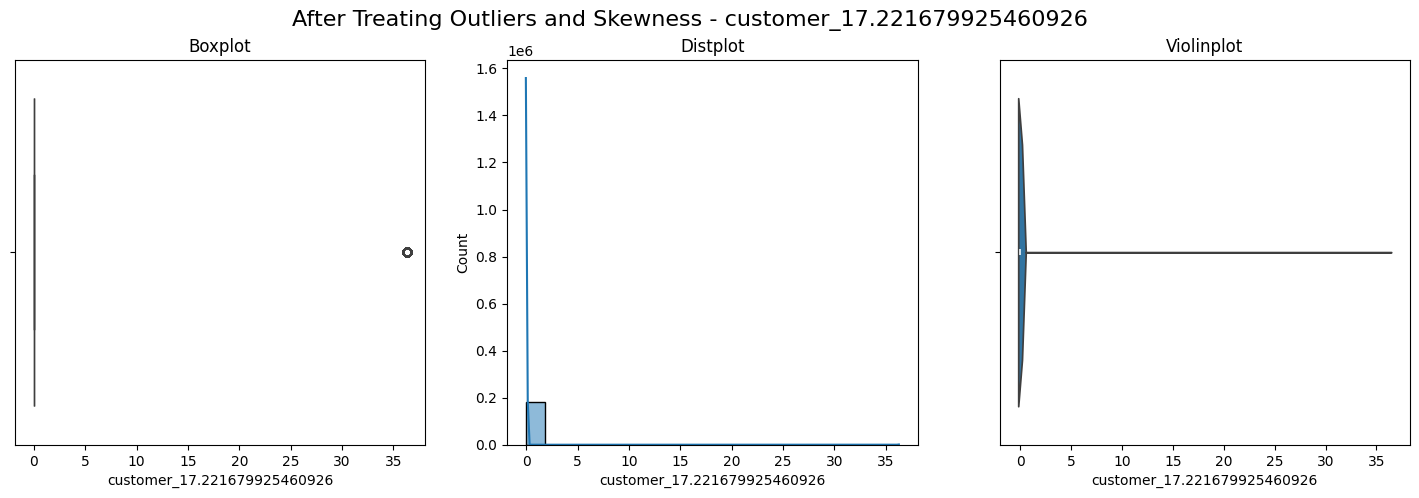

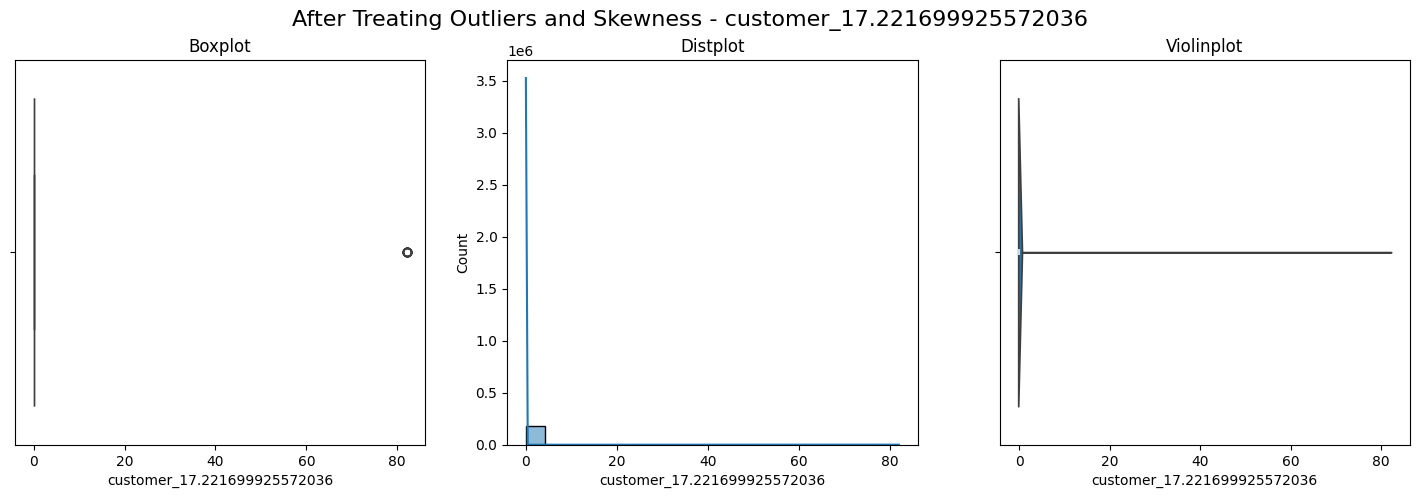

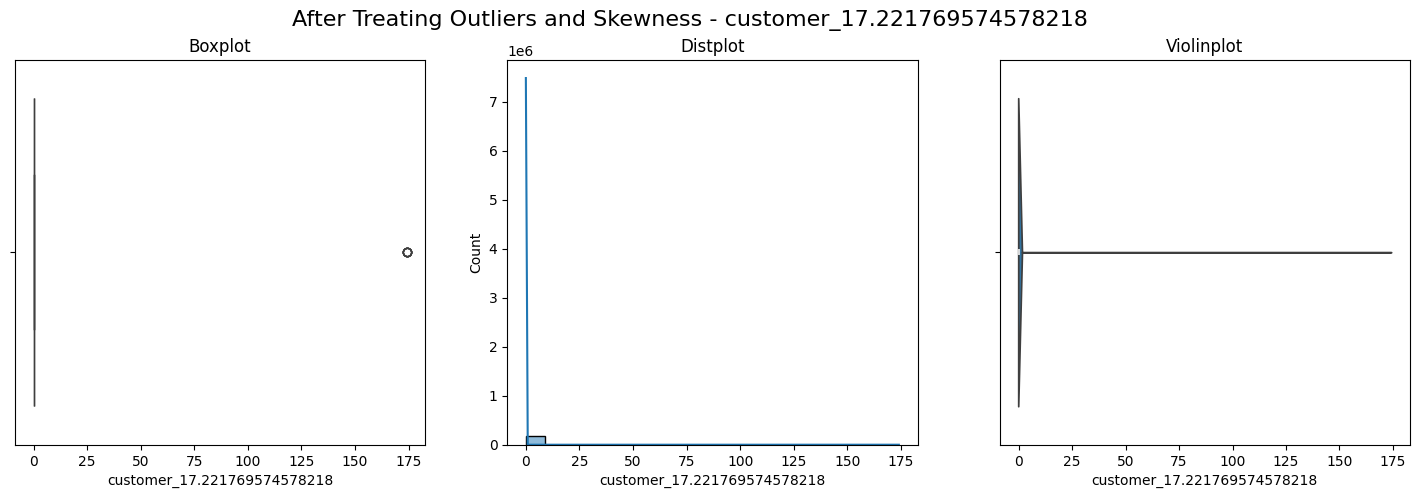

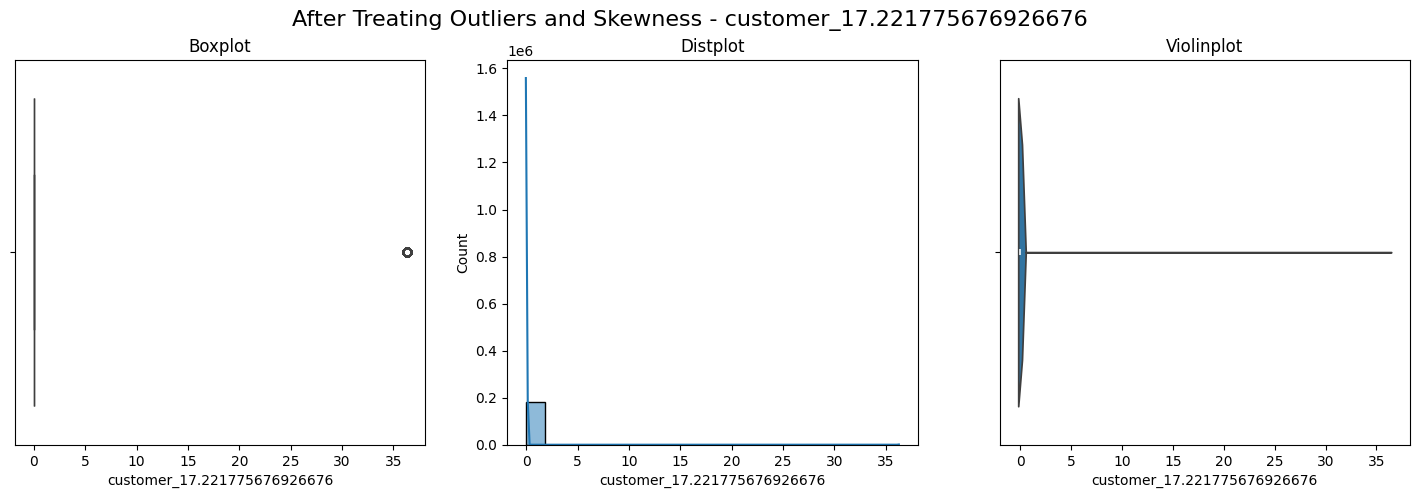

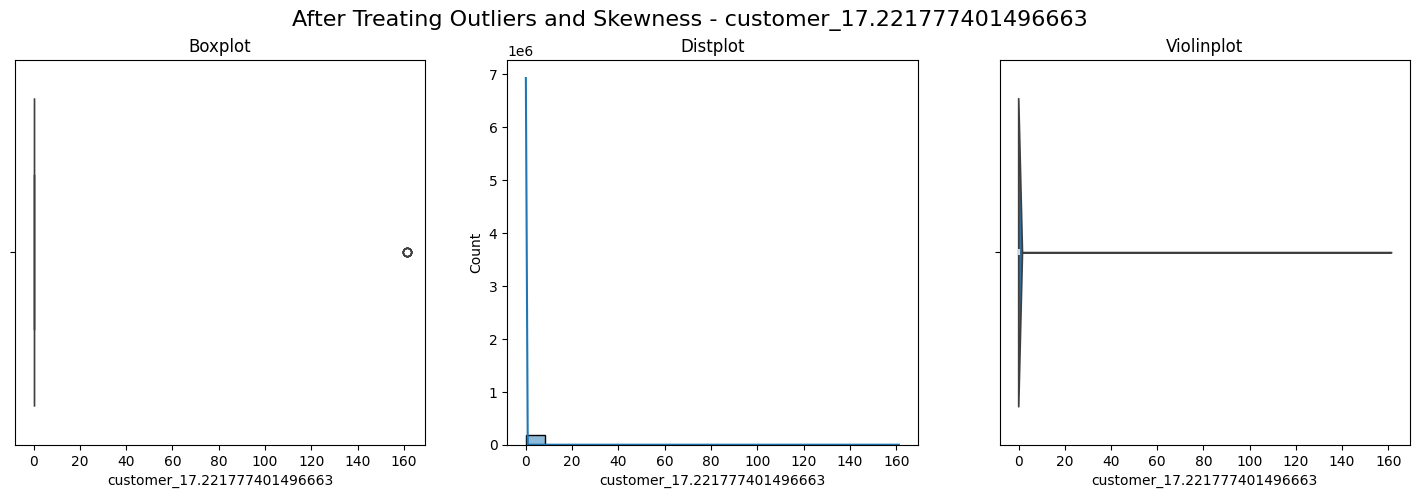

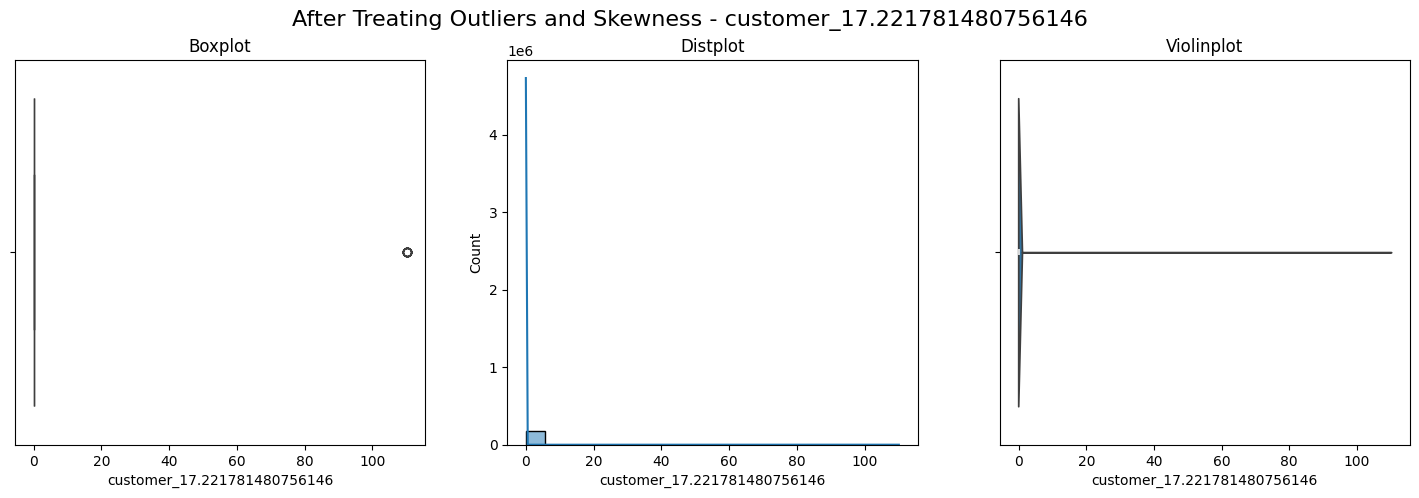

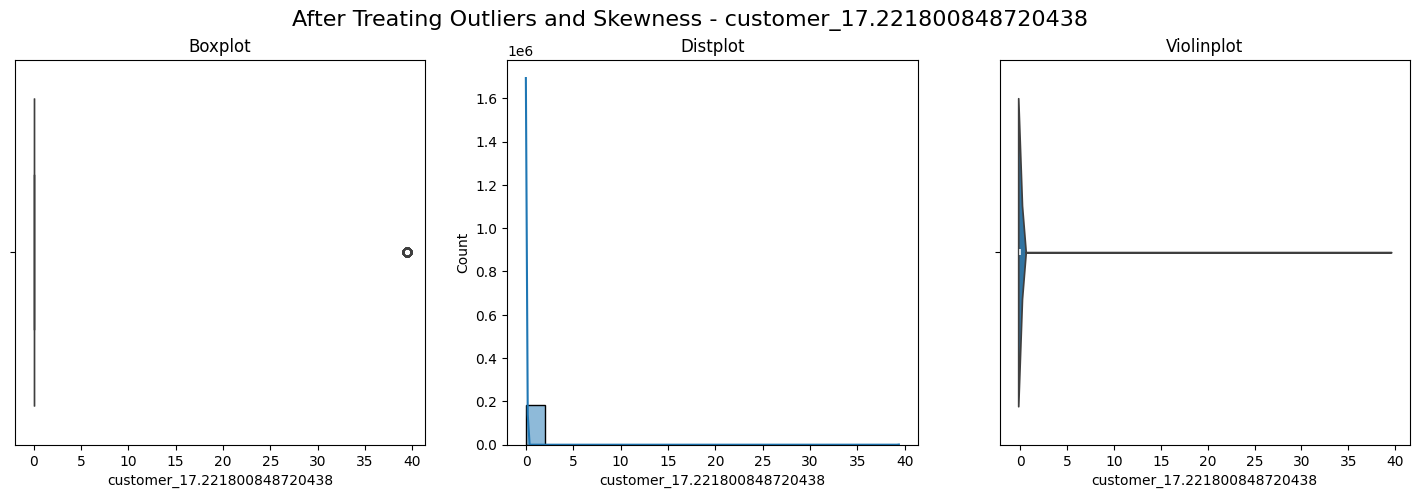

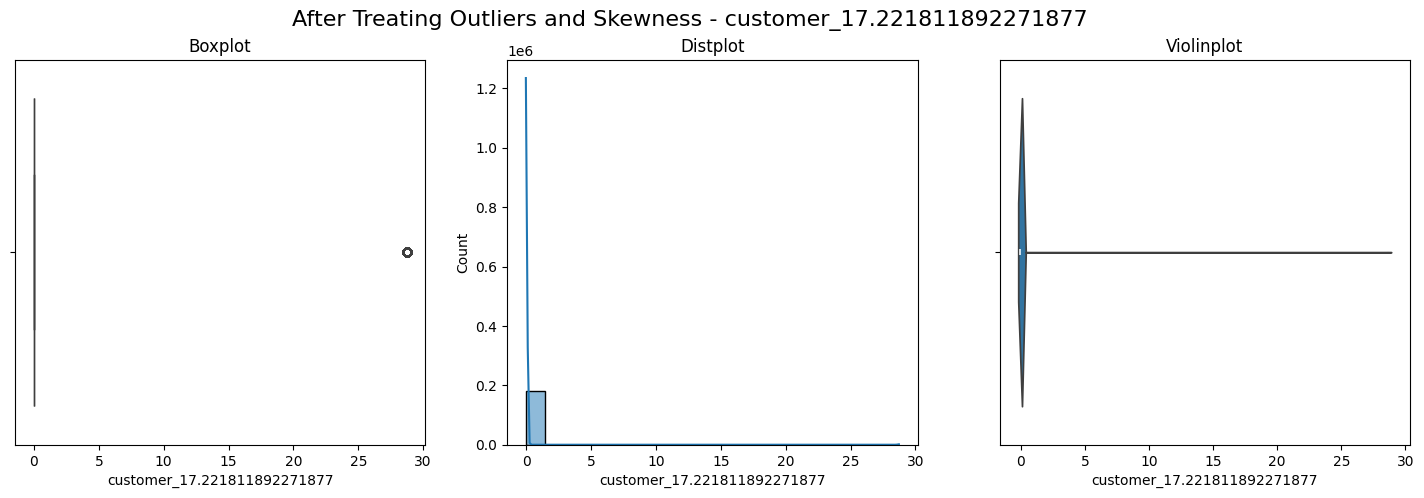

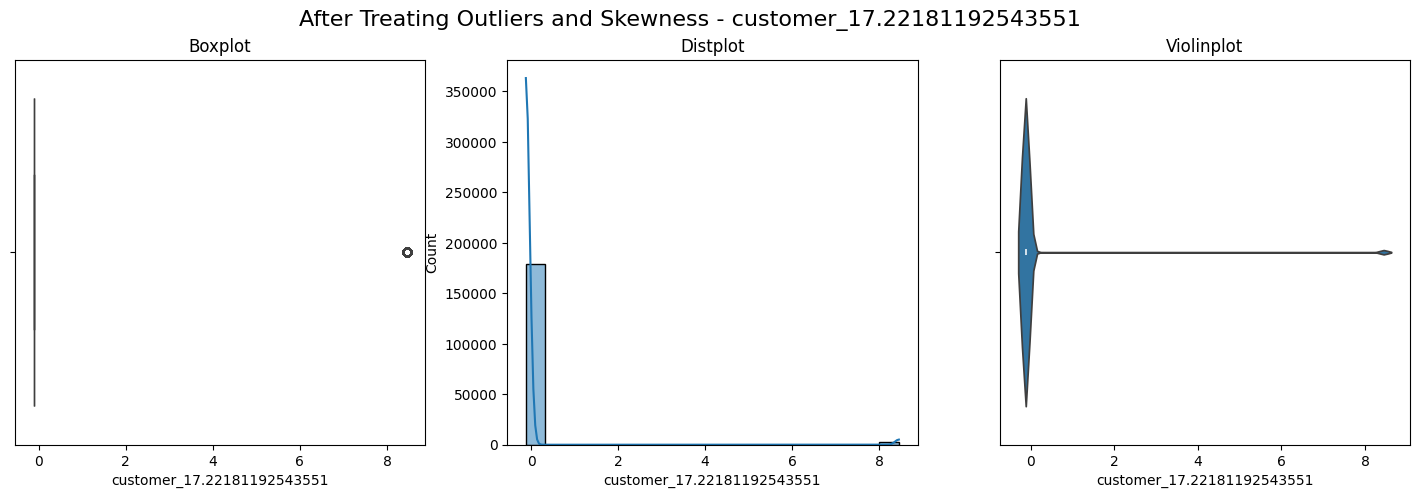

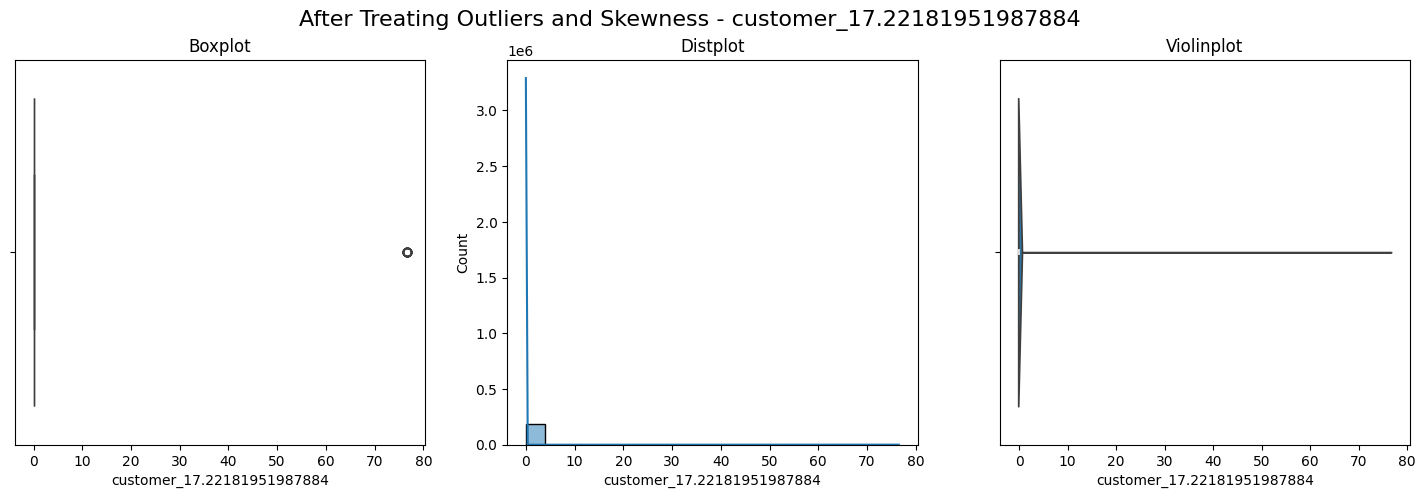

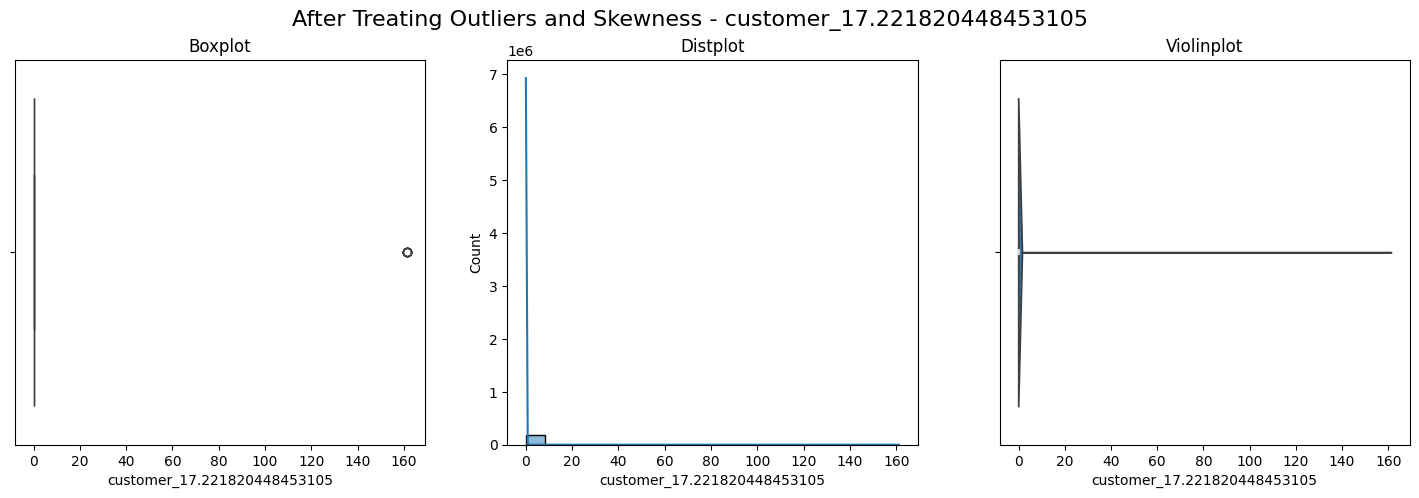

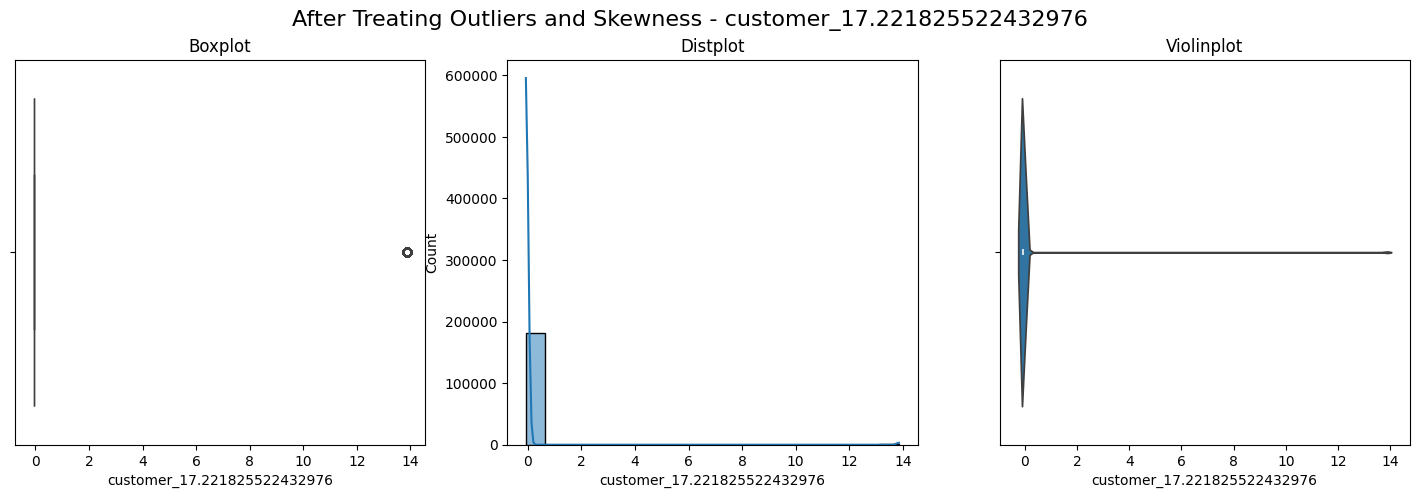

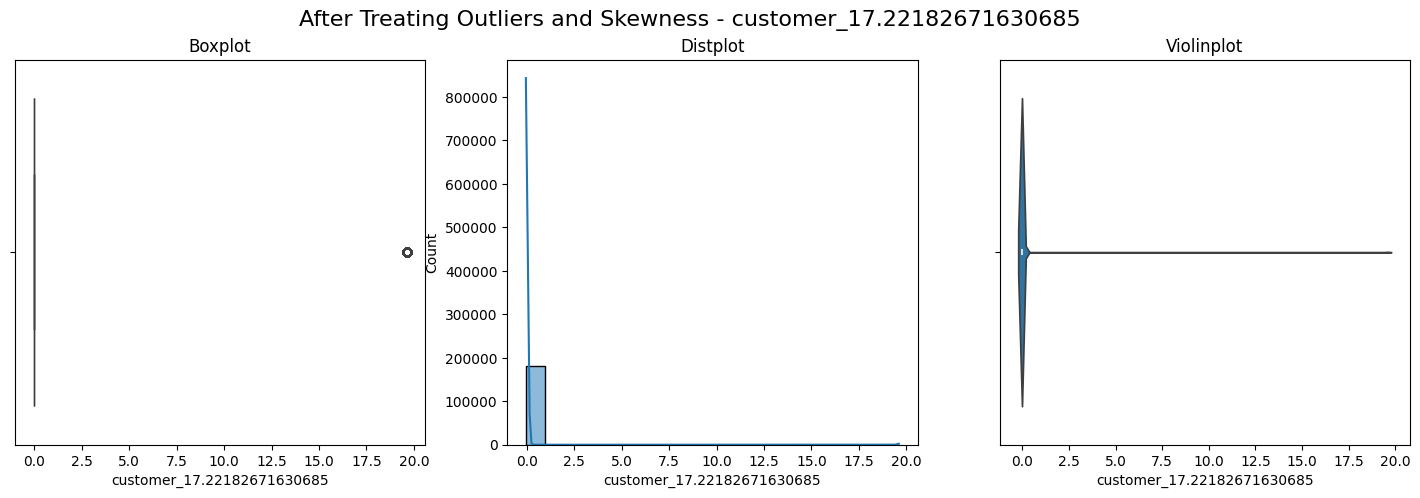

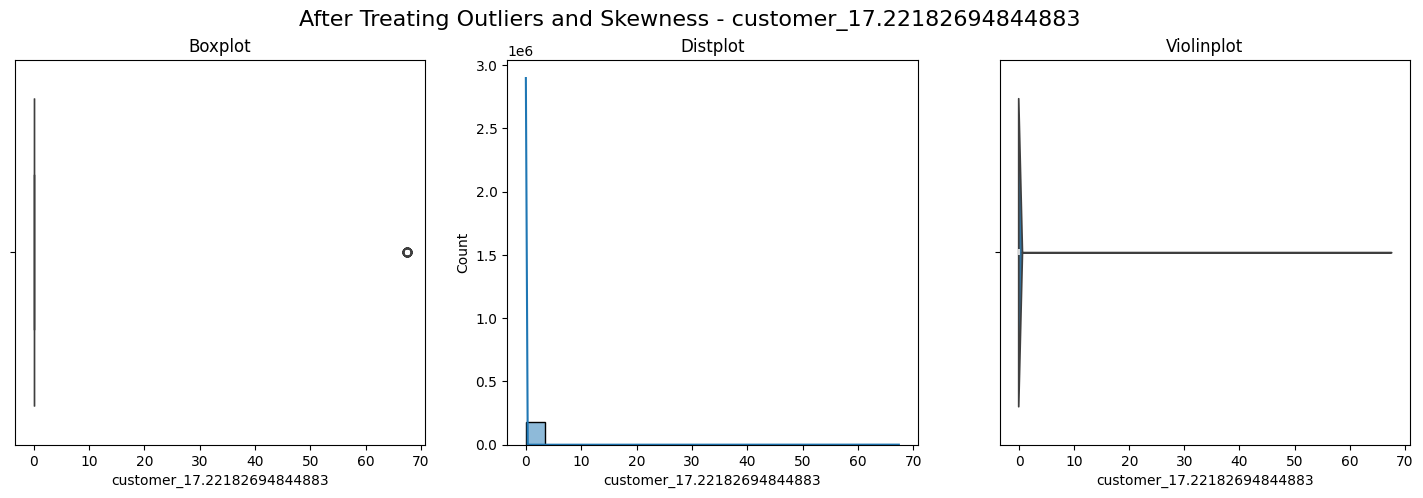

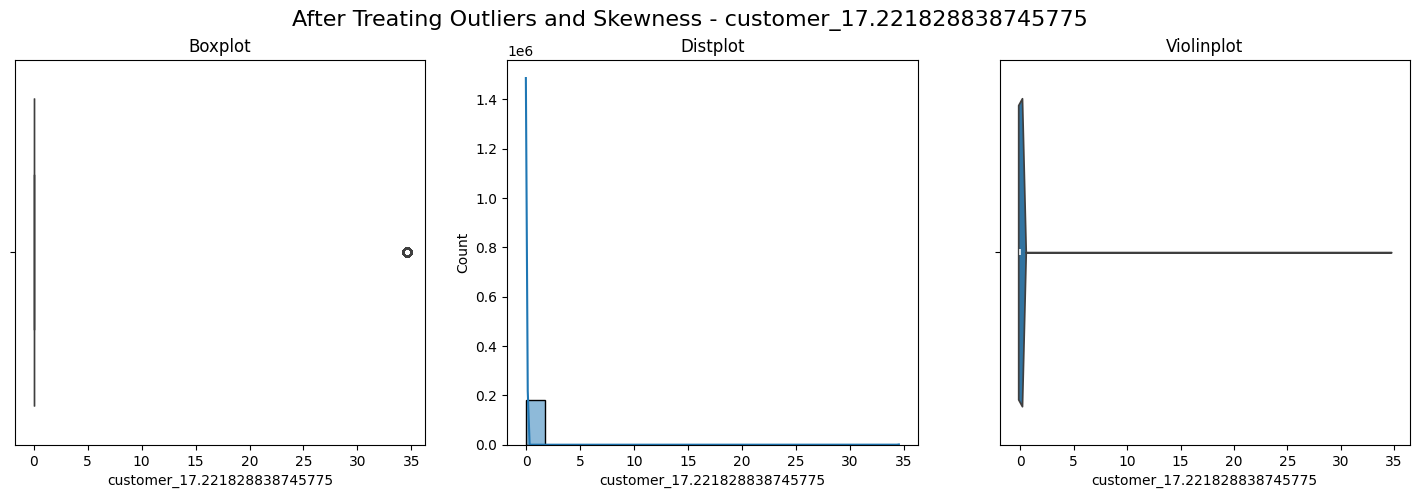

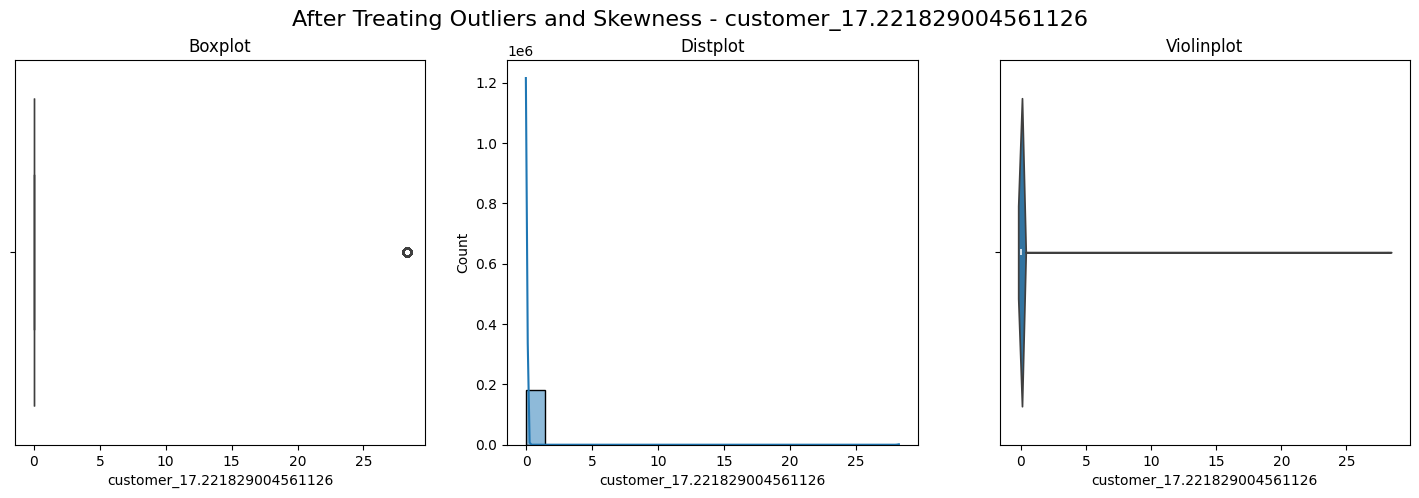

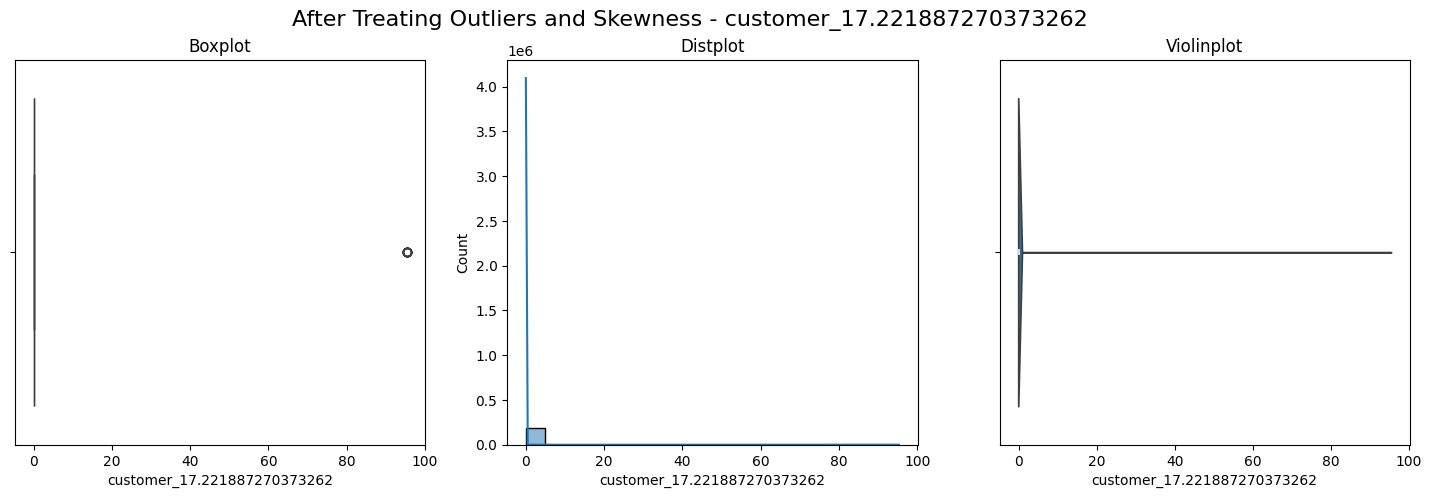

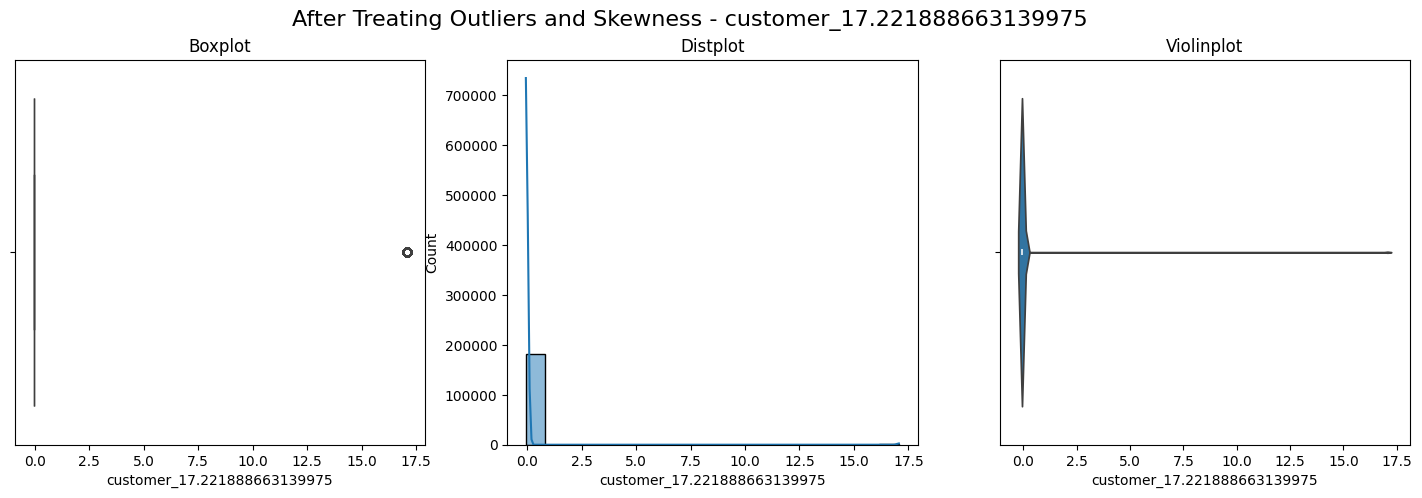

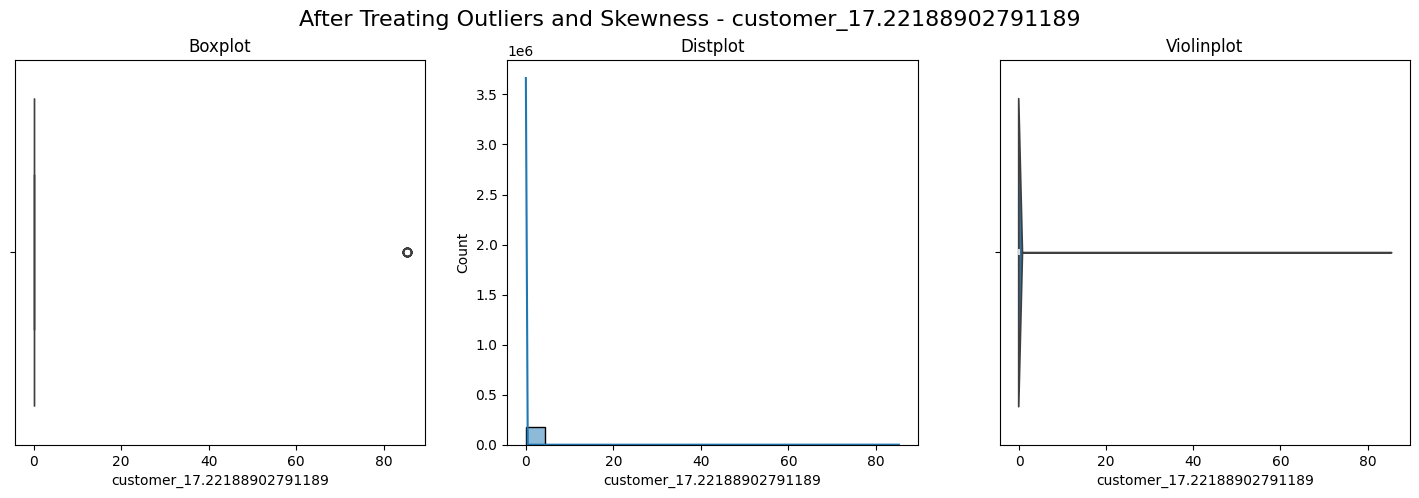

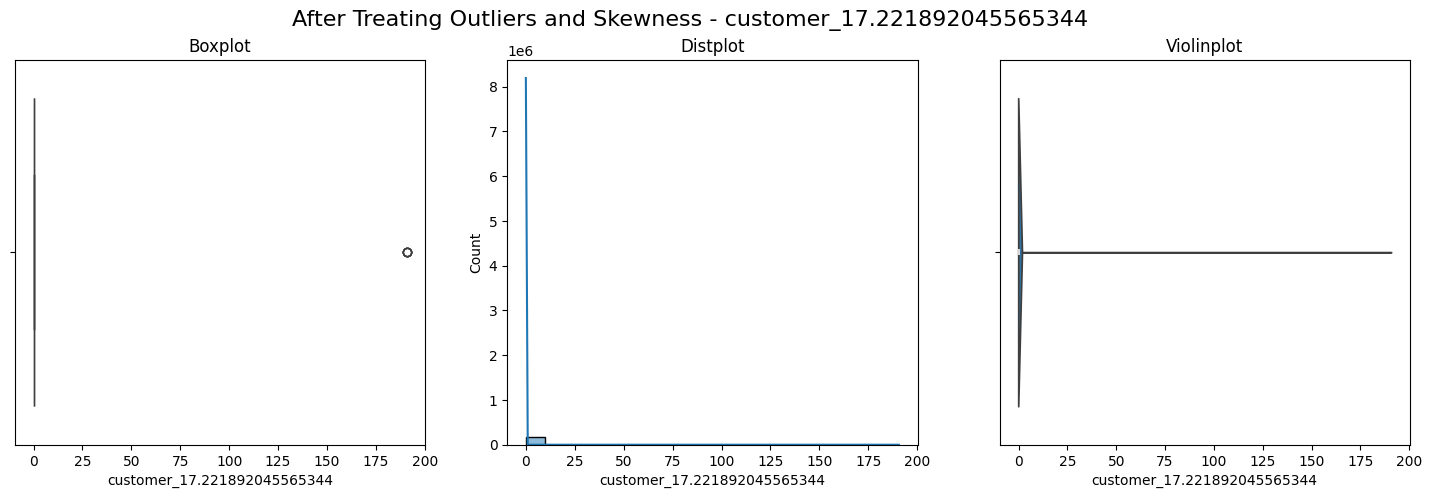

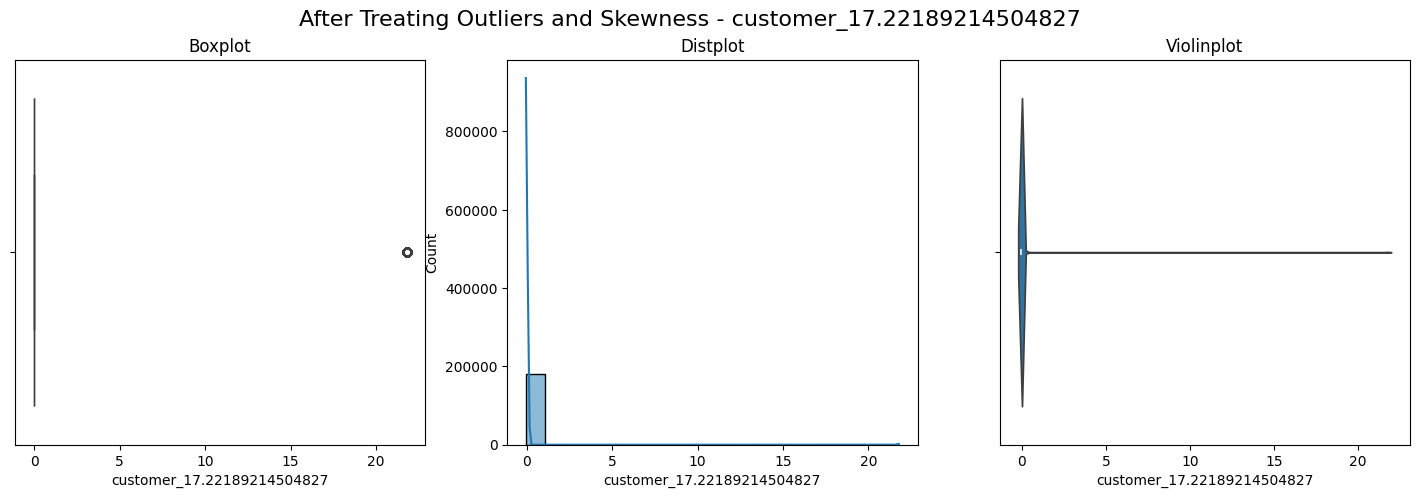

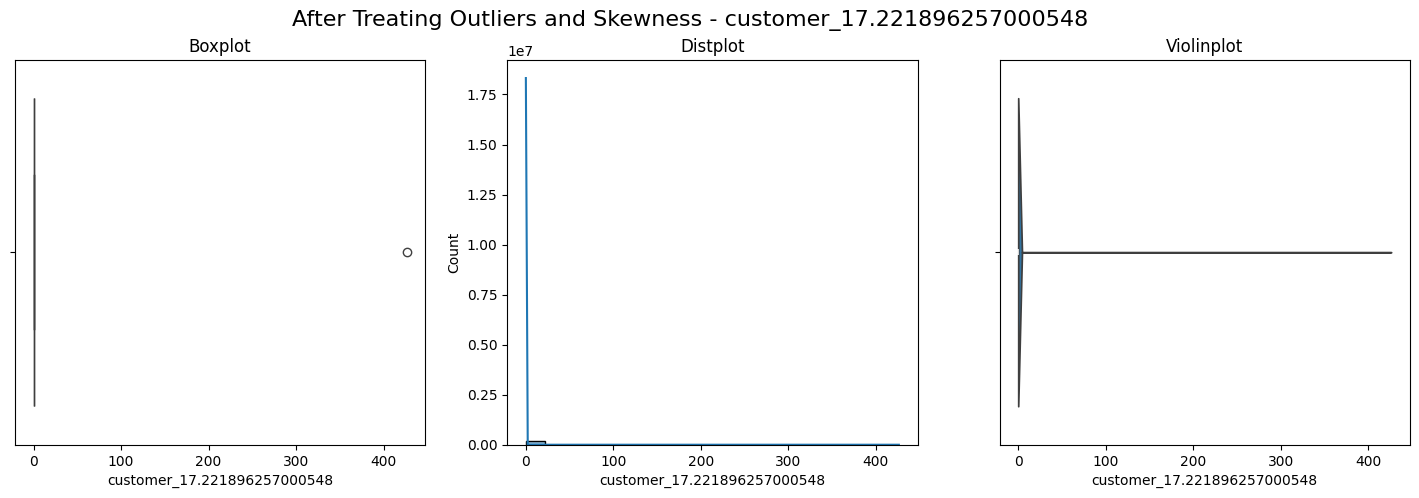

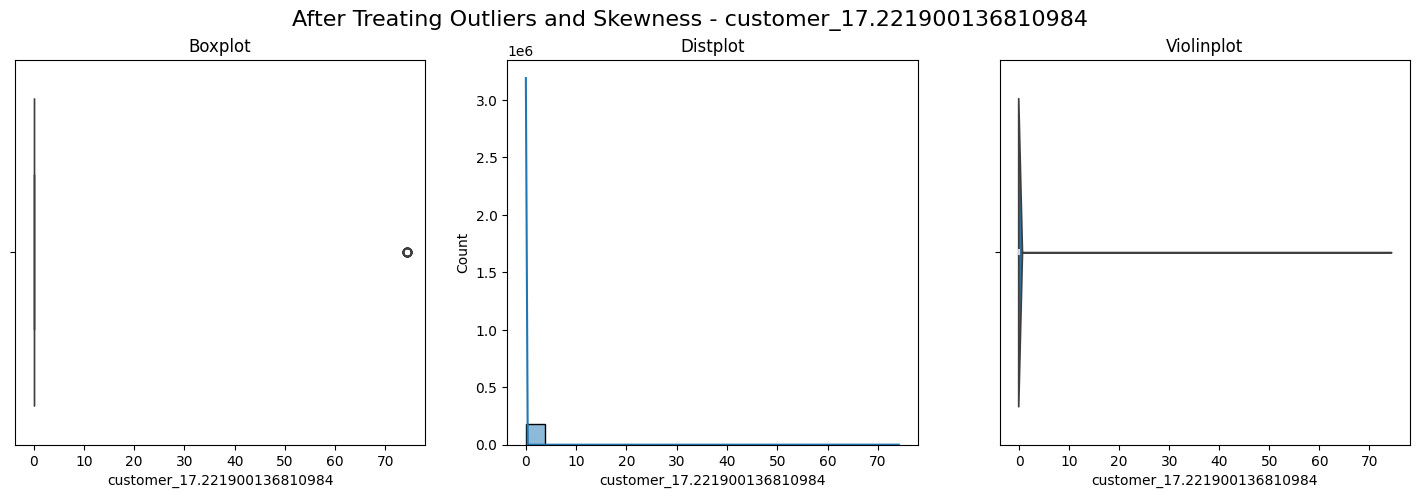

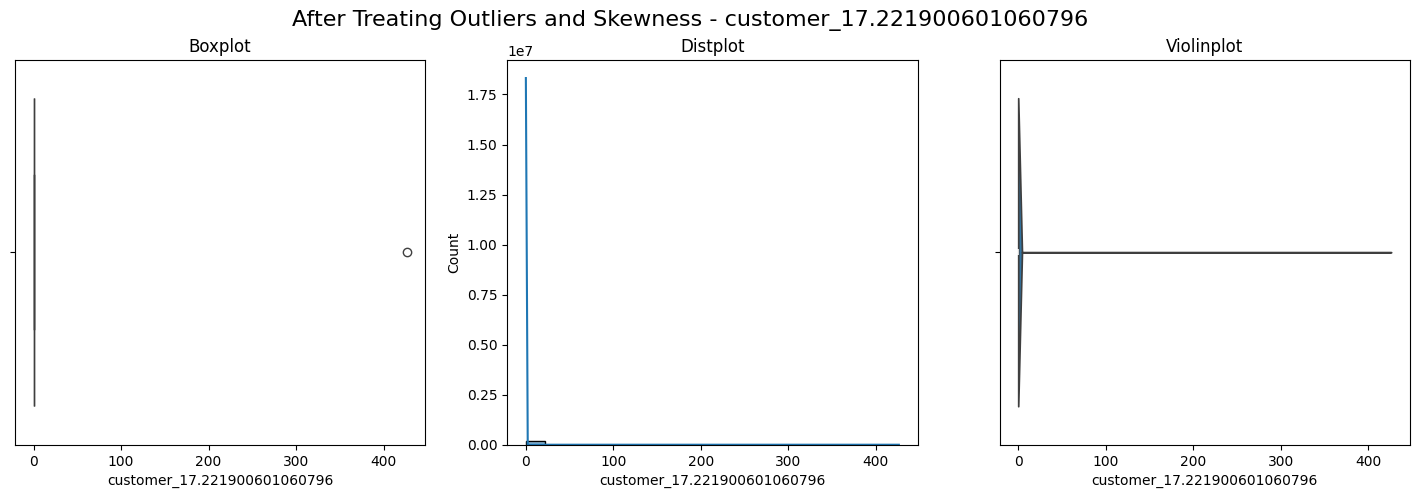

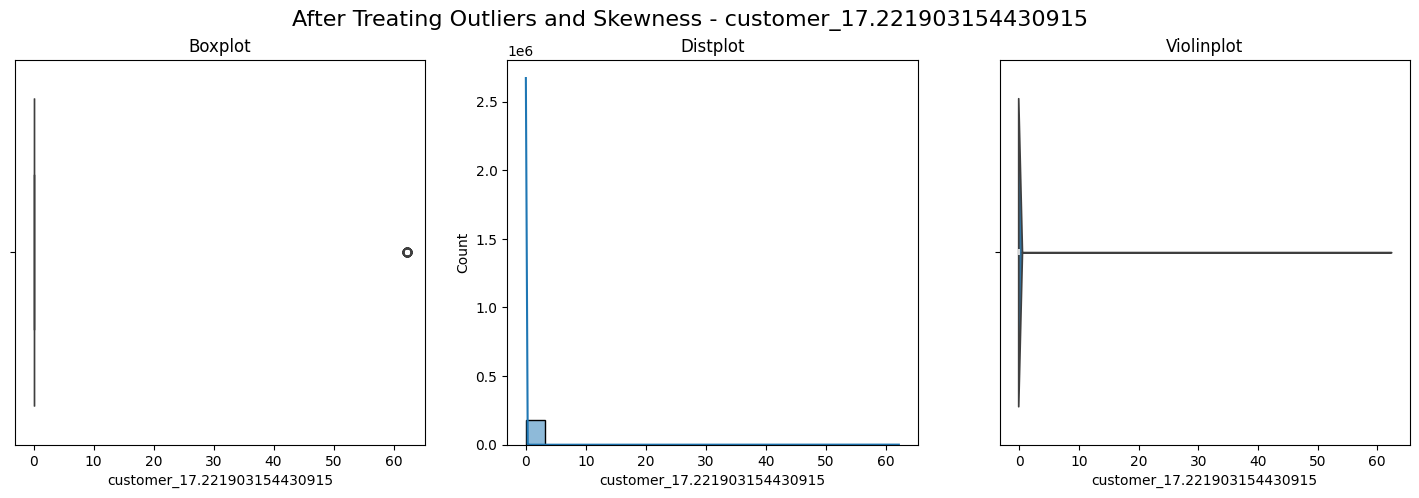

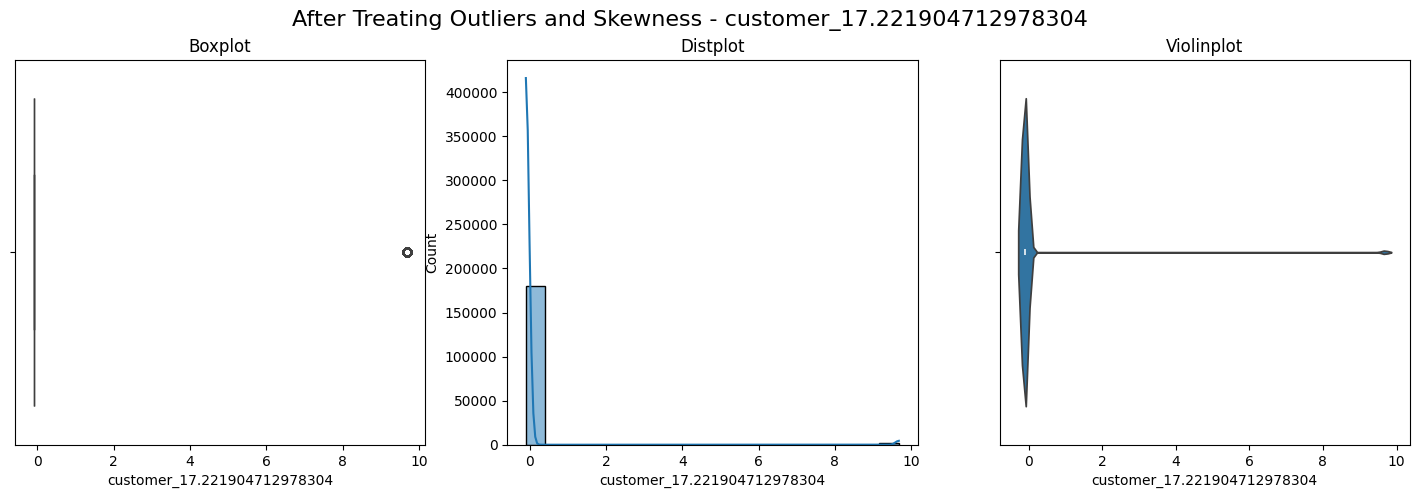

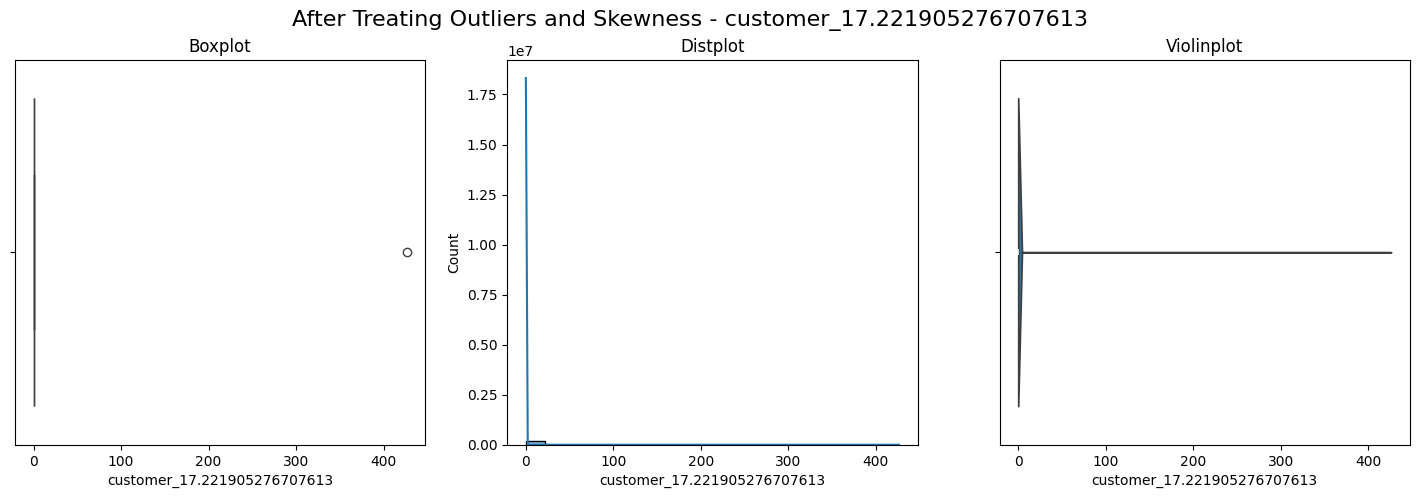

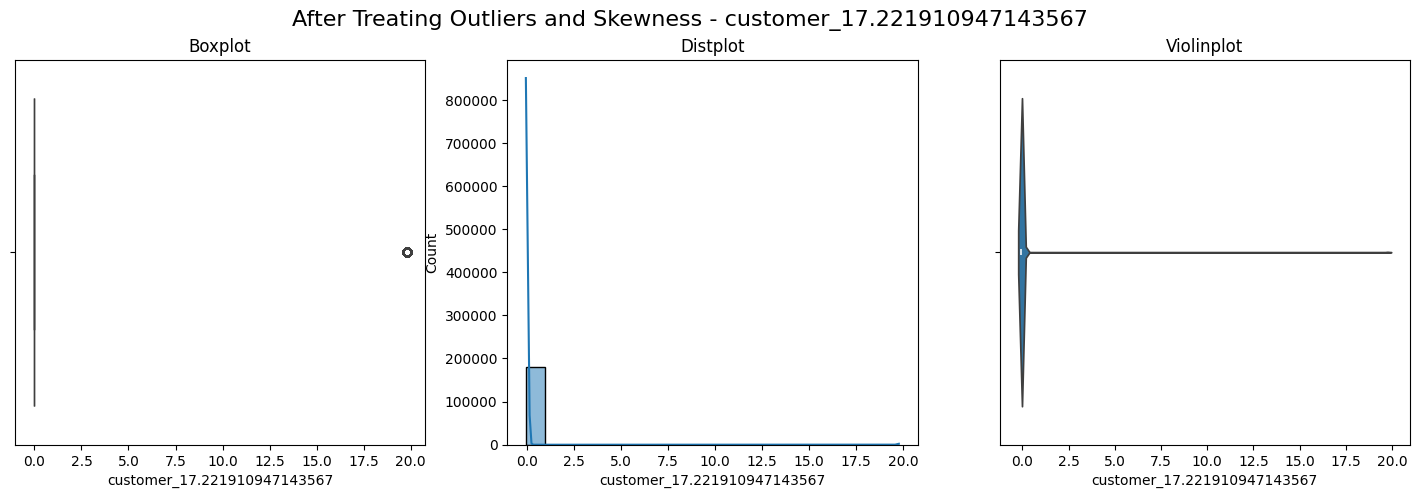

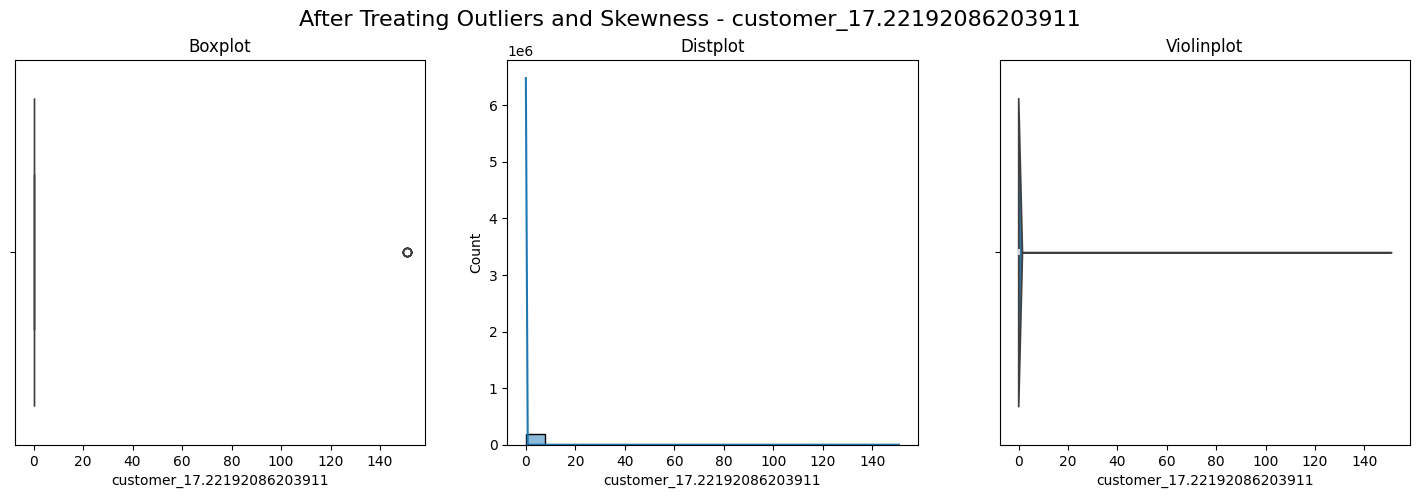

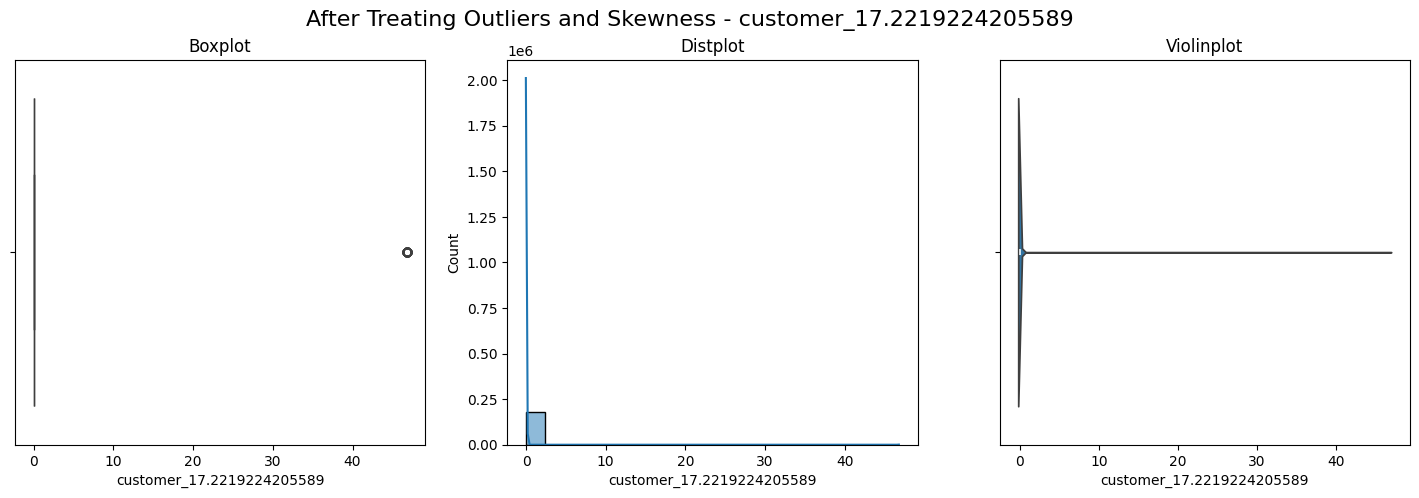

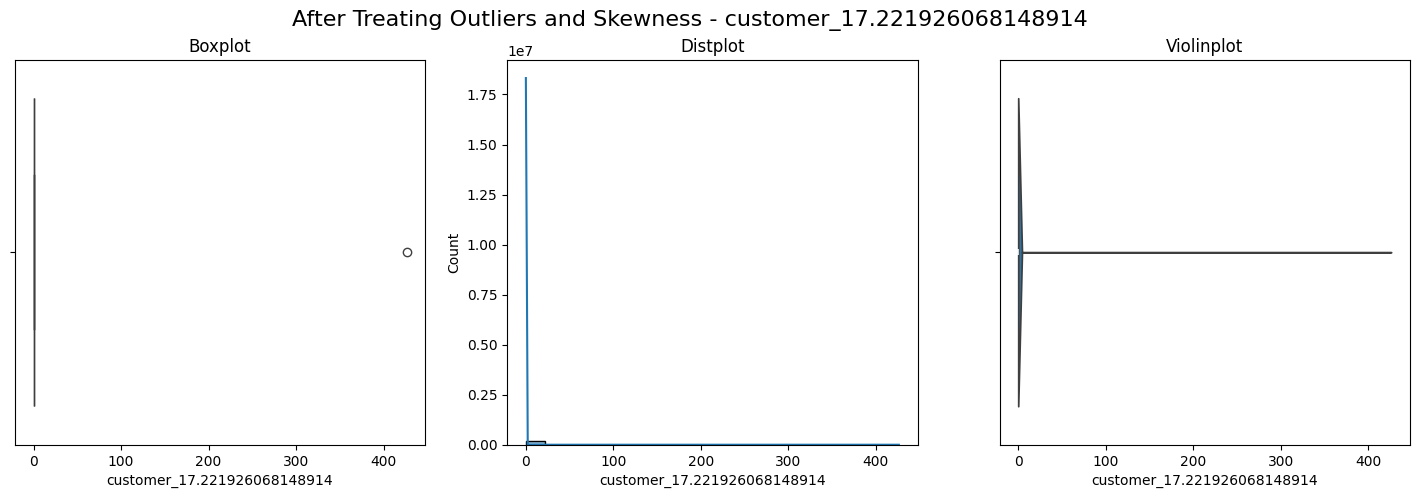

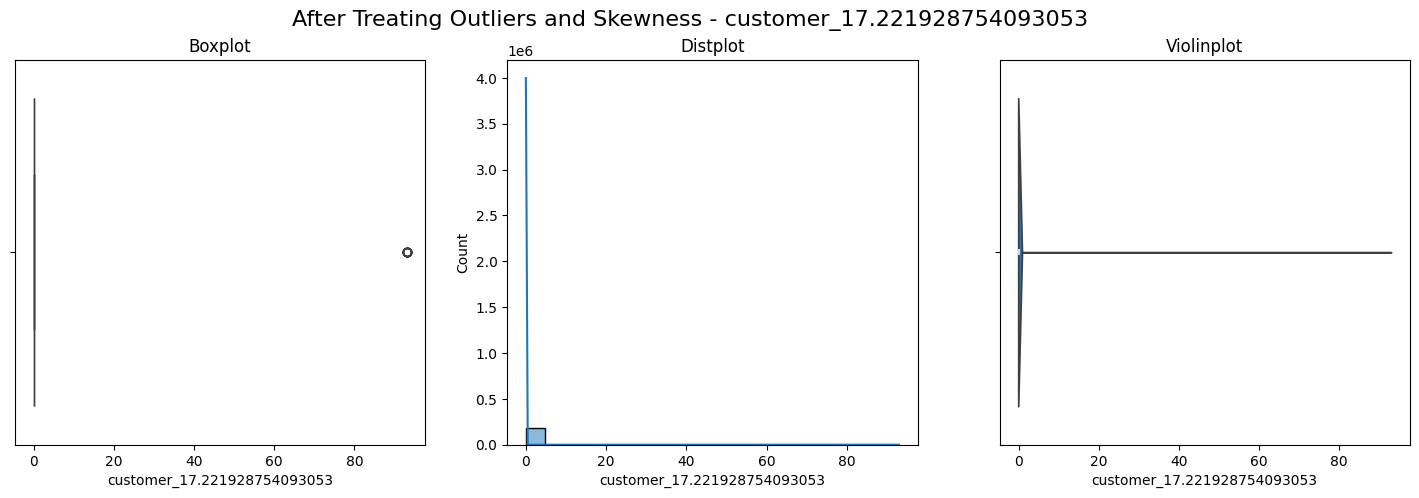

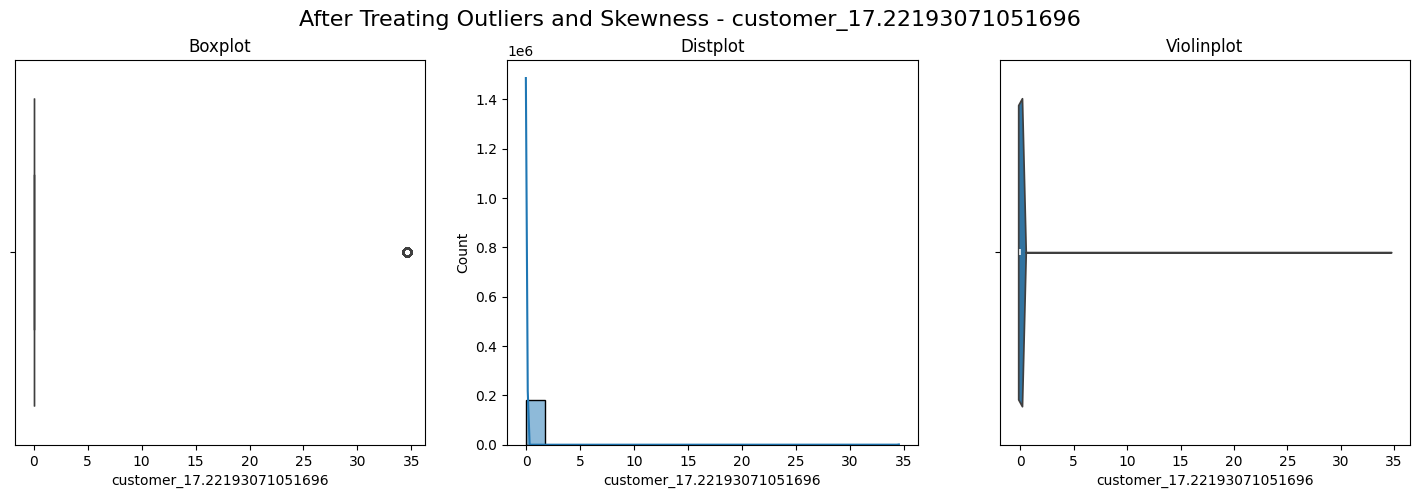

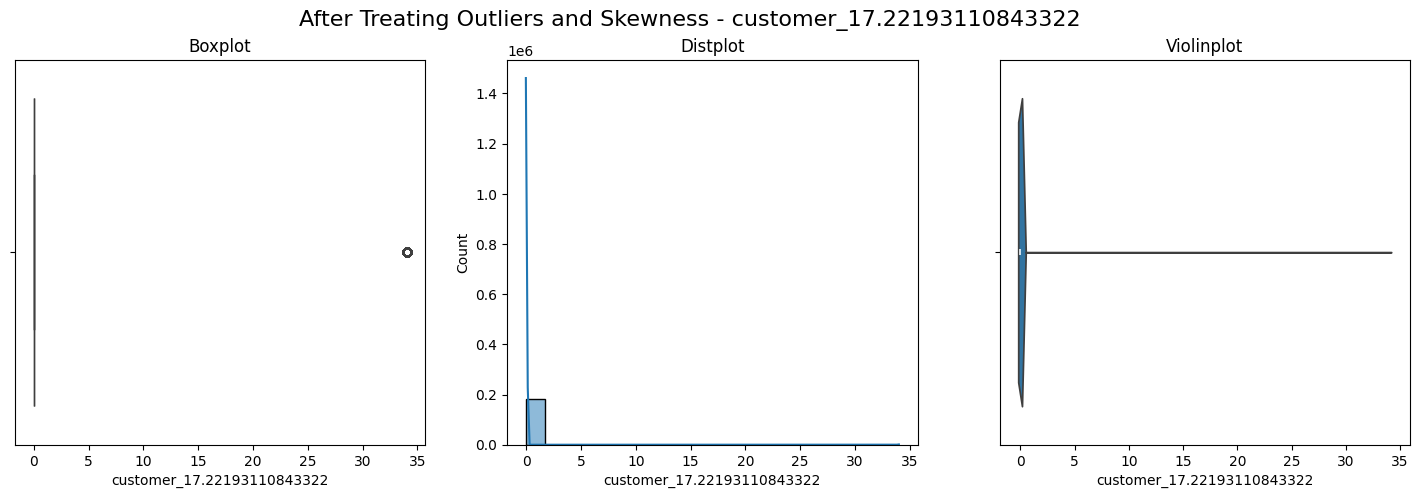

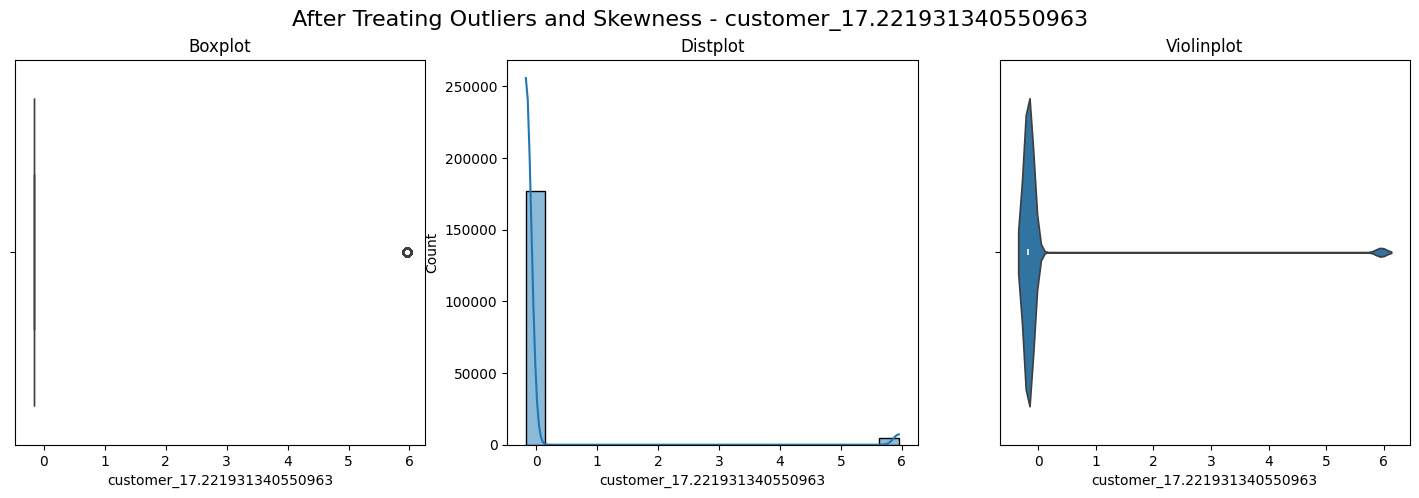

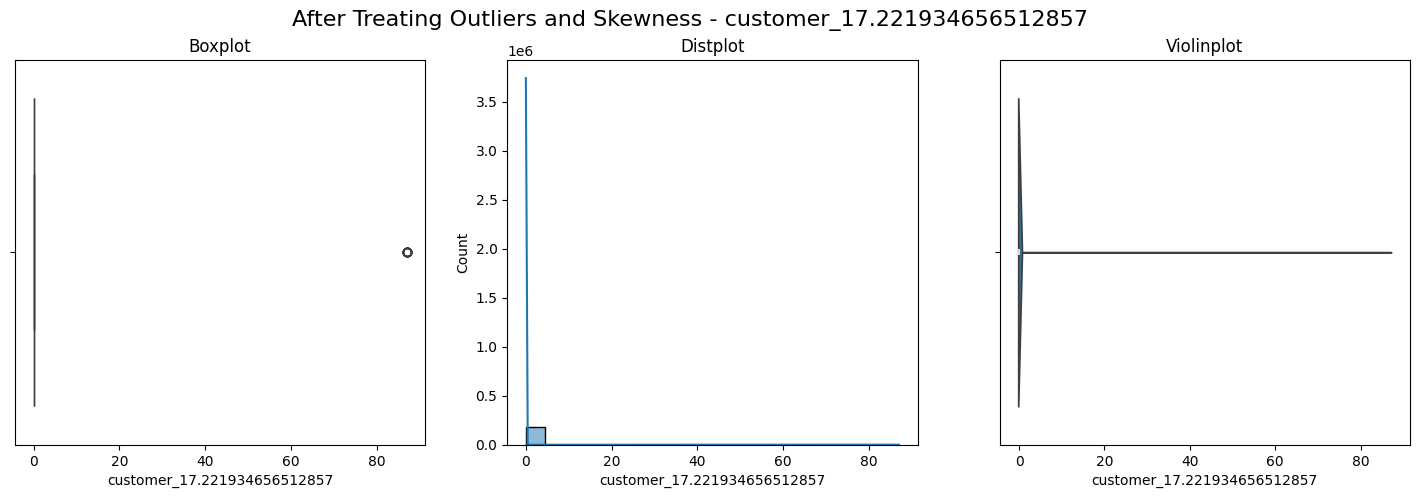

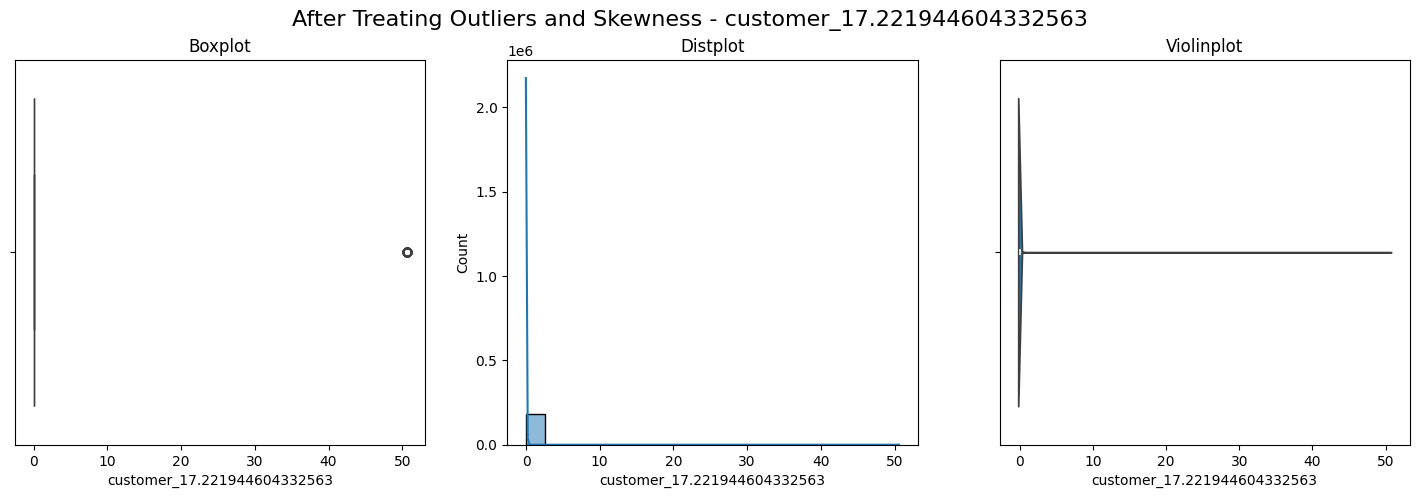

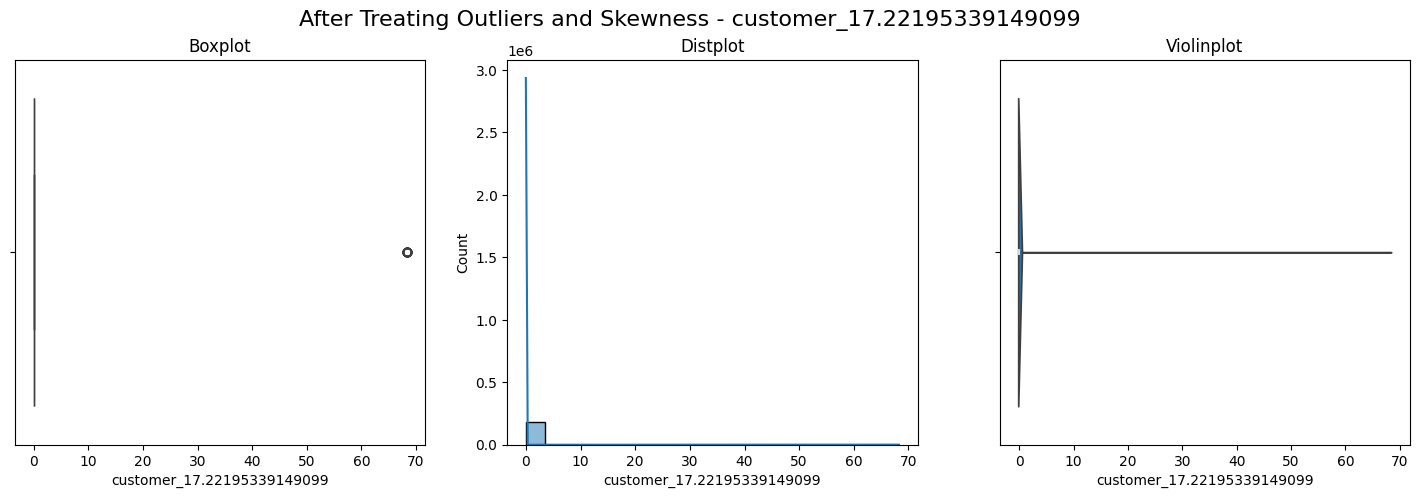

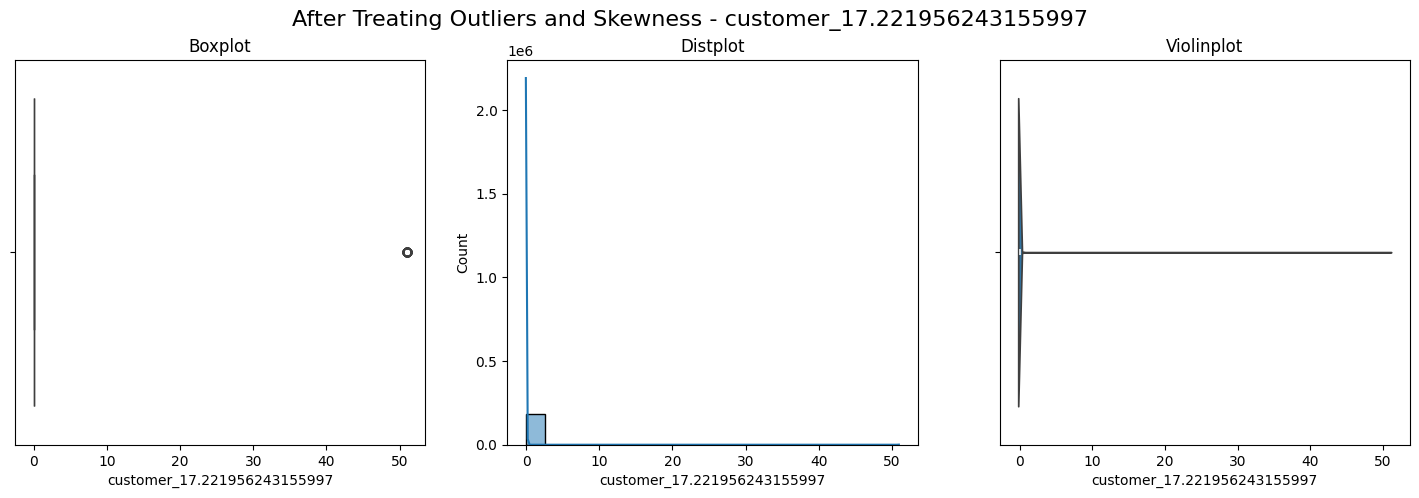

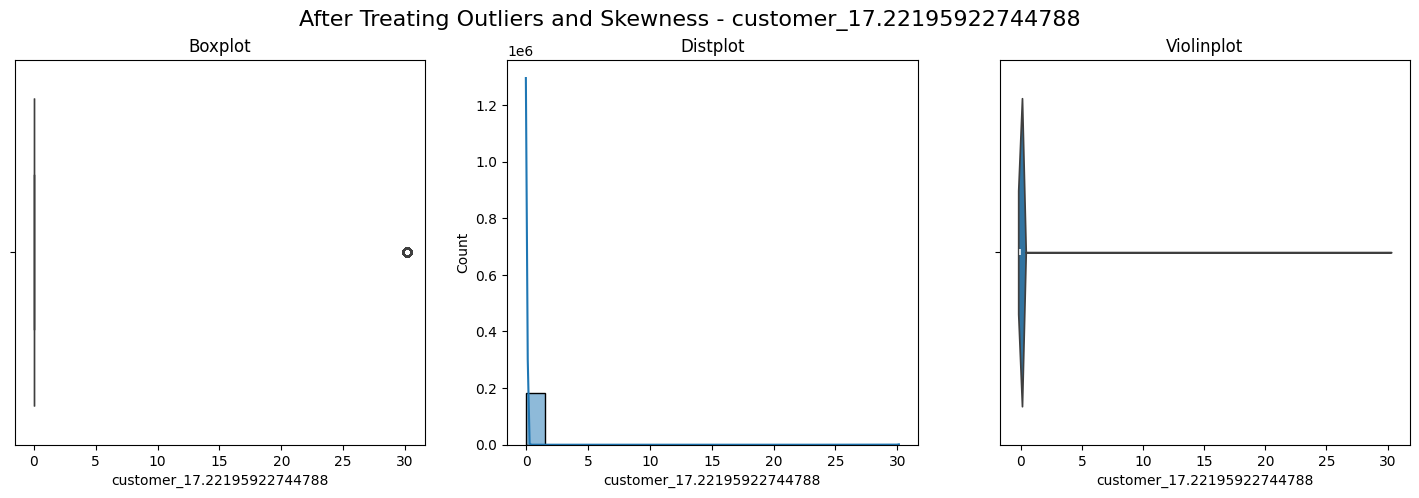

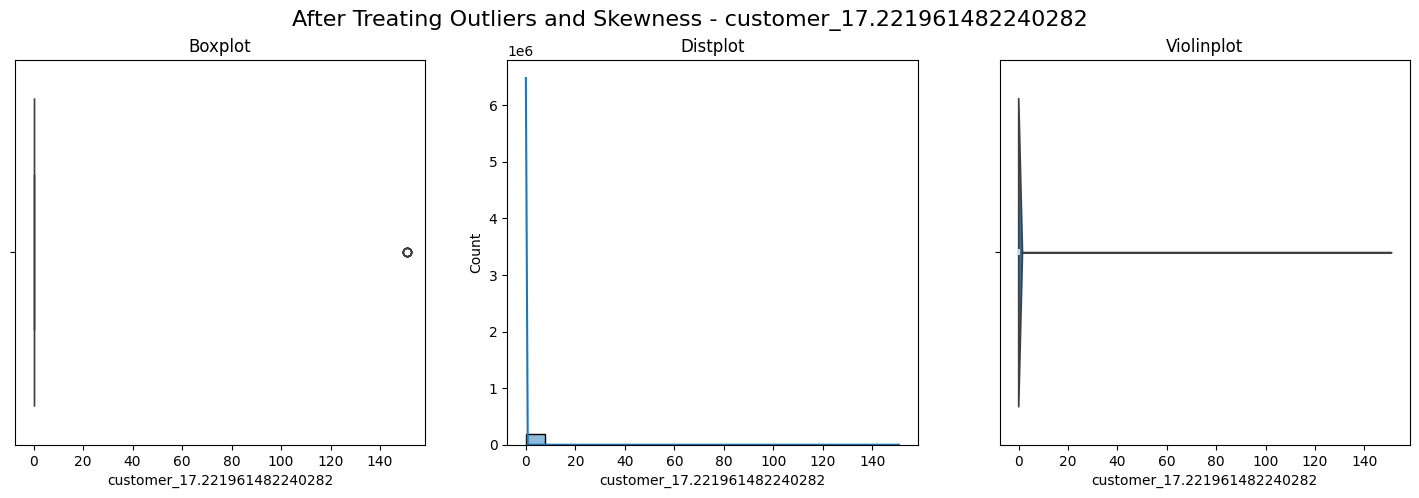

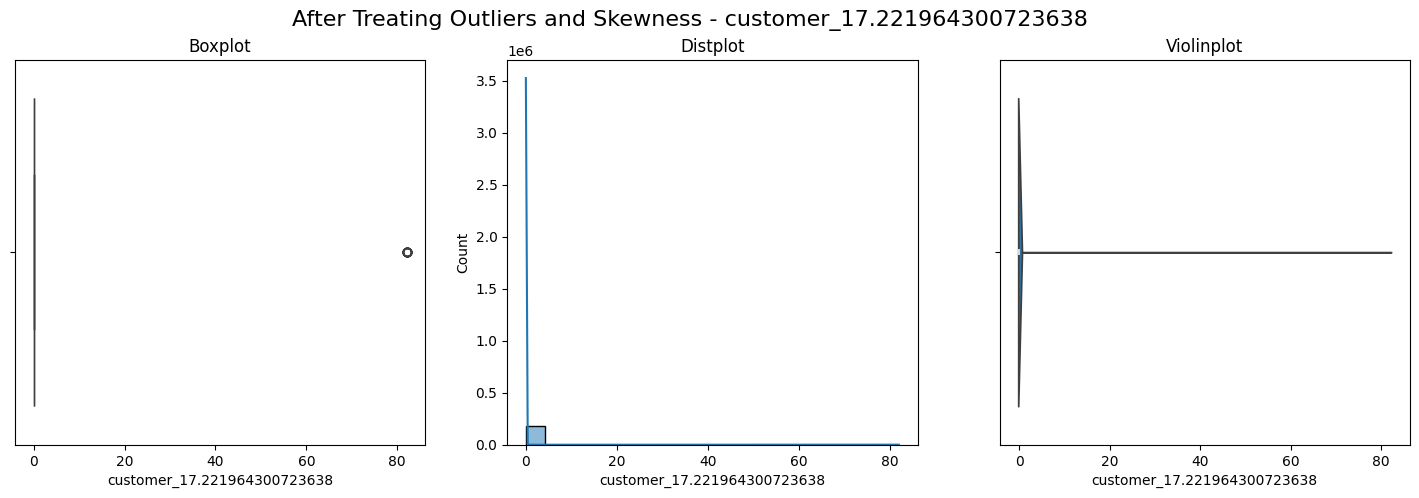

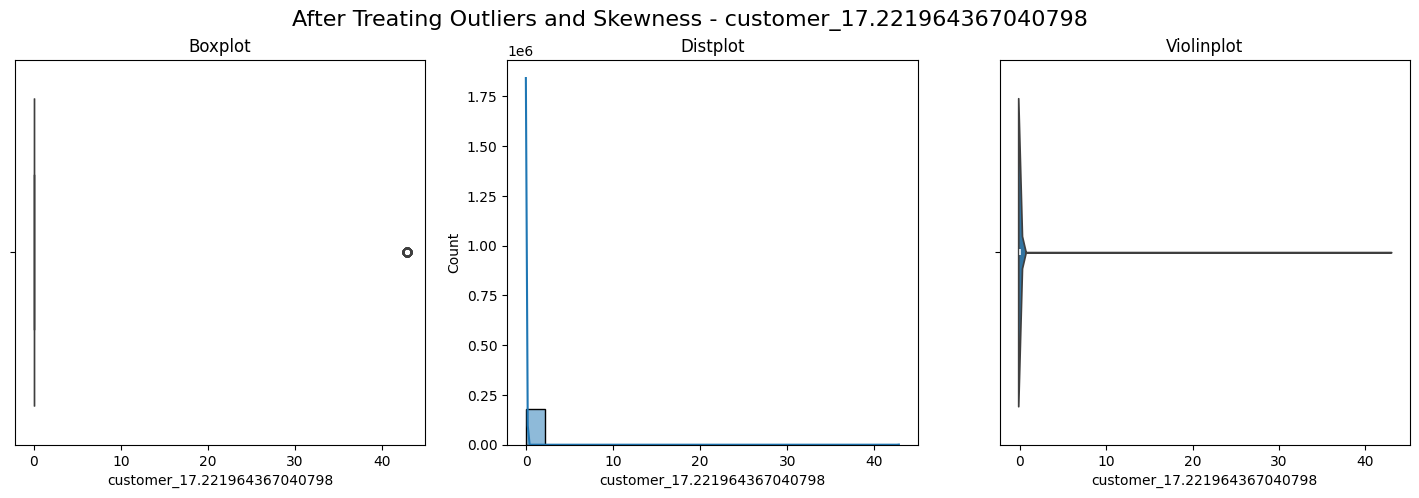

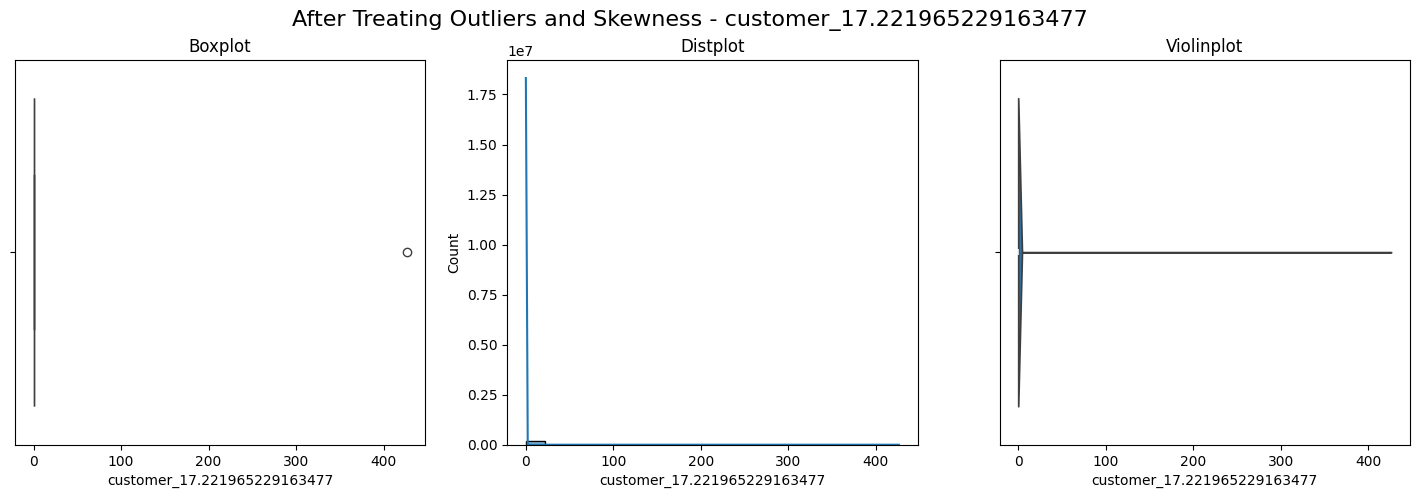

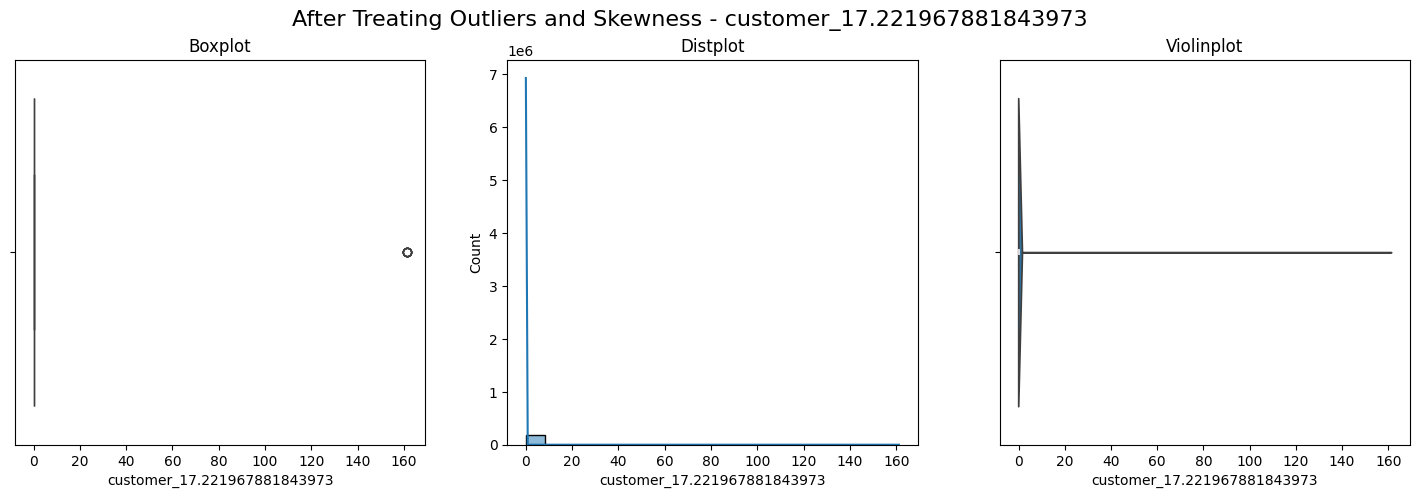

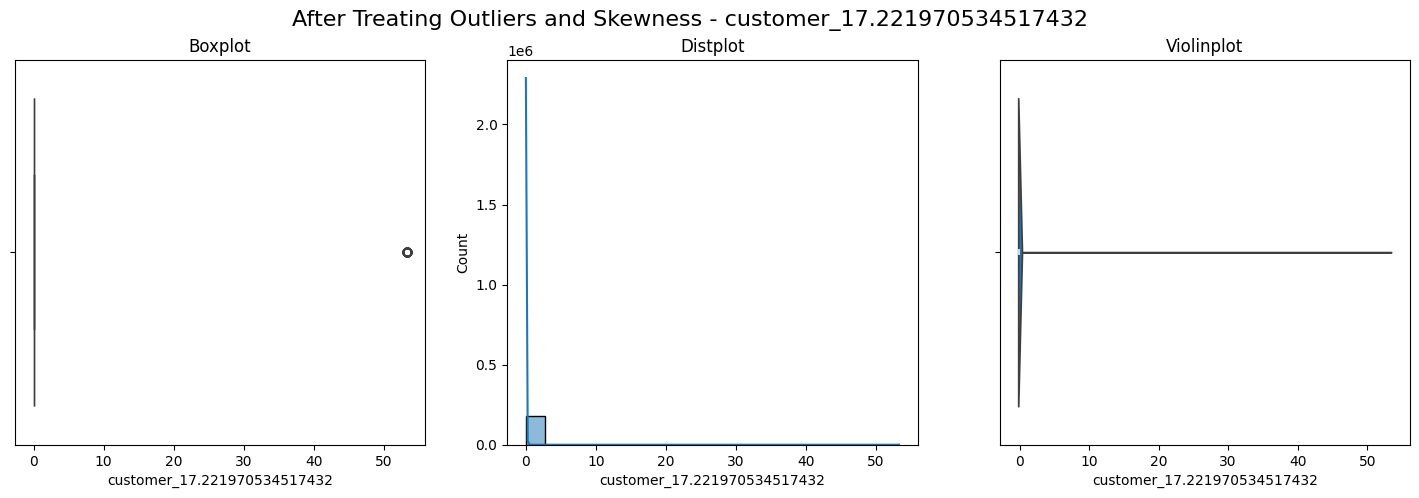

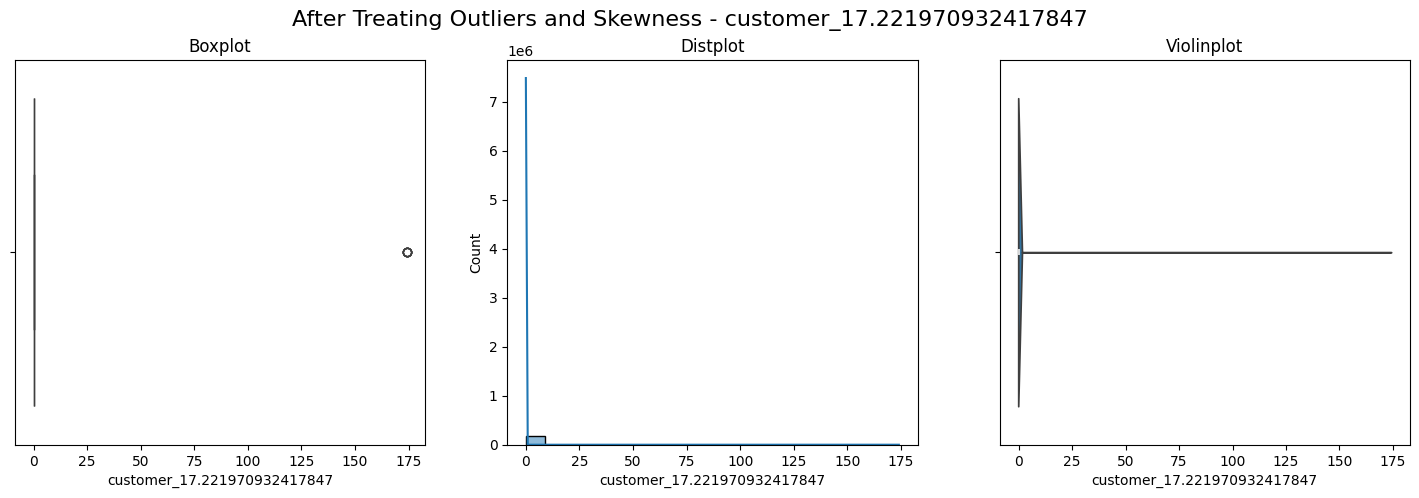

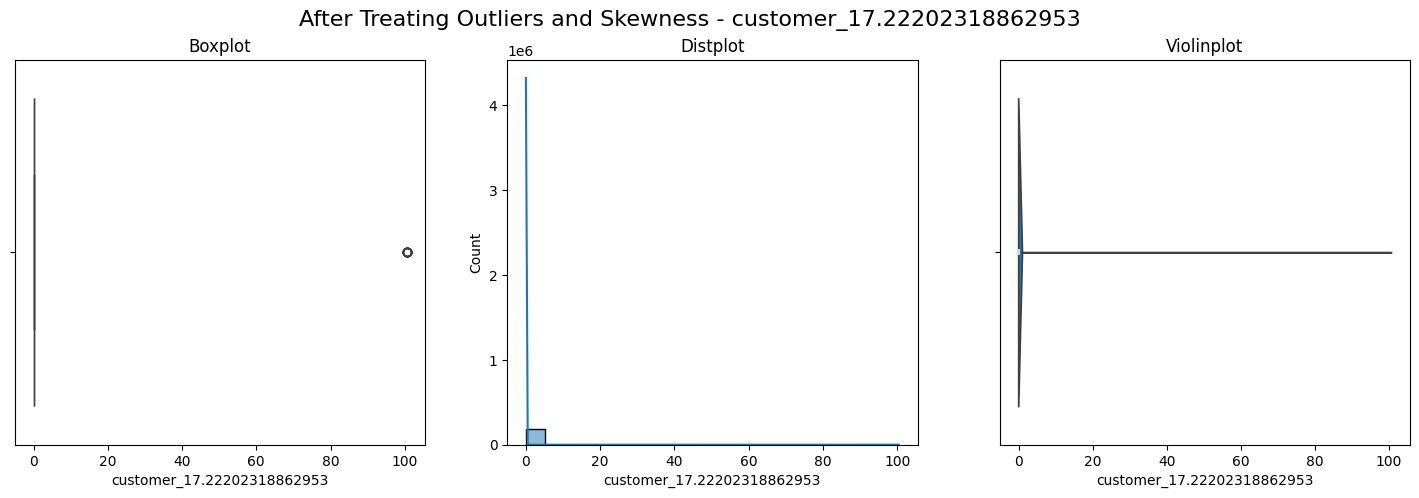

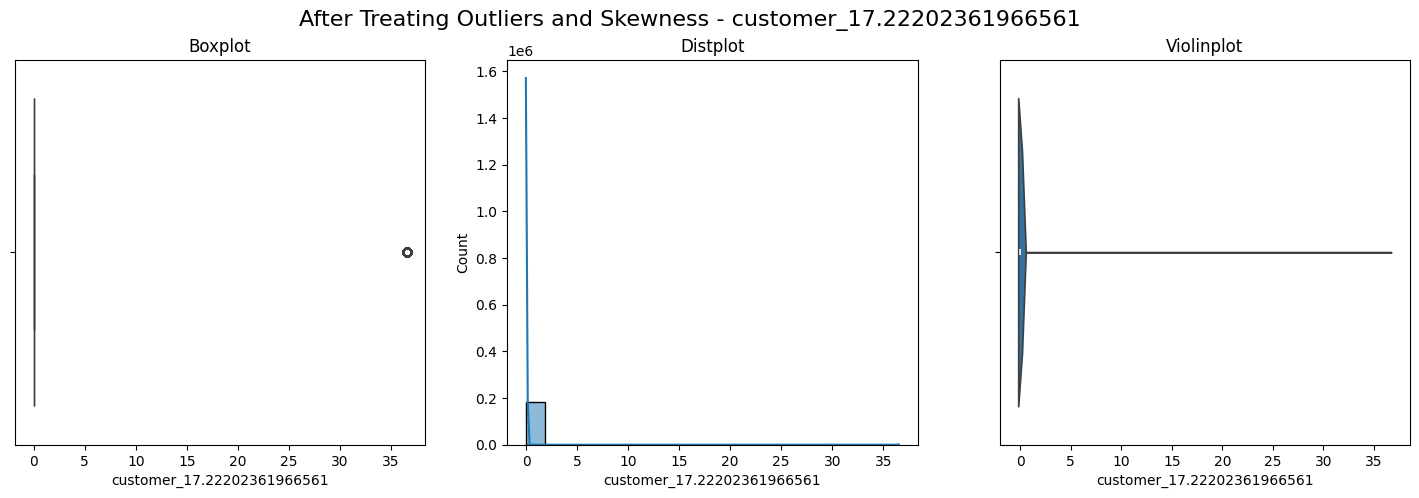

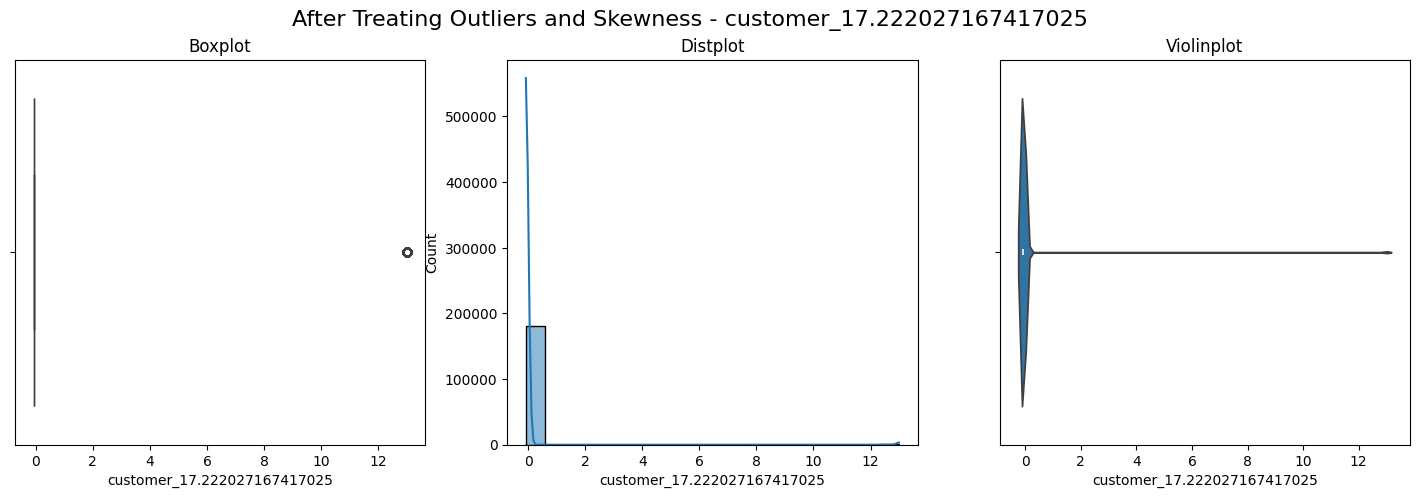

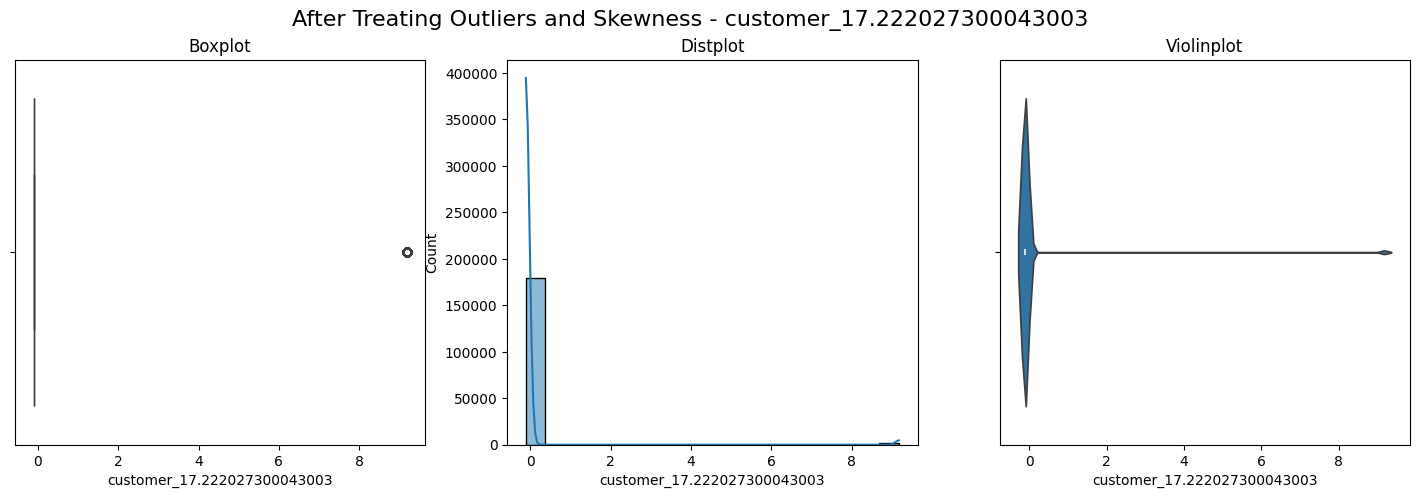

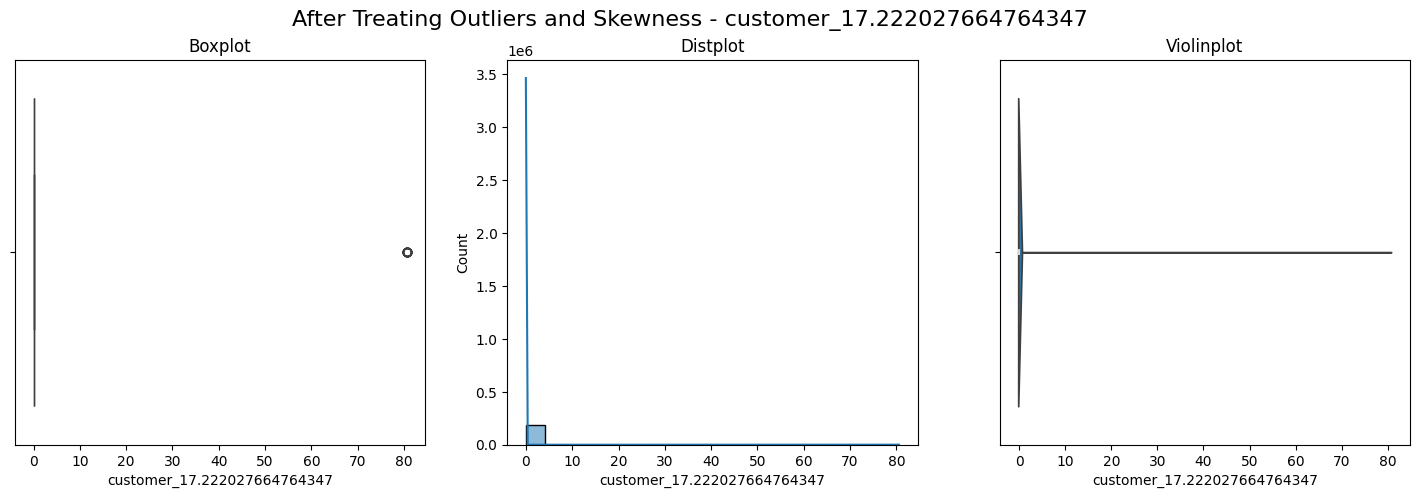

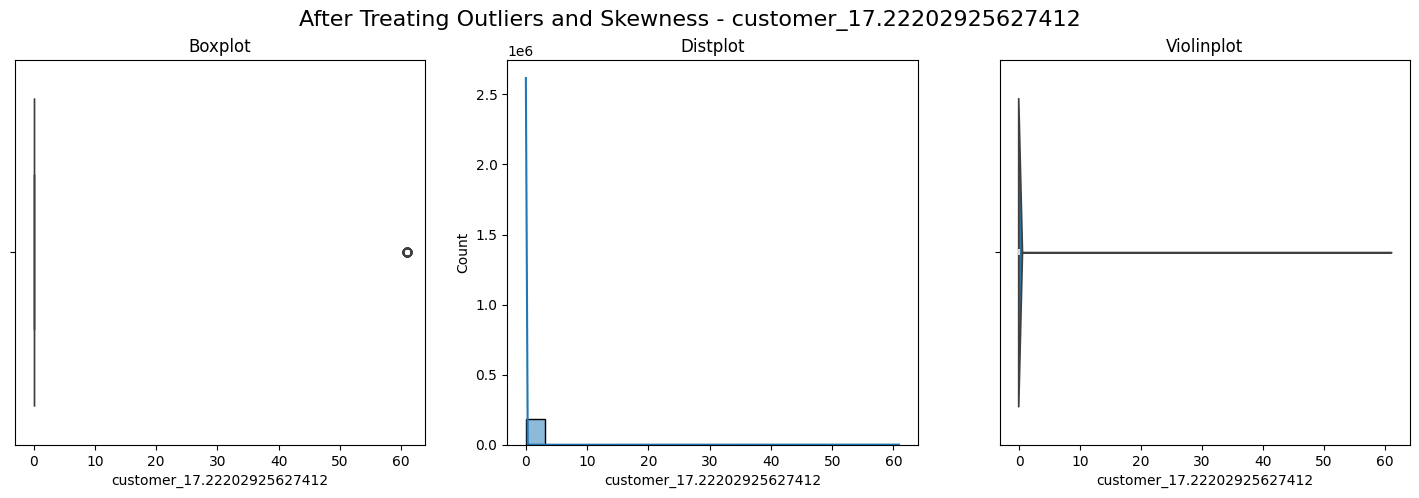

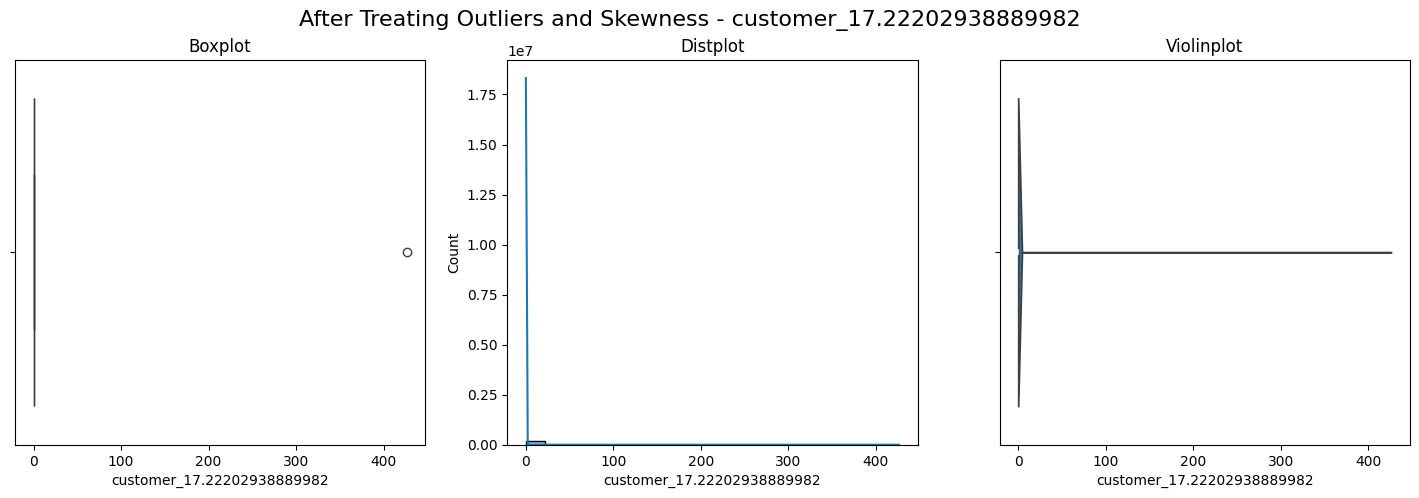

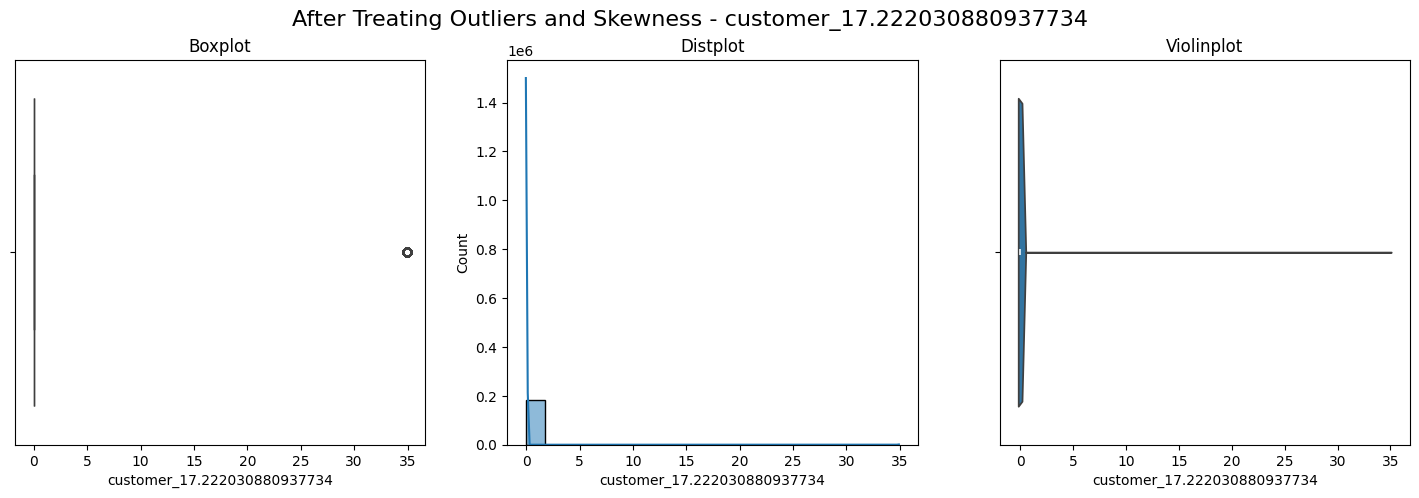

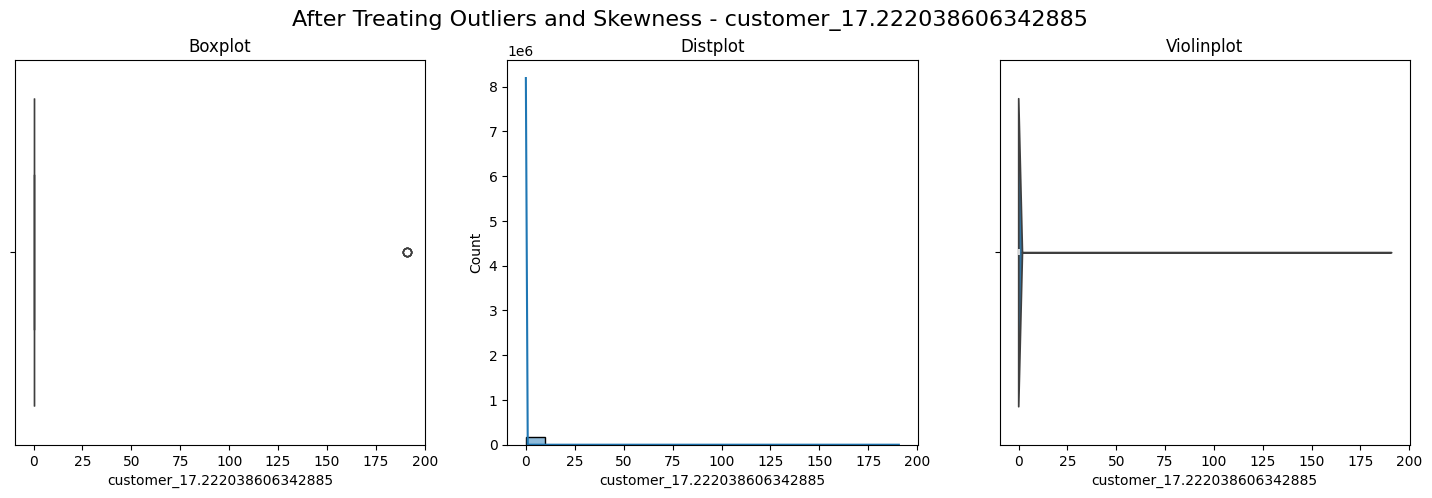

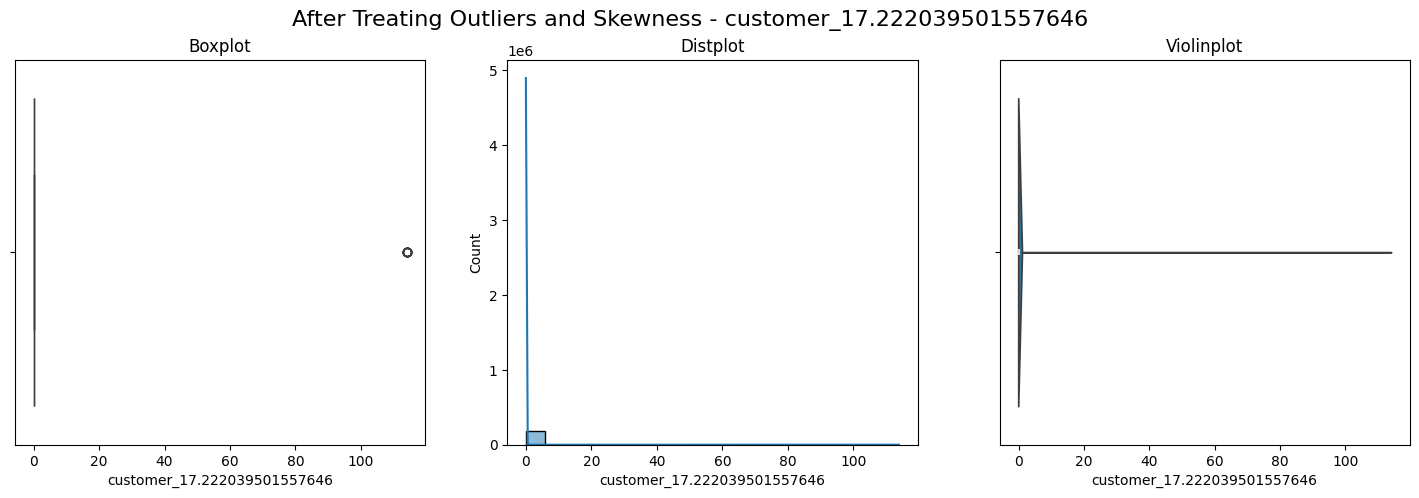

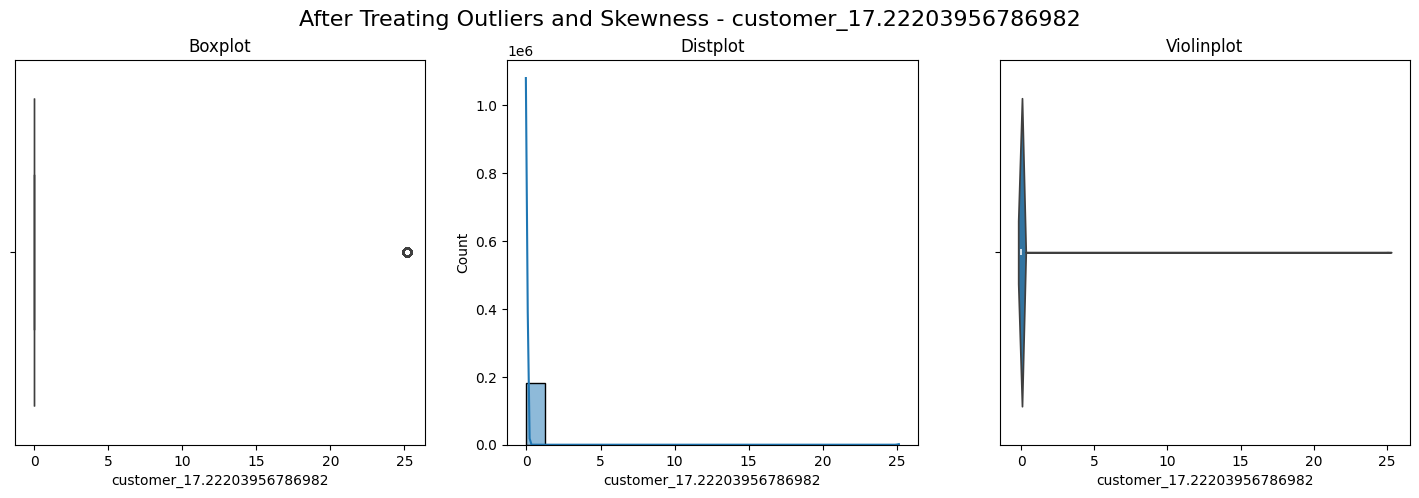

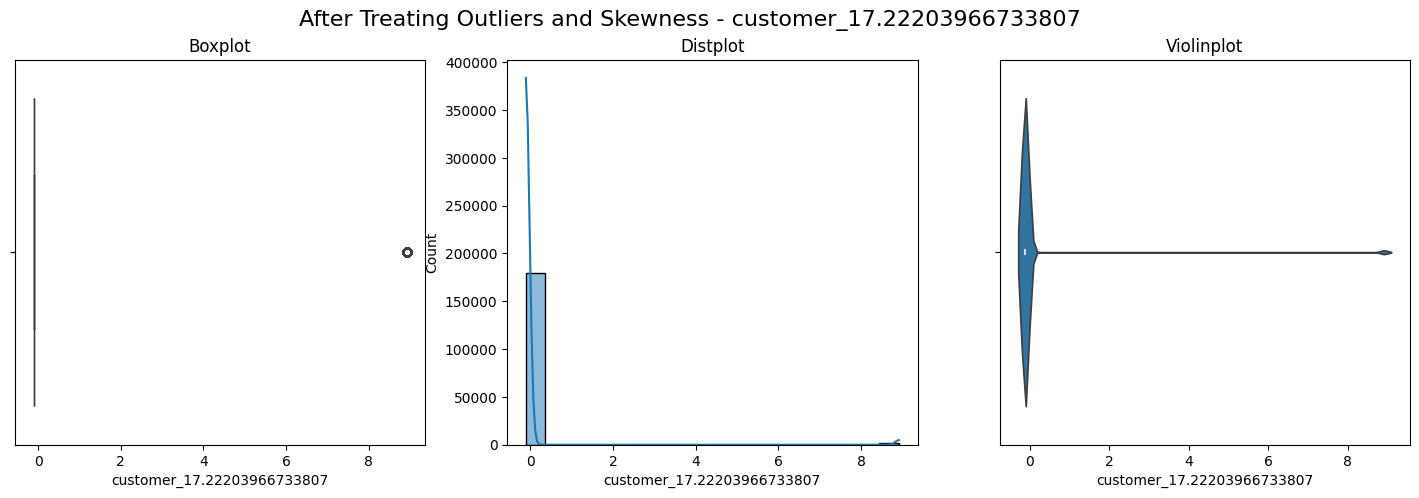

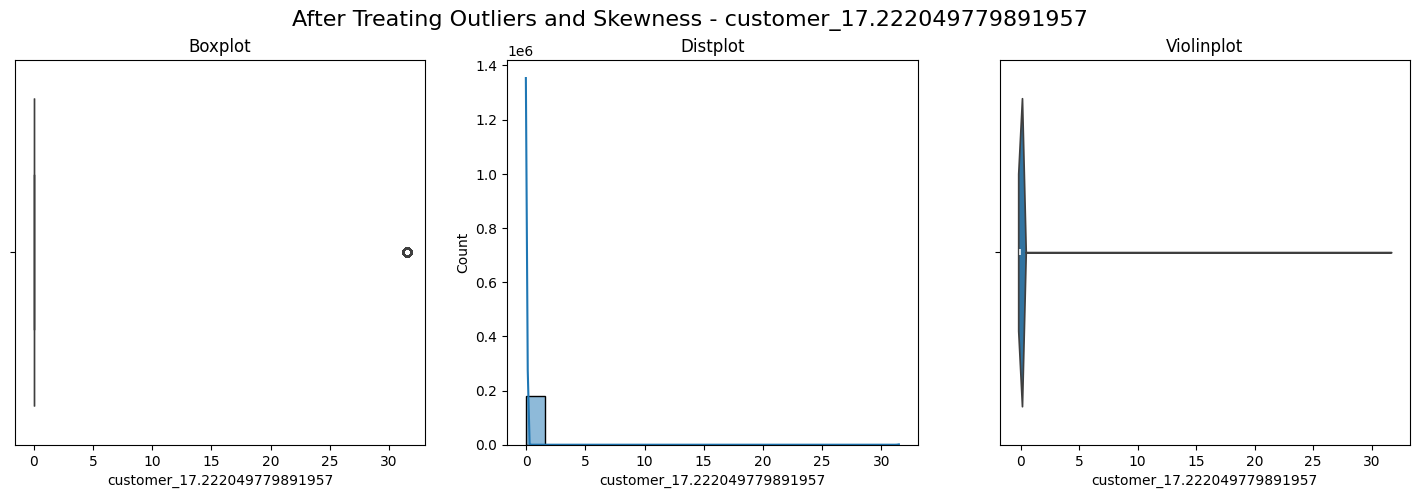

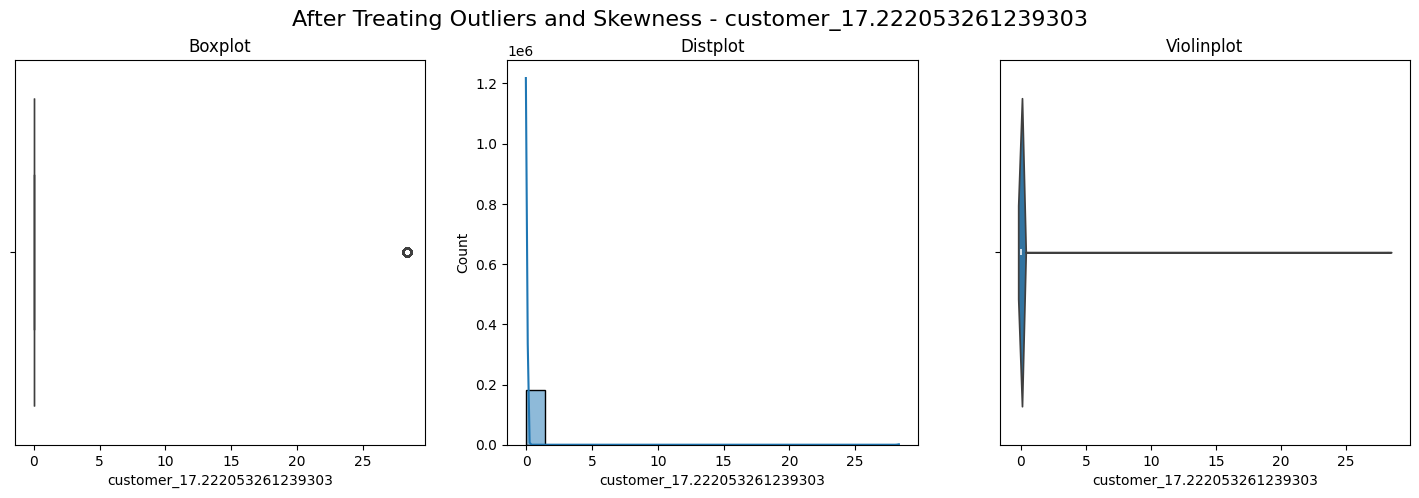

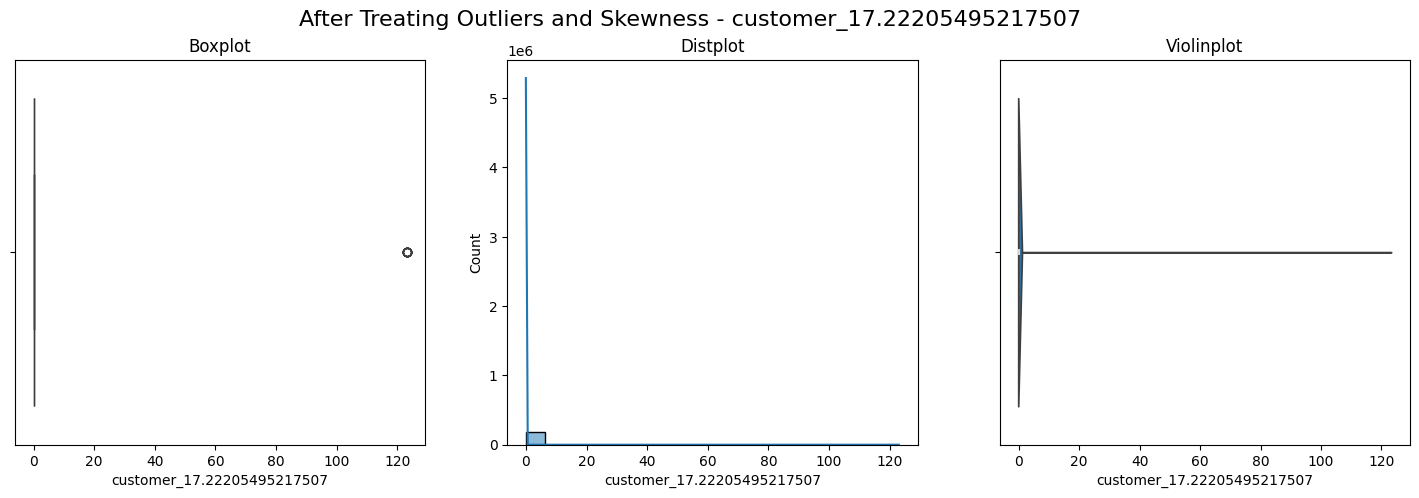

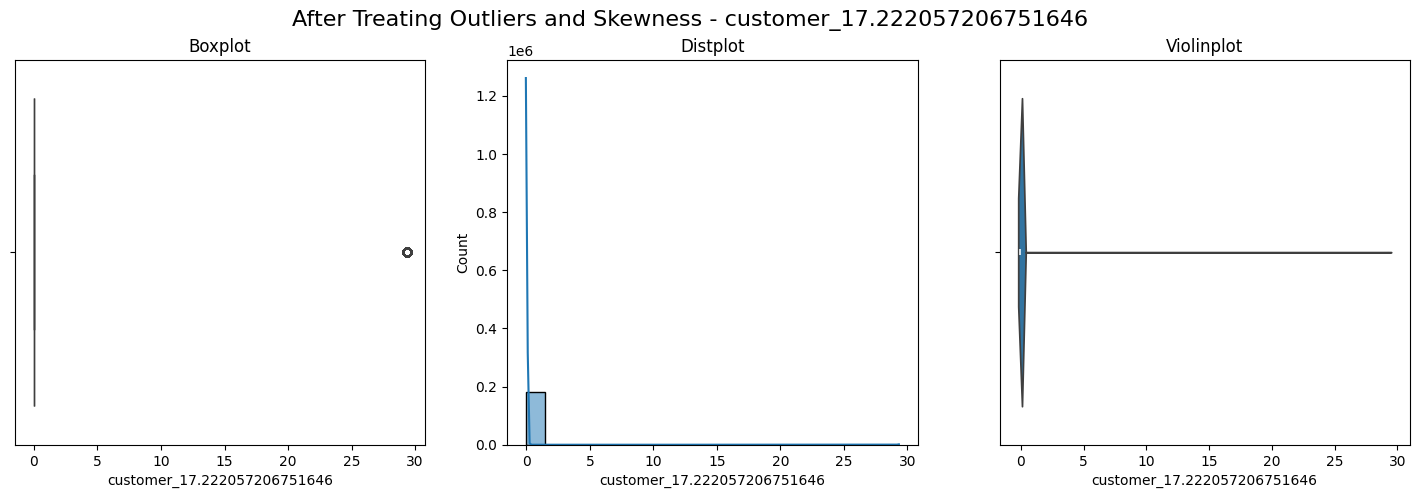

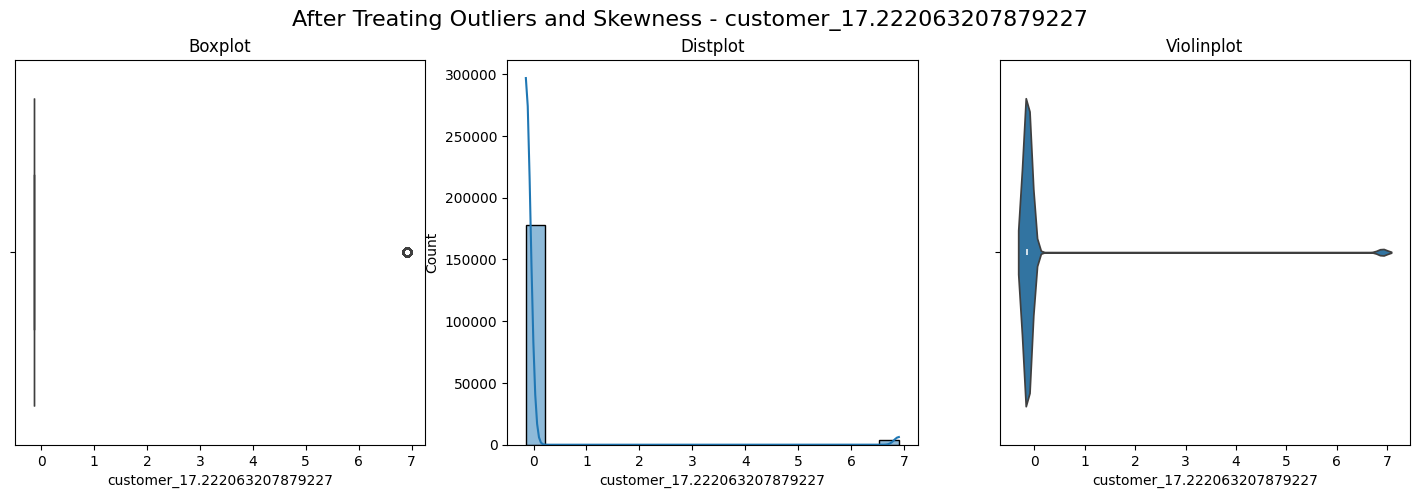

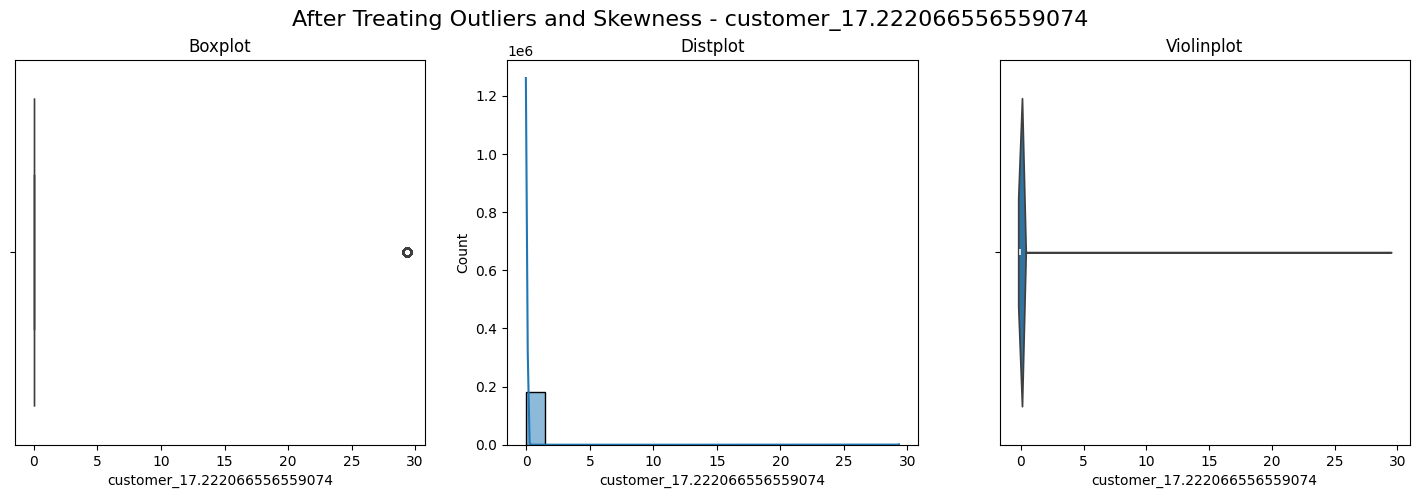

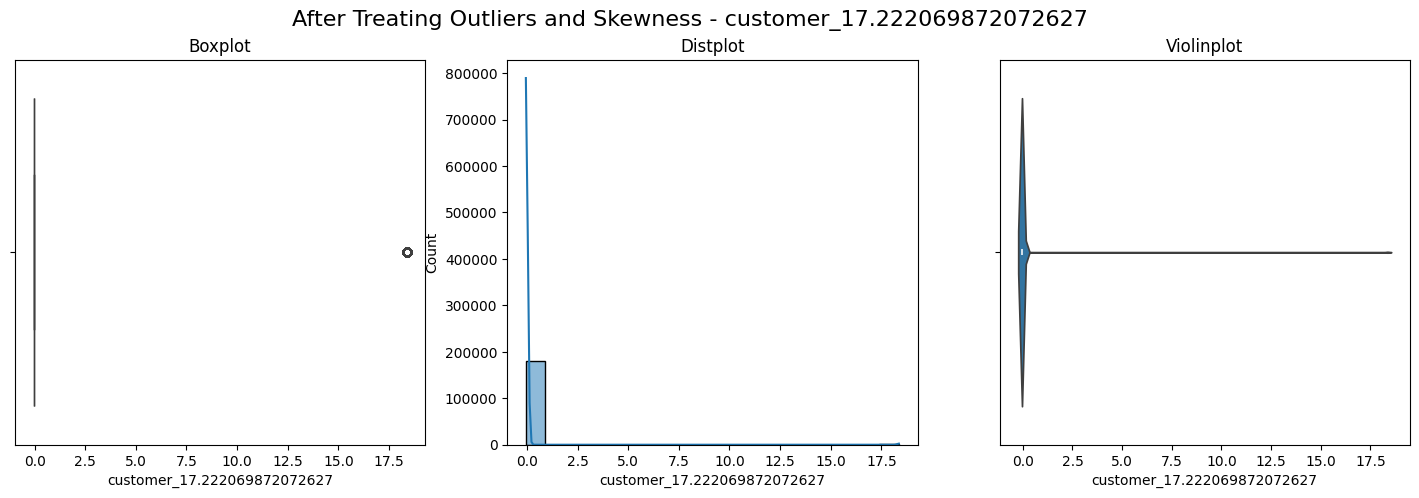

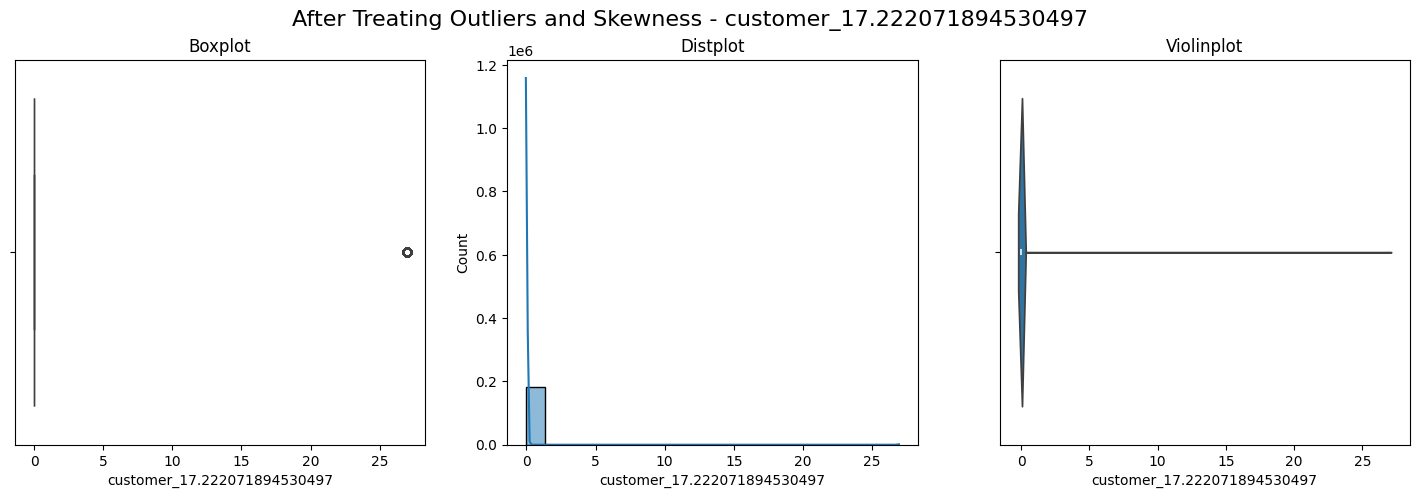

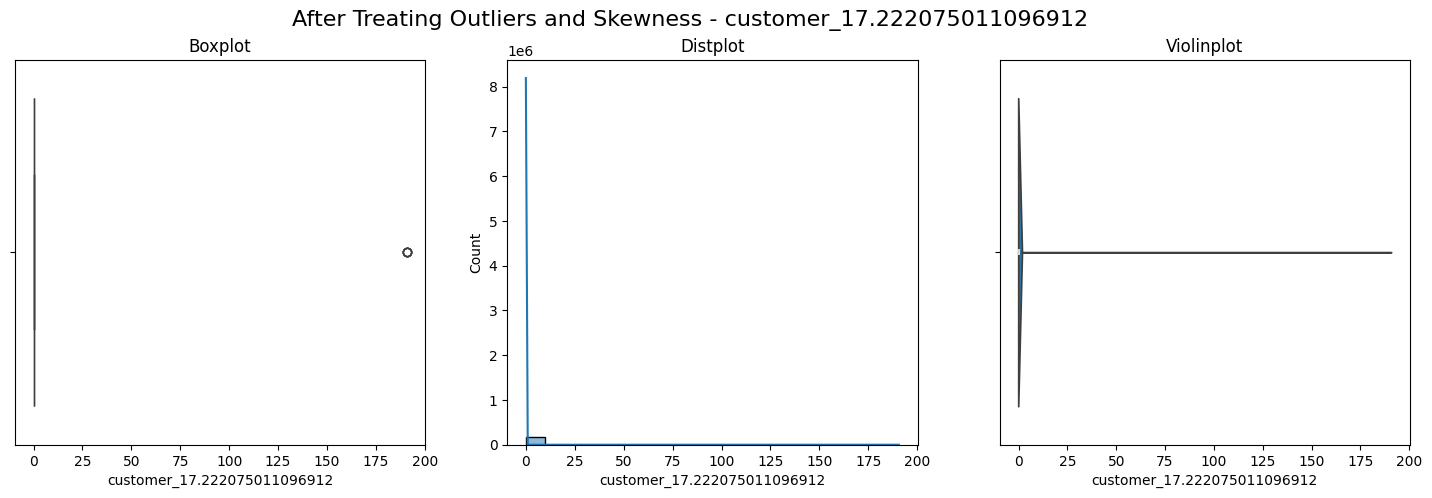

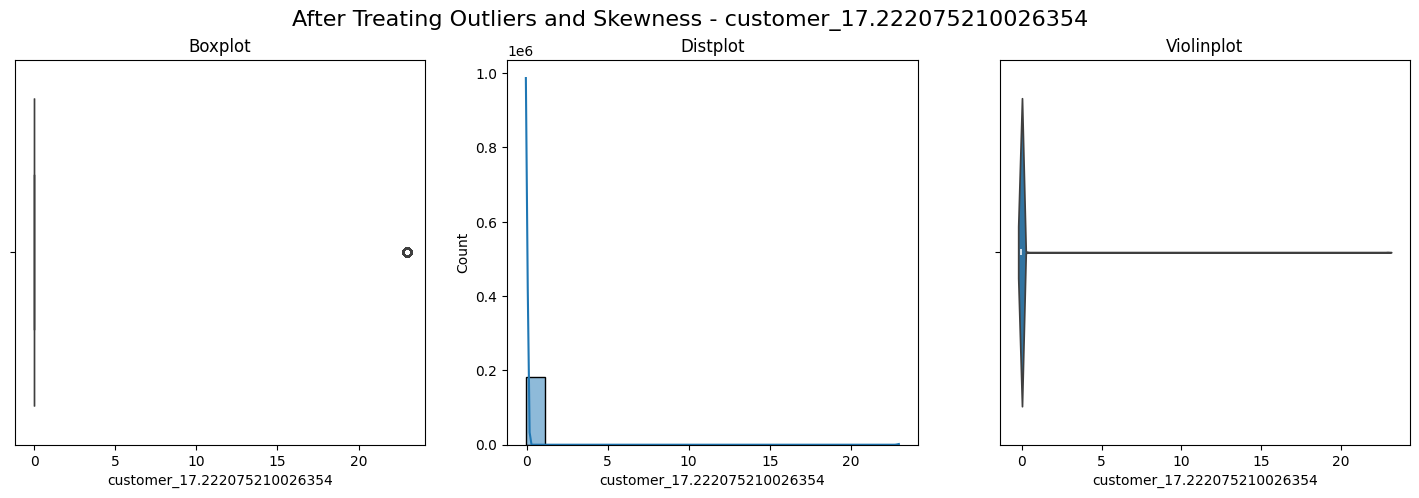

KeyboardInterrupt: 

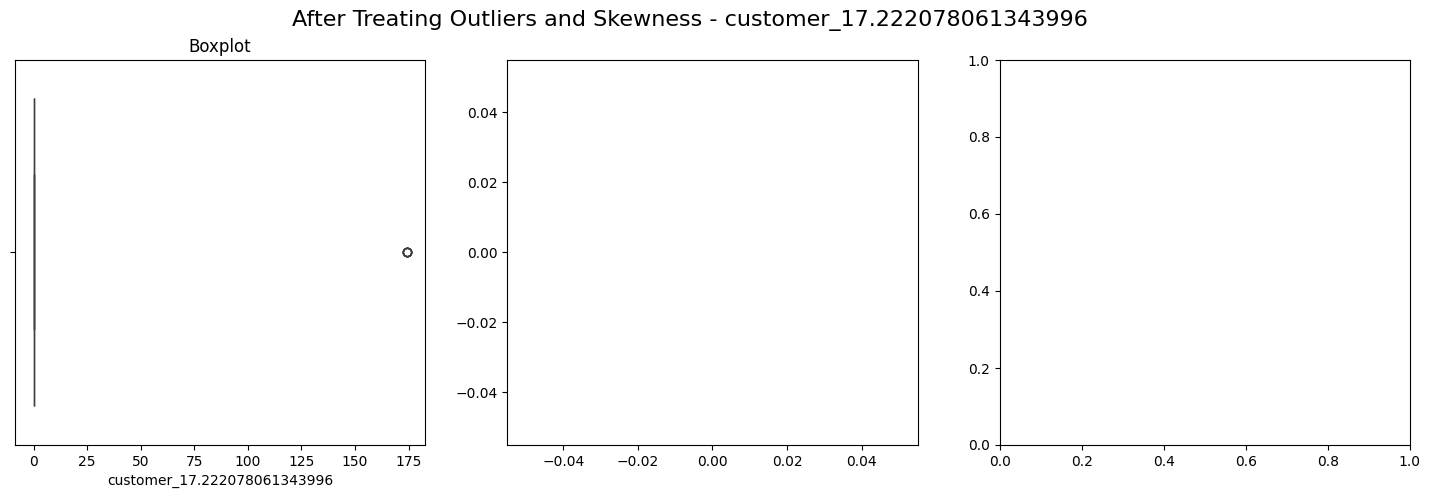

In [ ]:
def plot_visualizations(df, title_prefix=""):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f'{title_prefix} - {col}', fontsize=16)
        
        # Boxplot
        sns.boxplot(x=df[col], ax=axes[0])
        axes[0].set_title('Boxplot')
        
        # Distplot
        sns.histplot(df[col], kde=True, ax=axes[1])
        axes[1].set_title('Distplot')
        
        # Violinplot
        sns.violinplot(x=df[col], ax=axes[2])
        axes[2].set_title('Violinplot')
        
        plt.show()
plot_visualizations(scaled_df, "After Treating Outliers and Skewness")

print("Data Preprocessing and Visualization Completed")

In [ ]:
df.head()


NameError: name 'df' is not defined